In [0]:
!pip install talos

In [0]:
# LSTM for electricity forecasting problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# Helper Function
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# fix random seed for reproducibility
numpy.random.seed(42)

In [0]:
# load the dataset
dataframe = read_csv('/Users/pratik moghe/Documents/final.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# Defining parameters

# Parameters for test runs. 
# p = {
#     'first_neurons': [4],
#     'optimizer': ['adam'], 
#     'epochs': [20],
#     'batch_size': [30, 40]
# }

# Run this for final Round
p = {
    'first_neurons': [2, 4, 8],
    'optimizer': ['adam'], 
    'epochs': [20, 35, 50, 100, 200],
    'batch_size': [1, 2, 4, 6, 8, 10, 20, 40]
}

In [0]:
def lstm_model(trainX, trainY, testX, testY, params):
    # create and fit the LSTM network
    model = Sequential()
    model.add((LSTM(params['first_neurons'], input_shape=(1, look_back), return_sequences=True)))
    model.add(LSTM(params['first_neurons'], input_shape=(1, look_back), return_sequences=True))  
    model.add(LSTM(params['first_neurons']))
    model.add(Dense(1))
    # Compile Model
    model.compile(loss='mean_absolute_percentage_error', optimizer=params['optimizer'])
    # train model
    out = model.fit(trainX, trainY, epochs=params['epochs'], batch_size=params['batch_size'], verbose=2)

    return out, model

In [0]:
import talos

In [0]:
#run the model with talos
scan_object = talos.Scan(x = trainX,
                         y = trainY,
                         model = lstm_model,
                         params = p,
                         experiment_name = 'lstm_multi_hyp_opt')

  0%|                                                                                          | 0/120 [00:00<?, ?it/s]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 36s - loss: 882.0919
Epoch 2/20
 - 35s - loss: 5084.8935
Epoch 3/20
 - 36s - loss: 1770.5160
Epoch 4/20
 - 37s - loss: 2392.1939
Epoch 5/20
 - 39s - loss: 7036.1746
Epoch 6/20
 - 39s - loss: 1827.7191
Epoch 7/20
 - 40s - loss: 5378.3936
Epoch 8/20
 - 39s - loss: 73.7142
Epoch 9/20
 - 40s - loss: 6055.3546
Epoch 10/20
 - 40s - loss: 1106.8149
Epoch 11/20
 - 40s - loss: 5184.7387
Epoch 12/20
 - 40s - loss: 1692.1482
Epoch 13/20
 - 40s - loss: 4777.6880
Epoch 14/20
 - 39s - loss: 1426.5595
Epoch 15/20
 - 40s - loss: 4346.4122
Epoch 16/20
 - 39s - loss: 2006.8129
Epoch 17/20
 - 41s - loss: 4297.4128
Epoch 18/20
 - 40s - loss: 1766.1259
Epoch 19/20
 - 39s - loss: 2981.8660
Epoch 20/20
 - 39s - loss: 2125.2912




  1%|▋                                                                             | 1/120 [13:01<25:49:06, 781.06s/it]

Epoch 1/20
 - 40s - loss: 167.5757
Epoch 2/20
 - 38s - loss: 6092.6376
Epoch 3/20
 - 38s - loss: 4391.0168
Epoch 4/20
 - 39s - loss: 3915.6629
Epoch 5/20
 - 38s - loss: 4594.6965
Epoch 6/20
 - 39s - loss: 3943.1353
Epoch 7/20
 - 38s - loss: 1562.5705
Epoch 8/20
 - 39s - loss: 5972.1807
Epoch 9/20
 - 39s - loss: 1542.8789
Epoch 10/20
 - 40s - loss: 6034.2578
Epoch 11/20
 - 36s - loss: 1414.6472
Epoch 12/20
 - 36s - loss: 6256.2197
Epoch 13/20
 - 36s - loss: 1409.0527
Epoch 14/20
 - 36s - loss: 5937.2114
Epoch 15/20
 - 37s - loss: 1324.5586
Epoch 16/20
 - 36s - loss: 5287.8560
Epoch 17/20
 - 36s - loss: 2054.2109
Epoch 18/20
 - 36s - loss: 4526.5256
Epoch 19/20
 - 36s - loss: 1590.8317
Epoch 20/20
 - 36s - loss: 5220.3030


  2%|█▎                                                                            | 2/120 [25:32<25:18:20, 772.04s/it]

Epoch 1/20
 - 36s - loss: 1063.0945
Epoch 2/20
 - 35s - loss: 1698.1096
Epoch 3/20
 - 36s - loss: 688.7355
Epoch 4/20
 - 36s - loss: 15043.6630
Epoch 5/20
 - 35s - loss: 8776.7835
Epoch 6/20
 - 36s - loss: 6042.2286
Epoch 7/20
 - 36s - loss: 2191.8634
Epoch 8/20
 - 36s - loss: 361.6647
Epoch 9/20
 - 35s - loss: 9421.2447
Epoch 10/20
 - 36s - loss: 95.9413
Epoch 11/20
 - 36s - loss: 15451.6466
Epoch 12/20
 - 35s - loss: 326.3607
Epoch 13/20
 - 36s - loss: 7130.6977
Epoch 14/20
 - 36s - loss: 1825.6138
Epoch 15/20
 - 35s - loss: 4984.7068
Epoch 16/20
 - 36s - loss: 1362.6538
Epoch 17/20
 - 35s - loss: 628.1777
Epoch 18/20
 - 35s - loss: 10077.1663
Epoch 19/20
 - 37s - loss: 774.1290
Epoch 20/20
 - 36s - loss: 10704.7144


  2%|█▉                                                                            | 3/120 [37:27<24:32:29, 755.13s/it]

Epoch 1/35
 - 39s - loss: 388.1669
Epoch 2/35
 - 39s - loss: 10206.4889
Epoch 3/35
 - 38s - loss: 808.8165
Epoch 4/35
 - 38s - loss: 8596.6229
Epoch 5/35
 - 37s - loss: 520.6597
Epoch 6/35
 - 37s - loss: 6033.4068
Epoch 7/35
 - 37s - loss: 1574.3094
Epoch 8/35
 - 38s - loss: 3427.9482
Epoch 9/35
 - 38s - loss: 2747.2788
Epoch 10/35
 - 38s - loss: 3054.2691
Epoch 11/35
 - 37s - loss: 3086.3801
Epoch 12/35
 - 37s - loss: 1835.8272
Epoch 13/35
 - 38s - loss: 4128.8506
Epoch 14/35
 - 38s - loss: 1068.4638
Epoch 15/35
 - 37s - loss: 4915.1514
Epoch 16/35
 - 38s - loss: 1422.0327
Epoch 17/35
 - 37s - loss: 2799.3905
Epoch 18/35
 - 38s - loss: 2447.3437
Epoch 19/35
 - 39s - loss: 2474.2254
Epoch 20/35
 - 37s - loss: 2459.0413
Epoch 21/35
 - 38s - loss: 2715.6845
Epoch 22/35
 - 38s - loss: 1422.1542
Epoch 23/35
 - 38s - loss: 3717.1580
Epoch 24/35
 - 38s - loss: 1558.5334
Epoch 25/35
 - 39s - loss: 2720.0601
Epoch 26/35
 - 37s - loss: 2951.2816
Epoch 27/35
 - 38s - loss: 509.6650
Epoch 28/35
 

  3%|██▌                                                                           | 4/120 [59:28<29:48:10, 924.91s/it]

Epoch 1/35
 - 38s - loss: 616.2474
Epoch 2/35
 - 36s - loss: 11576.5248
Epoch 3/35
 - 36s - loss: 889.6449
Epoch 4/35
 - 37s - loss: 7499.8395
Epoch 5/35
 - 36s - loss: 1535.4035
Epoch 6/35
 - 36s - loss: 5443.1325
Epoch 7/35
 - 36s - loss: 2260.7450
Epoch 8/35
 - 36s - loss: 601.3591
Epoch 9/35
 - 36s - loss: 5638.9099
Epoch 10/35
 - 36s - loss: 952.0584
Epoch 11/35
 - 36s - loss: 4957.6203
Epoch 12/35
 - 37s - loss: 1201.3725
Epoch 13/35
 - 36s - loss: 1146.7144
Epoch 14/35
 - 36s - loss: 6662.7935
Epoch 15/35
 - 36s - loss: 1688.6216
Epoch 16/35
 - 36s - loss: 4978.4144
Epoch 17/35
 - 36s - loss: 500.2864
Epoch 18/35
 - 36s - loss: 5206.7978
Epoch 19/35
 - 37s - loss: 700.4825
Epoch 20/35
 - 37s - loss: 4632.9206
Epoch 21/35
 - 36s - loss: 822.9526
Epoch 22/35
 - 36s - loss: 3923.3282
Epoch 23/35
 - 36s - loss: 1314.0495
Epoch 24/35
 - 36s - loss: 3067.4223
Epoch 25/35
 - 37s - loss: 1538.5067
Epoch 26/35
 - 41s - loss: 2234.6849
Epoch 27/35
 - 39s - loss: 3424.4544
Epoch 28/35
 - 4

  4%|███▏                                                                       | 5/120 [1:21:06<33:07:01, 1036.71s/it]

Epoch 1/35
 - 38s - loss: 1873.4206
Epoch 2/35
 - 37s - loss: 6951.5159
Epoch 3/35
 - 39s - loss: 1875.3382
Epoch 4/35
 - 38s - loss: 5374.7638
Epoch 5/35
 - 38s - loss: 1943.8455
Epoch 6/35
 - 38s - loss: 4185.4023
Epoch 7/35
 - 37s - loss: 2135.1339
Epoch 8/35
 - 37s - loss: 2853.7408
Epoch 9/35
 - 38s - loss: 2740.3924
Epoch 10/35
 - 37s - loss: 1224.3434
Epoch 11/35
 - 38s - loss: 1651.2935
Epoch 12/35
 - 38s - loss: 785.9443
Epoch 13/35
 - 37s - loss: 169.2941
Epoch 14/35
 - 37s - loss: 112.0340
Epoch 15/35
 - 38s - loss: 5723.1425
Epoch 16/35
 - 37s - loss: 1088.7287
Epoch 17/35
 - 38s - loss: 5288.5418
Epoch 18/35
 - 38s - loss: 1878.3033
Epoch 19/35
 - 38s - loss: 1027.7403
Epoch 20/35
 - 38s - loss: 4157.6412
Epoch 21/35
 - 37s - loss: 883.9427
Epoch 22/35
 - 38s - loss: 63585.6962
Epoch 23/35
 - 37s - loss: 1383.1269
Epoch 24/35
 - 37s - loss: 59244.3084
Epoch 25/35
 - 38s - loss: 862.7195
Epoch 26/35
 - 39s - loss: 1576.0696
Epoch 27/35
 - 38s - loss: 2653.9923
Epoch 28/35
 

  5%|███▊                                                                       | 6/120 [1:43:12<35:34:37, 1123.49s/it]

Epoch 1/50
 - 41s - loss: 1268.1937
Epoch 2/50
 - 40s - loss: 7947.8622
Epoch 3/50
 - 40s - loss: 218.7677
Epoch 4/50
 - 39s - loss: 4944.6672
Epoch 5/50
 - 40s - loss: 2380.6955
Epoch 6/50
 - 39s - loss: 3107.4723
Epoch 7/50
 - 40s - loss: 3829.3276
Epoch 8/50
 - 40s - loss: 2667.9256
Epoch 9/50
 - 41s - loss: 622.9814
Epoch 10/50
 - 40s - loss: 9642.4801
Epoch 11/50
 - 39s - loss: 434.1410
Epoch 12/50
 - 40s - loss: 7239.0029
Epoch 13/50
 - 40s - loss: 1314.9716
Epoch 14/50
 - 40s - loss: 6155.1795
Epoch 15/50
 - 41s - loss: 2165.1725
Epoch 16/50
 - 41s - loss: 4555.9189
Epoch 17/50
 - 42s - loss: 2689.1880
Epoch 18/50
 - 37s - loss: 3198.0581
Epoch 19/50
 - 38s - loss: 7331.3982
Epoch 20/50
 - 37s - loss: 2903.1282
Epoch 21/50
 - 37s - loss: 5185.3314
Epoch 22/50
 - 37s - loss: 674.0975
Epoch 23/50
 - 38s - loss: 5536.4307
Epoch 24/50
 - 37s - loss: 1753.9421
Epoch 25/50
 - 37s - loss: 1429.6270
Epoch 26/50
 - 37s - loss: 13635.5457
Epoch 27/50
 - 37s - loss: 798.6665
Epoch 28/50
 -

  6%|████▍                                                                      | 7/120 [2:15:00<42:39:31, 1359.04s/it]

Epoch 1/50
 - 39s - loss: 226.2153
Epoch 2/50
 - 38s - loss: 7766.3798
Epoch 3/50
 - 38s - loss: 1638.4429
Epoch 4/50
 - 38s - loss: 6535.2709
Epoch 5/50
 - 38s - loss: 1658.0768
Epoch 6/50
 - 37s - loss: 4990.1413
Epoch 7/50
 - 37s - loss: 1782.6931
Epoch 8/50
 - 38s - loss: 2117.5219
Epoch 9/50
 - 37s - loss: 3501.9731
Epoch 10/50
 - 37s - loss: 5246.0038
Epoch 11/50
 - 38s - loss: 1106.9412
Epoch 12/50
 - 38s - loss: 5248.6606
Epoch 13/50
 - 38s - loss: 1386.1369
Epoch 14/50
 - 38s - loss: 4509.6748
Epoch 15/50
 - 37s - loss: 1602.4983
Epoch 16/50
 - 37s - loss: 172.8670
Epoch 17/50
 - 38s - loss: 12632.0644
Epoch 18/50
 - 37s - loss: 536.5754
Epoch 19/50
 - 37s - loss: 7375.3137
Epoch 20/50
 - 38s - loss: 2060.8317
Epoch 21/50
 - 37s - loss: 5626.3098
Epoch 22/50
 - 38s - loss: 4070.7640
Epoch 23/50
 - 38s - loss: 992.0893
Epoch 24/50
 - 37s - loss: 6116.0263
Epoch 25/50
 - 38s - loss: 216.7887
Epoch 26/50
 - 37s - loss: 1728.2693
Epoch 27/50
 - 37s - loss: 168.6860
Epoch 28/50
 - 

  7%|█████                                                                      | 8/120 [2:46:18<47:07:12, 1514.57s/it]

Epoch 1/50
 - 39s - loss: 376.1314
Epoch 2/50
 - 37s - loss: 808.8826
Epoch 3/50
 - 38s - loss: 20526.5292
Epoch 4/50
 - 37s - loss: 352.7272
Epoch 5/50
 - 38s - loss: 15313.5961
Epoch 6/50
 - 37s - loss: 1520.4688
Epoch 7/50
 - 37s - loss: 744.4630
Epoch 8/50
 - 37s - loss: 10536.9477
Epoch 9/50
 - 37s - loss: 6994.0153
Epoch 10/50
 - 37s - loss: 5796.1477
Epoch 11/50
 - 38s - loss: 1218.3397
Epoch 12/50
 - 38s - loss: 10537.5618
Epoch 13/50
 - 38s - loss: 232.3227
Epoch 14/50
 - 37s - loss: 4332.2446
Epoch 15/50
 - 38s - loss: 192.3238
Epoch 16/50
 - 38s - loss: 13764.4614
Epoch 17/50
 - 37s - loss: 794.1604
Epoch 18/50
 - 38s - loss: 11790.3224
Epoch 19/50
 - 38s - loss: 981.8241
Epoch 20/50
 - 38s - loss: 1593.2645
Epoch 21/50
 - 38s - loss: 22163.6825
Epoch 22/50
 - 38s - loss: 855.7052
Epoch 23/50
 - 37s - loss: 2061.7764
Epoch 24/50
 - 38s - loss: 10930.5997
Epoch 25/50
 - 38s - loss: 1603.8829
Epoch 26/50
 - 37s - loss: 5231.8162
Epoch 27/50
 - 38s - loss: 17192.4548
Epoch 28/5

  8%|█████▋                                                                     | 9/120 [3:17:41<50:06:10, 1624.96s/it]

Epoch 1/100
 - 38s - loss: 286.7033
Epoch 2/100
 - 37s - loss: 11206.3241
Epoch 3/100
 - 38s - loss: 1073.4459
Epoch 4/100
 - 37s - loss: 10224.8939
Epoch 5/100
 - 38s - loss: 918.2195
Epoch 6/100
 - 37s - loss: 8636.7161
Epoch 7/100
 - 37s - loss: 1322.7420
Epoch 8/100
 - 37s - loss: 5137.9706
Epoch 9/100
 - 38s - loss: 3922.3091
Epoch 10/100
 - 37s - loss: 3177.9826
Epoch 11/100
 - 37s - loss: 4369.2271
Epoch 12/100
 - 37s - loss: 1640.6405
Epoch 13/100
 - 37s - loss: 4941.1408
Epoch 14/100
 - 37s - loss: 964.3290
Epoch 15/100
 - 38s - loss: 4841.9530
Epoch 16/100
 - 37s - loss: 1625.5304
Epoch 17/100
 - 37s - loss: 4303.6191
Epoch 18/100
 - 38s - loss: 1499.7172
Epoch 19/100
 - 38s - loss: 3583.3750
Epoch 20/100
 - 39s - loss: 1887.5274
Epoch 21/100
 - 37s - loss: 248.6905
Epoch 22/100
 - 37s - loss: 5436.0137
Epoch 23/100
 - 37s - loss: 94.0012
Epoch 24/100
 - 37s - loss: 3974.0824
Epoch 25/100
 - 37s - loss: 1020.7637
Epoch 26/100
 - 37s - loss: 4266.6692
Epoch 27/100
 - 38s - los

  8%|██████▏                                                                   | 10/120 [4:19:59<69:01:40, 2259.10s/it]

Epoch 1/100
 - 39s - loss: 1293.8637
Epoch 2/100
 - 37s - loss: 900.8781
Epoch 3/100
 - 38s - loss: 2928.1425
Epoch 4/100
 - 37s - loss: 4196.2981
Epoch 5/100
 - 38s - loss: 2508.2918
Epoch 6/100
 - 38s - loss: 4817.3520
Epoch 7/100
 - 38s - loss: 1296.9683
Epoch 8/100
 - 38s - loss: 4156.3364
Epoch 9/100
 - 38s - loss: 2255.5791
Epoch 10/100
 - 37s - loss: 102.8921
Epoch 11/100
 - 38s - loss: 6356.0733
Epoch 12/100
 - 38s - loss: 252.7039
Epoch 13/100
 - 37s - loss: 5502.6262
Epoch 14/100
 - 38s - loss: 1123.3796
Epoch 15/100
 - 39s - loss: 4930.4681
Epoch 16/100
 - 38s - loss: 1352.4687
Epoch 17/100
 - 38s - loss: 4486.3790
Epoch 18/100
 - 38s - loss: 1354.3357
Epoch 19/100
 - 39s - loss: 2897.4931
Epoch 20/100
 - 38s - loss: 1830.2801
Epoch 21/100
 - 38s - loss: 1507.6032
Epoch 22/100
 - 38s - loss: 17598.7886
Epoch 23/100
 - 39s - loss: 931.6378
Epoch 24/100
 - 39s - loss: 10754.8253
Epoch 25/100
 - 38s - loss: 301.3012
Epoch 26/100
 - 38s - loss: 8970.0440
Epoch 27/100
 - 38s - lo

  9%|██████▊                                                                   | 11/120 [5:23:53<82:41:57, 2731.36s/it]

Epoch 1/100
 - 37s - loss: 1792.6268
Epoch 2/100
 - 36s - loss: 2573.2708
Epoch 3/100
 - 37s - loss: 15481.0198
Epoch 4/100
 - 36s - loss: 467.9027
Epoch 5/100
 - 36s - loss: 5622.6989
Epoch 6/100
 - 36s - loss: 2428.4426
Epoch 7/100
 - 36s - loss: 593.0801
Epoch 8/100
 - 36s - loss: 5556.6323
Epoch 9/100
 - 36s - loss: 1517.2655
Epoch 10/100
 - 37s - loss: 8136.7799
Epoch 11/100
 - 36s - loss: 1204.7147
Epoch 12/100
 - 36s - loss: 7001.0709
Epoch 13/100
 - 36s - loss: 423.5238
Epoch 14/100
 - 36s - loss: 1200.0512
Epoch 15/100
 - 36s - loss: 199.3835
Epoch 16/100
 - 36s - loss: 13231.7071
Epoch 17/100
 - 36s - loss: 243.6308
Epoch 18/100
 - 36s - loss: 2338.4056
Epoch 19/100
 - 36s - loss: 13285.2614
Epoch 20/100
 - 36s - loss: 2770.7270
Epoch 21/100
 - 36s - loss: 10172.2570
Epoch 22/100
 - 36s - loss: 2984.7358
Epoch 23/100
 - 36s - loss: 9518.6174
Epoch 24/100
 - 36s - loss: 751.5023
Epoch 25/100
 - 36s - loss: 15565.5105
Epoch 26/100
 - 36s - loss: 562.5666
Epoch 27/100
 - 36s - l

 10%|███████▍                                                                  | 12/120 [6:25:13<90:29:05, 3016.16s/it]

Epoch 1/200
 - 38s - loss: 594.8853
Epoch 2/200
 - 37s - loss: 7480.9051
Epoch 3/200
 - 37s - loss: 1563.5017
Epoch 4/200
 - 37s - loss: 8548.6227
Epoch 5/200
 - 37s - loss: 1801.7216
Epoch 6/200
 - 37s - loss: 7283.2396
Epoch 7/200
 - 37s - loss: 2102.1216
Epoch 8/200
 - 37s - loss: 333.6767
Epoch 9/200
 - 37s - loss: 8238.4184
Epoch 10/200
 - 37s - loss: 702.6294
Epoch 11/200
 - 37s - loss: 7170.1167
Epoch 12/200
 - 37s - loss: 1427.0488
Epoch 13/200
 - 37s - loss: 6005.8253
Epoch 14/200
 - 37s - loss: 1452.8333
Epoch 15/200
 - 37s - loss: 3496.4459
Epoch 16/200
 - 36s - loss: 4596.3879
Epoch 17/200
 - 37s - loss: 1993.2230
Epoch 18/200
 - 37s - loss: 1662.9115
Epoch 19/200
 - 37s - loss: 3628.7620
Epoch 20/200
 - 36s - loss: 2631.0546
Epoch 21/200
 - 37s - loss: 2536.0354
Epoch 22/200
 - 37s - loss: 3106.5555
Epoch 23/200
 - 36s - loss: 2680.1299
Epoch 24/200
 - 37s - loss: 1239.9333
Epoch 25/200
 - 37s - loss: 4404.9462
Epoch 26/200
 - 37s - loss: 1241.1044
Epoch 27/200
 - 36s - lo

 11%|███████▉                                                                 | 13/120 [8:28:10<128:31:33, 4324.24s/it]

Epoch 1/200
 - 37s - loss: 661.6880
Epoch 2/200
 - 35s - loss: 5595.7162
Epoch 3/200
 - 36s - loss: 2636.5227
Epoch 4/200
 - 36s - loss: 1513.7659
Epoch 5/200
 - 35s - loss: 12312.6655
Epoch 6/200
 - 35s - loss: 1151.9595
Epoch 7/200
 - 36s - loss: 9297.2689
Epoch 8/200
 - 36s - loss: 936.5250
Epoch 9/200
 - 35s - loss: 7982.7408
Epoch 10/200
 - 36s - loss: 1185.1117
Epoch 11/200
 - 36s - loss: 6750.8510
Epoch 12/200
 - 36s - loss: 1371.2984
Epoch 13/200
 - 36s - loss: 5909.5361
Epoch 14/200
 - 35s - loss: 1112.3544
Epoch 15/200
 - 35s - loss: 548.4497
Epoch 16/200
 - 36s - loss: 9297.1887
Epoch 17/200
 - 36s - loss: 1104.5922
Epoch 18/200
 - 36s - loss: 8810.8379
Epoch 19/200
 - 36s - loss: 938.9194
Epoch 20/200
 - 36s - loss: 7712.5968
Epoch 21/200
 - 35s - loss: 971.6092
Epoch 22/200
 - 35s - loss: 6682.4257
Epoch 23/200
 - 35s - loss: 1394.5626
Epoch 24/200
 - 35s - loss: 5921.0502
Epoch 25/200
 - 36s - loss: 1609.6538
Epoch 26/200
 - 35s - loss: 5536.3153
Epoch 27/200
 - 36s - los

 12%|████████▍                                                               | 14/120 [10:29:37<153:29:47, 5213.09s/it]

Epoch 1/200
 - 35s - loss: 2149.7918
Epoch 2/200
 - 34s - loss: 773.9457
Epoch 3/200
 - 34s - loss: 8620.7575
Epoch 4/200
 - 34s - loss: 698.9684
Epoch 5/200
 - 34s - loss: 1340.2238
Epoch 6/200
 - 34s - loss: 6353.4336
Epoch 7/200
 - 34s - loss: 1221.4350
Epoch 8/200
 - 34s - loss: 946.5388
Epoch 9/200
 - 34s - loss: 2136.9441
Epoch 10/200
 - 34s - loss: 9038.5798
Epoch 11/200
 - 34s - loss: 162.0699
Epoch 12/200
 - 34s - loss: 16684.7980
Epoch 13/200
 - 34s - loss: 1687.5987
Epoch 14/200
 - 34s - loss: 4495.3185
Epoch 15/200
 - 34s - loss: 2238.5186
Epoch 16/200
 - 35s - loss: 423.4996
Epoch 17/200
 - 35s - loss: 8223.5477
Epoch 18/200
 - 35s - loss: 765.8626
Epoch 19/200
 - 34s - loss: 1787.7717
Epoch 20/200
 - 34s - loss: 8300.8014
Epoch 21/200
 - 35s - loss: 3049.8599
Epoch 22/200
 - 35s - loss: 4783.4014
Epoch 23/200
 - 34s - loss: 691.4295
Epoch 24/200
 - 34s - loss: 33496.5666
Epoch 25/200
 - 34s - loss: 2800.8056
Epoch 26/200
 - 34s - loss: 2012.3132
Epoch 27/200
 - 35s - loss

 12%|█████████                                                               | 15/120 [12:23:49<166:23:19, 5704.76s/it]

Epoch 1/20
 - 19s - loss: 1417.8019
Epoch 2/20
 - 18s - loss: 7769.7653
Epoch 3/20
 - 18s - loss: 6014.3467
Epoch 4/20
 - 18s - loss: 3879.0164
Epoch 5/20
 - 18s - loss: 8171.6232
Epoch 6/20
 - 18s - loss: 2902.1184
Epoch 7/20
 - 18s - loss: 4640.0665
Epoch 8/20
 - 18s - loss: 4975.9282
Epoch 9/20
 - 18s - loss: 4891.3271
Epoch 10/20
 - 18s - loss: 4646.1749
Epoch 11/20
 - 18s - loss: 4835.5169
Epoch 12/20
 - 18s - loss: 3601.7362
Epoch 13/20
 - 18s - loss: 5248.5424
Epoch 14/20
 - 18s - loss: 3468.4389
Epoch 15/20
 - 18s - loss: 5333.5550
Epoch 16/20
 - 18s - loss: 2648.5141
Epoch 17/20
 - 18s - loss: 5976.0582
Epoch 18/20
 - 18s - loss: 1378.5403
Epoch 19/20
 - 18s - loss: 6387.3662
Epoch 20/20
 - 18s - loss: 921.4970


 13%|█████████▌                                                              | 16/120 [12:29:55<118:32:14, 4103.22s/it]

Epoch 1/20
 - 20s - loss: 5673.1985
Epoch 2/20
 - 19s - loss: 4118.8934
Epoch 3/20
 - 19s - loss: 1757.9030
Epoch 4/20
 - 19s - loss: 4205.8860
Epoch 5/20
 - 19s - loss: 1473.5819
Epoch 6/20
 - 19s - loss: 3984.3748
Epoch 7/20
 - 19s - loss: 1555.4673
Epoch 8/20
 - 19s - loss: 3748.1054
Epoch 9/20
 - 19s - loss: 1545.6158
Epoch 10/20
 - 19s - loss: 3667.3221
Epoch 11/20
 - 19s - loss: 1448.3715
Epoch 12/20
 - 19s - loss: 3522.6202
Epoch 13/20
 - 19s - loss: 1395.4735
Epoch 14/20
 - 19s - loss: 3416.7143
Epoch 15/20
 - 19s - loss: 1408.0608
Epoch 16/20
 - 19s - loss: 3462.3815
Epoch 17/20
 - 19s - loss: 1186.3410
Epoch 18/20
 - 19s - loss: 3147.4348
Epoch 19/20
 - 19s - loss: 623.6317
Epoch 20/20
 - 19s - loss: 5485.0898


 14%|██████████▎                                                              | 17/120 [12:36:14<85:25:38, 2985.81s/it]

Epoch 1/20
 - 19s - loss: 1457.3394
Epoch 2/20
 - 18s - loss: 729.1681
Epoch 3/20
 - 18s - loss: 15365.3164
Epoch 4/20
 - 17s - loss: 3644.9684
Epoch 5/20
 - 18s - loss: 4460.1562
Epoch 6/20
 - 19s - loss: 756.8492
Epoch 7/20
 - 18s - loss: 9931.6428
Epoch 8/20
 - 18s - loss: 841.9702
Epoch 9/20
 - 18s - loss: 10209.7447
Epoch 10/20
 - 18s - loss: 424.7098
Epoch 11/20
 - 18s - loss: 7666.9832
Epoch 12/20
 - 18s - loss: 1238.9955
Epoch 13/20
 - 18s - loss: 6387.7459
Epoch 14/20
 - 18s - loss: 337.7870
Epoch 15/20
 - 18s - loss: 10513.1567
Epoch 16/20
 - 18s - loss: 176.5769
Epoch 17/20
 - 18s - loss: 7042.6459
Epoch 18/20
 - 18s - loss: 688.1264
Epoch 19/20
 - 18s - loss: 6459.5866
Epoch 20/20
 - 18s - loss: 425.9780


 15%|██████████▉                                                              | 18/120 [12:42:15<62:17:24, 2198.48s/it]

Epoch 1/35
 - 19s - loss: 2105.9448
Epoch 2/35
 - 18s - loss: 1286.5621
Epoch 3/35
 - 18s - loss: 4365.8456
Epoch 4/35
 - 18s - loss: 1654.2266
Epoch 5/35
 - 18s - loss: 3741.6231
Epoch 6/35
 - 18s - loss: 2028.7925
Epoch 7/35
 - 18s - loss: 3070.8082
Epoch 8/35
 - 18s - loss: 2502.4852
Epoch 9/35
 - 18s - loss: 2750.5076
Epoch 10/35
 - 18s - loss: 2598.4345
Epoch 11/35
 - 18s - loss: 2564.6299
Epoch 12/35
 - 18s - loss: 2574.4766
Epoch 13/35
 - 18s - loss: 2452.5034
Epoch 14/35
 - 17s - loss: 2399.4004
Epoch 15/35
 - 18s - loss: 2351.5735
Epoch 16/35
 - 18s - loss: 2548.6937
Epoch 17/35
 - 18s - loss: 1870.9891
Epoch 18/35
 - 17s - loss: 2913.3778
Epoch 19/35
 - 18s - loss: 1716.2775
Epoch 20/35
 - 18s - loss: 2572.3027
Epoch 21/35
 - 18s - loss: 1702.3716
Epoch 22/35
 - 18s - loss: 2844.7747
Epoch 23/35
 - 18s - loss: 1031.0496
Epoch 24/35
 - 18s - loss: 3414.7313
Epoch 25/35
 - 18s - loss: 281.1062
Epoch 26/35
 - 18s - loss: 4066.2413
Epoch 27/35
 - 18s - loss: 384.7921
Epoch 28/35


 16%|███████████▌                                                             | 19/120 [12:52:38<48:25:16, 1725.90s/it]

Epoch 1/35
 - 19s - loss: 597.4028
Epoch 2/35
 - 18s - loss: 7599.5720
Epoch 3/35
 - 18s - loss: 1463.9799
Epoch 4/35
 - 18s - loss: 6268.7063
Epoch 5/35
 - 18s - loss: 1436.5294
Epoch 6/35
 - 18s - loss: 5434.1124
Epoch 7/35
 - 18s - loss: 1529.5685
Epoch 8/35
 - 18s - loss: 4690.4905
Epoch 9/35
 - 18s - loss: 1507.0447
Epoch 10/35
 - 18s - loss: 3637.1801
Epoch 11/35
 - 18s - loss: 2303.6411
Epoch 12/35
 - 18s - loss: 2056.6347
Epoch 13/35
 - 18s - loss: 3597.6915
Epoch 14/35
 - 18s - loss: 1776.0577
Epoch 15/35
 - 19s - loss: 3123.6672
Epoch 16/35
 - 19s - loss: 1965.8954
Epoch 17/35
 - 18s - loss: 2623.8788
Epoch 18/35
 - 19s - loss: 1599.0051
Epoch 19/35
 - 19s - loss: 3831.1219
Epoch 20/35
 - 18s - loss: 1601.2179
Epoch 21/35
 - 18s - loss: 3088.9519
Epoch 22/35
 - 18s - loss: 1706.8019
Epoch 23/35
 - 18s - loss: 2979.7388
Epoch 24/35
 - 17s - loss: 1668.4223
Epoch 25/35
 - 18s - loss: 2982.9757
Epoch 26/35
 - 18s - loss: 1470.5909
Epoch 27/35
 - 18s - loss: 3095.8563
Epoch 28/35

 17%|████████████▏                                                            | 20/120 [13:03:07<38:48:05, 1396.86s/it]

Epoch 1/35
 - 19s - loss: 777.4121
Epoch 2/35
 - 18s - loss: 12062.1315
Epoch 3/35
 - 19s - loss: 472.9557
Epoch 4/35
 - 19s - loss: 10857.9593
Epoch 5/35
 - 18s - loss: 988.6843
Epoch 6/35
 - 18s - loss: 9104.2895
Epoch 7/35
 - 19s - loss: 642.2224
Epoch 8/35
 - 18s - loss: 7414.2646
Epoch 9/35
 - 18s - loss: 999.6415
Epoch 10/35
 - 19s - loss: 6731.4755
Epoch 11/35
 - 18s - loss: 1259.1941
Epoch 12/35
 - 18s - loss: 6077.7400
Epoch 13/35
 - 19s - loss: 1505.3786
Epoch 14/35
 - 18s - loss: 5469.4950
Epoch 15/35
 - 18s - loss: 872.9692
Epoch 16/35
 - 19s - loss: 5591.1196
Epoch 17/35
 - 18s - loss: 1041.9073
Epoch 18/35
 - 18s - loss: 5025.8348
Epoch 19/35
 - 18s - loss: 1226.0635
Epoch 20/35
 - 19s - loss: 3551.1280
Epoch 21/35
 - 18s - loss: 2063.6374
Epoch 22/35
 - 19s - loss: 3192.9072
Epoch 23/35
 - 18s - loss: 2191.2707
Epoch 24/35
 - 18s - loss: 2765.5432
Epoch 25/35
 - 18s - loss: 2244.2712
Epoch 26/35
 - 18s - loss: 1801.5058
Epoch 27/35
 - 18s - loss: 2782.0390
Epoch 28/35
 -

 18%|████████████▊                                                            | 21/120 [13:13:56<32:14:43, 1172.56s/it]

Epoch 1/50
 - 20s - loss: 2007.7340
Epoch 2/50
 - 18s - loss: 11013.8568
Epoch 3/50
 - 18s - loss: 1161.0417
Epoch 4/50
 - 18s - loss: 10159.0882
Epoch 5/50
 - 18s - loss: 1977.5935
Epoch 6/50
 - 19s - loss: 8248.1749
Epoch 7/50
 - 18s - loss: 2967.5151
Epoch 8/50
 - 18s - loss: 6168.3007
Epoch 9/50
 - 18s - loss: 4159.8986
Epoch 10/50
 - 18s - loss: 2700.6839
Epoch 11/50
 - 18s - loss: 6375.6861
Epoch 12/50
 - 18s - loss: 2298.5100
Epoch 13/50
 - 19s - loss: 6348.9829
Epoch 14/50
 - 18s - loss: 816.0133
Epoch 15/50
 - 18s - loss: 8248.1541
Epoch 16/50
 - 18s - loss: 1366.4783
Epoch 17/50
 - 19s - loss: 7595.1607
Epoch 18/50
 - 18s - loss: 1264.6139
Epoch 19/50
 - 18s - loss: 7169.3353
Epoch 20/50
 - 18s - loss: 1155.0526
Epoch 21/50
 - 18s - loss: 6309.9974
Epoch 22/50
 - 18s - loss: 2086.9681
Epoch 23/50
 - 18s - loss: 5747.8678
Epoch 24/50
 - 18s - loss: 837.7593
Epoch 25/50
 - 18s - loss: 6508.2967
Epoch 26/50
 - 18s - loss: 1240.9714
Epoch 27/50
 - 19s - loss: 6138.0346
Epoch 28/5

 18%|█████████████▍                                                           | 22/120 [13:29:18<29:52:23, 1097.39s/it]

Epoch 1/50
 - 19s - loss: 1739.9269
Epoch 2/50
 - 18s - loss: 10281.8433
Epoch 3/50
 - 18s - loss: 1509.1600
Epoch 4/50
 - 18s - loss: 7823.9867
Epoch 5/50
 - 18s - loss: 924.5897
Epoch 6/50
 - 18s - loss: 6498.4806
Epoch 7/50
 - 18s - loss: 120.4797
Epoch 8/50
 - 18s - loss: 6000.9052
Epoch 9/50
 - 18s - loss: 262.2066
Epoch 10/50
 - 18s - loss: 5386.6127
Epoch 11/50
 - 18s - loss: 63.5398
Epoch 12/50
 - 18s - loss: 5585.9458
Epoch 13/50
 - 18s - loss: 197.1670
Epoch 14/50
 - 18s - loss: 4418.1663
Epoch 15/50
 - 18s - loss: 1394.6551
Epoch 16/50
 - 18s - loss: 4003.3839
Epoch 17/50
 - 18s - loss: 1497.0311
Epoch 18/50
 - 18s - loss: 3683.9225
Epoch 19/50
 - 18s - loss: 1016.9203
Epoch 20/50
 - 18s - loss: 3752.5807
Epoch 21/50
 - 18s - loss: 1468.6950
Epoch 22/50
 - 18s - loss: 3512.8028
Epoch 23/50
 - 18s - loss: 1393.7019
Epoch 24/50
 - 18s - loss: 3205.8205
Epoch 25/50
 - 18s - loss: 1549.2849
Epoch 26/50
 - 18s - loss: 3180.1999
Epoch 27/50
 - 18s - loss: 1373.2422
Epoch 28/50
 - 

 19%|█████████████▉                                                           | 23/120 [13:44:16<27:57:00, 1037.33s/it]

Epoch 1/50
 - 20s - loss: 1016.2750
Epoch 2/50
 - 19s - loss: 7580.9890
Epoch 3/50
 - 18s - loss: 2199.0527
Epoch 4/50
 - 18s - loss: 5205.4995
Epoch 5/50
 - 18s - loss: 1596.0018
Epoch 6/50
 - 19s - loss: 5028.8213
Epoch 7/50
 - 18s - loss: 1674.9656
Epoch 8/50
 - 18s - loss: 4220.3455
Epoch 9/50
 - 19s - loss: 1263.7732
Epoch 10/50
 - 18s - loss: 3918.1159
Epoch 11/50
 - 18s - loss: 1810.7172
Epoch 12/50
 - 20s - loss: 3293.1627
Epoch 13/50
 - 19s - loss: 2387.4037
Epoch 14/50
 - 18s - loss: 2246.6989
Epoch 15/50
 - 18s - loss: 2615.0808
Epoch 16/50
 - 19s - loss: 702.8640
Epoch 17/50
 - 18s - loss: 5918.2298
Epoch 18/50
 - 19s - loss: 779.9832
Epoch 19/50
 - 19s - loss: 4414.1329
Epoch 20/50
 - 19s - loss: 1840.0880
Epoch 21/50
 - 18s - loss: 3235.1307
Epoch 22/50
 - 19s - loss: 1170.0523
Epoch 23/50
 - 18s - loss: 7835.3451
Epoch 24/50
 - 18s - loss: 905.5375
Epoch 25/50
 - 18s - loss: 7510.3977
Epoch 26/50
 - 19s - loss: 749.8050
Epoch 27/50
 - 18s - loss: 5344.4857
Epoch 28/50
 -

 20%|██████████████▌                                                          | 24/120 [13:59:48<26:49:24, 1005.88s/it]

Epoch 1/100
 - 19s - loss: 1851.9687
Epoch 2/100
 - 17s - loss: 7642.2390
Epoch 3/100
 - 17s - loss: 2254.3344
Epoch 4/100
 - 17s - loss: 5286.8454
Epoch 5/100
 - 17s - loss: 3386.2856
Epoch 6/100
 - 18s - loss: 3818.5714
Epoch 7/100
 - 18s - loss: 3746.1229
Epoch 8/100
 - 18s - loss: 3188.5189
Epoch 9/100
 - 17s - loss: 3600.4221
Epoch 10/100
 - 17s - loss: 951.5540
Epoch 11/100
 - 18s - loss: 7563.7088
Epoch 12/100
 - 17s - loss: 735.9680
Epoch 13/100
 - 17s - loss: 7066.6141
Epoch 14/100
 - 17s - loss: 564.9096
Epoch 15/100
 - 18s - loss: 2837.6612
Epoch 16/100
 - 17s - loss: 11491.6311
Epoch 17/100
 - 17s - loss: 2572.6902
Epoch 18/100
 - 17s - loss: 6067.5277
Epoch 19/100
 - 17s - loss: 4856.4796
Epoch 20/100
 - 17s - loss: 5090.0564
Epoch 21/100
 - 18s - loss: 3127.8530
Epoch 22/100
 - 17s - loss: 7414.1982
Epoch 23/100
 - 17s - loss: 2224.6143
Epoch 24/100
 - 17s - loss: 7017.4602
Epoch 25/100
 - 18s - loss: 2898.8871
Epoch 26/100
 - 17s - loss: 2289.5727
Epoch 27/100
 - 17s - l

 21%|███████████████▏                                                         | 25/120 [14:28:56<32:25:05, 1228.47s/it]

Epoch 1/100
 - 20s - loss: 117.5253
Epoch 2/100
 - 18s - loss: 11154.5718
Epoch 3/100
 - 18s - loss: 824.0353
Epoch 4/100
 - 18s - loss: 9686.9218
Epoch 5/100
 - 18s - loss: 1732.7665
Epoch 6/100
 - 18s - loss: 6087.1093
Epoch 7/100
 - 18s - loss: 2170.6200
Epoch 8/100
 - 19s - loss: 5105.2723
Epoch 9/100
 - 19s - loss: 59.4838
Epoch 10/100
 - 19s - loss: 6897.4427
Epoch 11/100
 - 19s - loss: 1113.3808
Epoch 12/100
 - 18s - loss: 6563.4521
Epoch 13/100
 - 19s - loss: 248.3312
Epoch 14/100
 - 19s - loss: 6923.7409
Epoch 15/100
 - 18s - loss: 127.3864
Epoch 16/100
 - 19s - loss: 5759.9767
Epoch 17/100
 - 19s - loss: 2261.1938
Epoch 18/100
 - 18s - loss: 5068.0376
Epoch 19/100
 - 18s - loss: 2139.1861
Epoch 20/100
 - 18s - loss: 3703.1700
Epoch 21/100
 - 19s - loss: 2707.2532
Epoch 22/100
 - 18s - loss: 2943.7090
Epoch 23/100
 - 18s - loss: 3069.9032
Epoch 24/100
 - 19s - loss: 2465.1480
Epoch 25/100
 - 19s - loss: 2634.7655
Epoch 26/100
 - 19s - loss: 2401.3861
Epoch 27/100
 - 18s - loss

 22%|███████████████▊                                                         | 26/120 [14:59:37<36:52:37, 1412.32s/it]

Epoch 1/100
 - 19s - loss: 595.4609
Epoch 2/100
 - 18s - loss: 8295.8610
Epoch 3/100
 - 18s - loss: 3792.4947
Epoch 4/100
 - 18s - loss: 5717.6321
Epoch 5/100
 - 18s - loss: 2676.1074
Epoch 6/100
 - 18s - loss: 5293.8825
Epoch 7/100
 - 18s - loss: 1938.1237
Epoch 8/100
 - 18s - loss: 5516.1481
Epoch 9/100
 - 18s - loss: 1549.2393
Epoch 10/100
 - 18s - loss: 4724.1758
Epoch 11/100
 - 18s - loss: 2011.2394
Epoch 12/100
 - 18s - loss: 4306.4933
Epoch 13/100
 - 18s - loss: 2377.0646
Epoch 14/100
 - 18s - loss: 3960.1522
Epoch 15/100
 - 18s - loss: 1637.8153
Epoch 16/100
 - 18s - loss: 4539.8527
Epoch 17/100
 - 18s - loss: 1104.1400
Epoch 18/100
 - 18s - loss: 796.9365
Epoch 19/100
 - 18s - loss: 14930.8895
Epoch 20/100
 - 18s - loss: 386.9388
Epoch 21/100
 - 18s - loss: 12007.0245
Epoch 22/100
 - 18s - loss: 152.2765
Epoch 23/100
 - 18s - loss: 10376.8028
Epoch 24/100
 - 18s - loss: 1253.8672
Epoch 25/100
 - 18s - loss: 8116.0122
Epoch 26/100
 - 18s - loss: 530.1995
Epoch 27/100
 - 18s - l

 22%|████████████████▍                                                        | 27/120 [15:29:29<39:25:44, 1526.29s/it]

Epoch 1/200
 - 19s - loss: 6923.4327
Epoch 2/200
 - 18s - loss: 4607.8763
Epoch 3/200
 - 19s - loss: 1361.7626
Epoch 4/200
 - 18s - loss: 3982.6656
Epoch 5/200
 - 18s - loss: 1608.5451
Epoch 6/200
 - 19s - loss: 3769.9543
Epoch 7/200
 - 18s - loss: 1556.2887
Epoch 8/200
 - 18s - loss: 3600.8235
Epoch 9/200
 - 19s - loss: 1481.5074
Epoch 10/200
 - 18s - loss: 3506.3148
Epoch 11/200
 - 18s - loss: 1455.0525
Epoch 12/200
 - 18s - loss: 3396.4489
Epoch 13/200
 - 18s - loss: 1428.0787
Epoch 14/200
 - 18s - loss: 2859.1755
Epoch 15/200
 - 18s - loss: 320.7879
Epoch 16/200
 - 19s - loss: 8015.8745
Epoch 17/200
 - 18s - loss: 504.8296
Epoch 18/200
 - 19s - loss: 8014.6807
Epoch 19/200
 - 19s - loss: 175.4837
Epoch 20/200
 - 18s - loss: 5868.0405
Epoch 21/200
 - 18s - loss: 958.9054
Epoch 22/200
 - 18s - loss: 5280.0324
Epoch 23/200
 - 18s - loss: 1135.4487
Epoch 24/200
 - 18s - loss: 5578.8780
Epoch 25/200
 - 19s - loss: 893.7844
Epoch 26/200
 - 19s - loss: 5698.2037
Epoch 27/200
 - 19s - loss

 23%|█████████████████                                                        | 28/120 [16:30:21<55:17:56, 2163.87s/it]

Epoch 1/200
 - 19s - loss: 2269.4857
Epoch 2/200
 - 18s - loss: 4383.0595
Epoch 3/200
 - 18s - loss: 7528.0360
Epoch 4/200
 - 18s - loss: 2578.5300
Epoch 5/200
 - 18s - loss: 6210.2803
Epoch 6/200
 - 18s - loss: 2108.1626
Epoch 7/200
 - 18s - loss: 5120.8531
Epoch 8/200
 - 18s - loss: 1694.9580
Epoch 9/200
 - 18s - loss: 4429.6150
Epoch 10/200
 - 18s - loss: 1980.2388
Epoch 11/200
 - 18s - loss: 3260.9799
Epoch 12/200
 - 18s - loss: 2302.3785
Epoch 13/200
 - 18s - loss: 2981.1125
Epoch 14/200
 - 18s - loss: 366.2475
Epoch 15/200
 - 18s - loss: 6380.5318
Epoch 16/200
 - 18s - loss: 2007.4388
Epoch 17/200
 - 18s - loss: 3980.9495
Epoch 18/200
 - 18s - loss: 1536.7184
Epoch 19/200
 - 19s - loss: 4417.6445
Epoch 20/200
 - 18s - loss: 1036.8803
Epoch 21/200
 - 18s - loss: 4541.9130
Epoch 22/200
 - 18s - loss: 673.9387
Epoch 23/200
 - 18s - loss: 4558.1346
Epoch 24/200
 - 18s - loss: 596.9315
Epoch 25/200
 - 18s - loss: 4239.0385
Epoch 26/200
 - 18s - loss: 364.2345
Epoch 27/200
 - 18s - los

 24%|█████████████████▋                                                       | 29/120 [17:30:34<65:41:06, 2598.53s/it]

Epoch 1/200
 - 19s - loss: 1768.5805
Epoch 2/200
 - 19s - loss: 11635.3304
Epoch 3/200
 - 18s - loss: 1130.1727
Epoch 4/200
 - 18s - loss: 9094.0984
Epoch 5/200
 - 18s - loss: 317.4352
Epoch 6/200
 - 18s - loss: 7740.5492
Epoch 7/200
 - 18s - loss: 653.3424
Epoch 8/200
 - 18s - loss: 6896.5017
Epoch 9/200
 - 18s - loss: 925.6819
Epoch 10/200
 - 18s - loss: 4963.3299
Epoch 11/200
 - 18s - loss: 2266.7169
Epoch 12/200
 - 18s - loss: 4352.7021
Epoch 13/200
 - 18s - loss: 2330.8744
Epoch 14/200
 - 18s - loss: 3936.3917
Epoch 15/200
 - 18s - loss: 2198.8050
Epoch 16/200
 - 18s - loss: 3503.3046
Epoch 17/200
 - 18s - loss: 3165.7423
Epoch 18/200
 - 18s - loss: 2812.1652
Epoch 19/200
 - 18s - loss: 2553.2460
Epoch 20/200
 - 18s - loss: 2667.5844
Epoch 21/200
 - 18s - loss: 2260.1234
Epoch 22/200
 - 18s - loss: 2428.6932
Epoch 23/200
 - 18s - loss: 4297.0711
Epoch 24/200
 - 18s - loss: 1482.6004
Epoch 25/200
 - 18s - loss: 4277.8717
Epoch 26/200
 - 18s - loss: 1028.1928
Epoch 27/200
 - 18s - l

 25%|██████████████████▎                                                      | 30/120 [18:30:32<72:27:44, 2898.49s/it]

Epoch 1/20
 - 11s - loss: 1703.5665
Epoch 2/20
 - 9s - loss: 2159.6624
Epoch 3/20
 - 9s - loss: 6597.5031
Epoch 4/20
 - 9s - loss: 1923.4416
Epoch 5/20
 - 10s - loss: 5204.3328
Epoch 6/20
 - 10s - loss: 2841.6227
Epoch 7/20
 - 9s - loss: 4626.3753
Epoch 8/20
 - 9s - loss: 2923.4945
Epoch 9/20
 - 9s - loss: 4278.0799
Epoch 10/20
 - 9s - loss: 3126.8551
Epoch 11/20
 - 9s - loss: 3279.5323
Epoch 12/20
 - 10s - loss: 3935.7197
Epoch 13/20
 - 9s - loss: 2353.2675
Epoch 14/20
 - 9s - loss: 4250.6999
Epoch 15/20
 - 10s - loss: 1569.0587
Epoch 16/20
 - 9s - loss: 4065.3886
Epoch 17/20
 - 10s - loss: 1740.7190
Epoch 18/20
 - 10s - loss: 4540.2695
Epoch 19/20
 - 10s - loss: 181.2638
Epoch 20/20
 - 10s - loss: 5739.6367


 26%|██████████████████▊                                                      | 31/120 [18:33:46<51:35:48, 2087.07s/it]

Epoch 1/20
 - 11s - loss: 1353.5382
Epoch 2/20
 - 9s - loss: 5869.4539
Epoch 3/20
 - 9s - loss: 5498.5646
Epoch 4/20
 - 9s - loss: 4637.6381
Epoch 5/20
 - 10s - loss: 3912.5180
Epoch 6/20
 - 10s - loss: 4920.6862
Epoch 7/20
 - 10s - loss: 3446.6149
Epoch 8/20
 - 10s - loss: 4230.4520
Epoch 9/20
 - 9s - loss: 3649.5953
Epoch 10/20
 - 10s - loss: 3892.8936
Epoch 11/20
 - 10s - loss: 4222.0995
Epoch 12/20
 - 9s - loss: 2930.1915
Epoch 13/20
 - 9s - loss: 4554.4525
Epoch 14/20
 - 9s - loss: 3019.7815
Epoch 15/20
 - 9s - loss: 4114.2273
Epoch 16/20
 - 9s - loss: 3019.2445
Epoch 17/20
 - 9s - loss: 3920.9872
Epoch 18/20
 - 10s - loss: 2955.4319
Epoch 19/20
 - 9s - loss: 3590.9395
Epoch 20/20
 - 9s - loss: 2361.8494


 27%|███████████████████▍                                                     | 32/120 [18:36:58<37:07:25, 1518.70s/it]

Epoch 1/20
 - 11s - loss: 1151.3889
Epoch 2/20
 - 9s - loss: 12057.0410
Epoch 3/20
 - 10s - loss: 228.2619
Epoch 4/20
 - 9s - loss: 12135.2683
Epoch 5/20
 - 10s - loss: 720.0243
Epoch 6/20
 - 10s - loss: 8566.5576
Epoch 7/20
 - 9s - loss: 810.2908
Epoch 8/20
 - 10s - loss: 6522.6362
Epoch 9/20
 - 9s - loss: 1874.7584
Epoch 10/20
 - 10s - loss: 4814.1697
Epoch 11/20
 - 10s - loss: 3067.5808
Epoch 12/20
 - 9s - loss: 3335.0613
Epoch 13/20
 - 9s - loss: 3058.2952
Epoch 14/20
 - 9s - loss: 3233.2085
Epoch 15/20
 - 10s - loss: 3297.5986
Epoch 16/20
 - 10s - loss: 2174.8349
Epoch 17/20
 - 9s - loss: 2670.3388
Epoch 18/20
 - 10s - loss: 2875.4741
Epoch 19/20
 - 9s - loss: 2604.8213
Epoch 20/20
 - 9s - loss: 2353.0172


 28%|████████████████████                                                     | 33/120 [18:40:13<27:05:56, 1121.34s/it]

Epoch 1/35
 - 11s - loss: 927.8623
Epoch 2/35
 - 9s - loss: 2455.4984
Epoch 3/35
 - 10s - loss: 3007.0215
Epoch 4/35
 - 10s - loss: 9565.7419
Epoch 5/35
 - 10s - loss: 2390.4002
Epoch 6/35
 - 10s - loss: 10048.4741
Epoch 7/35
 - 9s - loss: 2151.8915
Epoch 8/35
 - 10s - loss: 7305.2550
Epoch 9/35
 - 9s - loss: 2862.8883
Epoch 10/35
 - 9s - loss: 7947.5370
Epoch 11/35
 - 10s - loss: 2747.2970
Epoch 12/35
 - 10s - loss: 6363.1070
Epoch 13/35
 - 10s - loss: 3571.7974
Epoch 14/35
 - 9s - loss: 5502.6141
Epoch 15/35
 - 9s - loss: 4199.9930
Epoch 16/35
 - 9s - loss: 5000.8292
Epoch 17/35
 - 10s - loss: 4392.1118
Epoch 18/35
 - 10s - loss: 5011.6436
Epoch 19/35
 - 10s - loss: 4400.0086
Epoch 20/35
 - 9s - loss: 3591.9359
Epoch 21/35
 - 9s - loss: 5590.6600
Epoch 22/35
 - 10s - loss: 2758.9214
Epoch 23/35
 - 10s - loss: 4698.5199
Epoch 24/35
 - 10s - loss: 3774.1051
Epoch 25/35
 - 10s - loss: 4731.3732
Epoch 26/35
 - 10s - loss: 2042.7158
Epoch 27/35
 - 9s - loss: 6329.7831
Epoch 28/35
 - 10s -

 28%|████████████████████▉                                                     | 34/120 [18:45:50<21:10:21, 886.30s/it]

Epoch 1/35
 - 10s - loss: 879.2954
Epoch 2/35
 - 9s - loss: 8917.2574
Epoch 3/35
 - 9s - loss: 3805.5015
Epoch 4/35
 - 9s - loss: 6206.4916
Epoch 5/35
 - 9s - loss: 2839.6890
Epoch 6/35
 - 9s - loss: 7034.7145
Epoch 7/35
 - 9s - loss: 1311.8060
Epoch 8/35
 - 9s - loss: 7248.3179
Epoch 9/35
 - 9s - loss: 859.4058
Epoch 10/35
 - 9s - loss: 7107.3899
Epoch 11/35
 - 9s - loss: 90.7103
Epoch 12/35
 - 9s - loss: 7243.9562
Epoch 13/35
 - 9s - loss: 1376.5154
Epoch 14/35
 - 9s - loss: 5726.9470
Epoch 15/35
 - 9s - loss: 1711.2403
Epoch 16/35
 - 9s - loss: 5342.1370
Epoch 17/35
 - 9s - loss: 1015.8365
Epoch 18/35
 - 9s - loss: 6130.2835
Epoch 19/35
 - 9s - loss: 925.6122
Epoch 20/35
 - 9s - loss: 5795.1742
Epoch 21/35
 - 9s - loss: 158.6031
Epoch 22/35
 - 9s - loss: 6820.5792
Epoch 23/35
 - 9s - loss: 250.6609
Epoch 24/35
 - 9s - loss: 6838.4916
Epoch 25/35
 - 9s - loss: 783.6596
Epoch 26/35
 - 9s - loss: 5613.1530
Epoch 27/35
 - 9s - loss: 396.2581
Epoch 28/35
 - 9s - loss: 5424.6062
Epoch 29/

 29%|█████████████████████▌                                                    | 35/120 [18:51:11<16:55:06, 716.55s/it]

Epoch 1/35
 - 10s - loss: 526.5354
Epoch 2/35
 - 9s - loss: 15429.6197
Epoch 3/35
 - 9s - loss: 2134.4516
Epoch 4/35
 - 9s - loss: 7220.1705
Epoch 5/35
 - 9s - loss: 2746.1722
Epoch 6/35
 - 9s - loss: 5711.9364
Epoch 7/35
 - 9s - loss: 473.6769
Epoch 8/35
 - 9s - loss: 7260.6057
Epoch 9/35
 - 9s - loss: 359.8041
Epoch 10/35
 - 9s - loss: 6454.0704
Epoch 11/35
 - 9s - loss: 586.4169
Epoch 12/35
 - 9s - loss: 5342.0791
Epoch 13/35
 - 9s - loss: 1171.1331
Epoch 14/35
 - 9s - loss: 4478.8315
Epoch 15/35
 - 9s - loss: 126.3440
Epoch 16/35
 - 9s - loss: 5192.2103
Epoch 17/35
 - 9s - loss: 519.4427
Epoch 18/35
 - 9s - loss: 4775.0003
Epoch 19/35
 - 9s - loss: 112.6786
Epoch 20/35
 - 9s - loss: 4802.3134
Epoch 21/35
 - 9s - loss: 1000.0849
Epoch 22/35
 - 9s - loss: 4223.0569
Epoch 23/35
 - 9s - loss: 110.9004
Epoch 24/35
 - 9s - loss: 4743.6167
Epoch 25/35
 - 9s - loss: 271.3885
Epoch 26/35
 - 9s - loss: 4290.4902
Epoch 27/35
 - 9s - loss: 361.4836
Epoch 28/35
 - 9s - loss: 4288.0877
Epoch 29/

 30%|██████████████████████▏                                                   | 36/120 [18:56:25<13:54:10, 595.84s/it]

Epoch 1/50
 - 11s - loss: 6446.8147
Epoch 2/50
 - 9s - loss: 4653.0073
Epoch 3/50
 - 10s - loss: 555.2177
Epoch 4/50
 - 9s - loss: 4046.7141
Epoch 5/50
 - 9s - loss: 465.9661
Epoch 6/50
 - 9s - loss: 3573.7260
Epoch 7/50
 - 9s - loss: 995.6393
Epoch 8/50
 - 9s - loss: 2858.0644
Epoch 9/50
 - 9s - loss: 1430.5454
Epoch 10/50
 - 10s - loss: 2792.5183
Epoch 11/50
 - 9s - loss: 1364.1328
Epoch 12/50
 - 9s - loss: 2651.3699
Epoch 13/50
 - 9s - loss: 1265.1391
Epoch 14/50
 - 9s - loss: 2591.1474
Epoch 15/50
 - 9s - loss: 1388.3176
Epoch 16/50
 - 9s - loss: 2404.6851
Epoch 17/50
 - 9s - loss: 1560.2988
Epoch 18/50
 - 9s - loss: 2018.8576
Epoch 19/50
 - 9s - loss: 2011.2636
Epoch 20/50
 - 9s - loss: 1642.2855
Epoch 21/50
 - 9s - loss: 2343.0044
Epoch 22/50
 - 10s - loss: 1241.4916
Epoch 23/50
 - 9s - loss: 2834.7367
Epoch 24/50
 - 9s - loss: 542.6724
Epoch 25/50
 - 9s - loss: 3499.3791
Epoch 26/50
 - 9s - loss: 334.9604
Epoch 27/50
 - 9s - loss: 3369.8673
Epoch 28/50
 - 9s - loss: 427.9333
Epo

 31%|██████████████████████▊                                                   | 37/120 [19:04:15<12:52:04, 558.13s/it]

Epoch 1/50
 - 11s - loss: 1665.8441
Epoch 2/50
 - 10s - loss: 6894.7454
Epoch 3/50
 - 9s - loss: 4415.2167
Epoch 4/50
 - 9s - loss: 5796.0333
Epoch 5/50
 - 9s - loss: 2276.7930
Epoch 6/50
 - 10s - loss: 6050.9669
Epoch 7/50
 - 9s - loss: 1085.6384
Epoch 8/50
 - 9s - loss: 6183.2000
Epoch 9/50
 - 9s - loss: 1174.0450
Epoch 10/50
 - 9s - loss: 5406.6651
Epoch 11/50
 - 9s - loss: 1339.5892
Epoch 12/50
 - 9s - loss: 4714.2856
Epoch 13/50
 - 9s - loss: 1588.2417
Epoch 14/50
 - 9s - loss: 4601.3848
Epoch 15/50
 - 9s - loss: 1759.5674
Epoch 16/50
 - 9s - loss: 3765.1267
Epoch 17/50
 - 9s - loss: 2999.7666
Epoch 18/50
 - 9s - loss: 2709.0185
Epoch 19/50
 - 9s - loss: 3624.6889
Epoch 20/50
 - 9s - loss: 890.5391
Epoch 21/50
 - 9s - loss: 4951.6066
Epoch 22/50
 - 9s - loss: 95.5197
Epoch 23/50
 - 9s - loss: 5704.3538
Epoch 24/50
 - 9s - loss: 102.6005
Epoch 25/50
 - 9s - loss: 4864.8006
Epoch 26/50
 - 9s - loss: 1203.5261
Epoch 27/50
 - 9s - loss: 4634.2450
Epoch 28/50
 - 9s - loss: 835.9690
Epo

 32%|███████████████████████▍                                                  | 38/120 [19:12:06<12:06:45, 531.78s/it]

Epoch 1/50
 - 10s - loss: 1553.8756
Epoch 2/50
 - 9s - loss: 10644.2961
Epoch 3/50
 - 9s - loss: 1860.6368
Epoch 4/50
 - 10s - loss: 7969.6913
Epoch 5/50
 - 10s - loss: 1177.2006
Epoch 6/50
 - 9s - loss: 6418.8333
Epoch 7/50
 - 10s - loss: 231.8844
Epoch 8/50
 - 9s - loss: 7039.8548
Epoch 9/50
 - 9s - loss: 391.3705
Epoch 10/50
 - 9s - loss: 5553.8480
Epoch 11/50
 - 9s - loss: 713.2485
Epoch 12/50
 - 9s - loss: 5735.6430
Epoch 13/50
 - 9s - loss: 370.0603
Epoch 14/50
 - 9s - loss: 5945.8732
Epoch 15/50
 - 9s - loss: 141.0994
Epoch 16/50
 - 9s - loss: 6084.9250
Epoch 17/50
 - 9s - loss: 64.2329
Epoch 18/50
 - 9s - loss: 5433.8140
Epoch 19/50
 - 9s - loss: 555.6748
Epoch 20/50
 - 9s - loss: 5071.4219
Epoch 21/50
 - 9s - loss: 325.9058
Epoch 22/50
 - 9s - loss: 4443.9550
Epoch 23/50
 - 9s - loss: 668.6476
Epoch 24/50
 - 9s - loss: 3945.5639
Epoch 25/50
 - 9s - loss: 937.1005
Epoch 26/50
 - 10s - loss: 3034.3195
Epoch 27/50
 - 9s - loss: 1493.1569
Epoch 28/50
 - 9s - loss: 2965.4830
Epoch 

 32%|████████████████████████                                                  | 39/120 [19:19:55<11:32:48, 513.19s/it]

Epoch 1/100
 - 11s - loss: 431.6667
Epoch 2/100
 - 9s - loss: 6048.6587
Epoch 3/100
 - 10s - loss: 2441.0837
Epoch 4/100
 - 9s - loss: 6956.5376
Epoch 5/100
 - 9s - loss: 1098.9885
Epoch 6/100
 - 9s - loss: 6753.3594
Epoch 7/100
 - 9s - loss: 2369.8328
Epoch 8/100
 - 9s - loss: 4236.8063
Epoch 9/100
 - 9s - loss: 4124.4135
Epoch 10/100
 - 9s - loss: 2119.9962
Epoch 11/100
 - 10s - loss: 5191.9342
Epoch 12/100
 - 9s - loss: 2211.1831
Epoch 13/100
 - 9s - loss: 3699.4922
Epoch 14/100
 - 9s - loss: 3238.4593
Epoch 15/100
 - 9s - loss: 2815.8189
Epoch 16/100
 - 9s - loss: 3488.6397
Epoch 17/100
 - 9s - loss: 3003.2970
Epoch 18/100
 - 9s - loss: 2794.8720
Epoch 19/100
 - 10s - loss: 3245.8690
Epoch 20/100
 - 10s - loss: 2756.8091
Epoch 21/100
 - 9s - loss: 2224.2125
Epoch 22/100
 - 9s - loss: 3157.6007
Epoch 23/100
 - 9s - loss: 2990.6511
Epoch 24/100
 - 9s - loss: 2948.5641
Epoch 25/100
 - 9s - loss: 1896.4432
Epoch 26/100
 - 9s - loss: 3721.8519
Epoch 27/100
 - 10s - loss: 1657.2887
Epoch

 33%|████████████████████████▋                                                 | 40/120 [19:35:38<14:16:11, 642.14s/it]

Epoch 1/100
 - 11s - loss: 948.6559
Epoch 2/100
 - 9s - loss: 6719.7960
Epoch 3/100
 - 9s - loss: 5563.7000
Epoch 4/100
 - 9s - loss: 5346.2108
Epoch 5/100
 - 9s - loss: 4542.2168
Epoch 6/100
 - 9s - loss: 4665.2292
Epoch 7/100
 - 9s - loss: 4064.5697
Epoch 8/100
 - 9s - loss: 4225.5991
Epoch 9/100
 - 9s - loss: 2003.5028
Epoch 10/100
 - 9s - loss: 4657.6474
Epoch 11/100
 - 9s - loss: 2416.1115
Epoch 12/100
 - 9s - loss: 3993.3767
Epoch 13/100
 - 9s - loss: 2192.3989
Epoch 14/100
 - 9s - loss: 4654.3792
Epoch 15/100
 - 10s - loss: 2156.9128
Epoch 16/100
 - 9s - loss: 2642.1385
Epoch 17/100
 - 9s - loss: 4422.9454
Epoch 18/100
 - 9s - loss: 1895.5229
Epoch 19/100
 - 9s - loss: 4330.4511
Epoch 20/100
 - 9s - loss: 1324.3633
Epoch 21/100
 - 9s - loss: 4350.8681
Epoch 22/100
 - 9s - loss: 1227.8223
Epoch 23/100
 - 9s - loss: 4781.6561
Epoch 24/100
 - 9s - loss: 906.1950
Epoch 25/100
 - 9s - loss: 4611.9976
Epoch 26/100
 - 9s - loss: 1035.1680
Epoch 27/100
 - 9s - loss: 3589.2516
Epoch 28/1

 34%|█████████████████████████▎                                                | 41/120 [19:51:00<15:55:43, 725.87s/it]

Epoch 1/100
 - 10s - loss: 1354.9168
Epoch 2/100
 - 9s - loss: 9329.8292
Epoch 3/100
 - 9s - loss: 2630.3834
Epoch 4/100
 - 9s - loss: 7847.2007
Epoch 5/100
 - 9s - loss: 1898.0812
Epoch 6/100
 - 9s - loss: 6041.2706
Epoch 7/100
 - 9s - loss: 2175.3262
Epoch 8/100
 - 9s - loss: 6293.4334
Epoch 9/100
 - 9s - loss: 1785.8447
Epoch 10/100
 - 9s - loss: 5829.8744
Epoch 11/100
 - 9s - loss: 837.0071
Epoch 12/100
 - 10s - loss: 6716.8623
Epoch 13/100
 - 10s - loss: 217.6854
Epoch 14/100
 - 9s - loss: 7023.6257
Epoch 15/100
 - 9s - loss: 403.8184
Epoch 16/100
 - 9s - loss: 6127.9424
Epoch 17/100
 - 9s - loss: 821.2129
Epoch 18/100
 - 9s - loss: 5192.0874
Epoch 19/100
 - 9s - loss: 1148.2677
Epoch 20/100
 - 9s - loss: 4465.8806
Epoch 21/100
 - 9s - loss: 1838.9998
Epoch 22/100
 - 9s - loss: 4711.5175
Epoch 23/100
 - 9s - loss: 704.0189
Epoch 24/100
 - 9s - loss: 4830.6071
Epoch 25/100
 - 9s - loss: 1104.8310
Epoch 26/100
 - 9s - loss: 3550.9696
Epoch 27/100
 - 9s - loss: 2417.3215
Epoch 28/100

 35%|█████████████████████████▉                                                | 42/120 [20:06:28<17:02:38, 786.64s/it]

Epoch 1/200
 - 10s - loss: 1751.3795
Epoch 2/200
 - 9s - loss: 8557.3074
Epoch 3/200
 - 9s - loss: 2412.5364
Epoch 4/200
 - 9s - loss: 9145.0024
Epoch 5/200
 - 9s - loss: 218.9580
Epoch 6/200
 - 9s - loss: 9549.8850
Epoch 7/200
 - 9s - loss: 629.2935
Epoch 8/200
 - 9s - loss: 8783.0250
Epoch 9/200
 - 10s - loss: 1329.6011
Epoch 10/200
 - 9s - loss: 8045.0636
Epoch 11/200
 - 9s - loss: 757.8456
Epoch 12/200
 - 9s - loss: 7972.1981
Epoch 13/200
 - 10s - loss: 823.4080
Epoch 14/200
 - 10s - loss: 8423.3322
Epoch 15/200
 - 10s - loss: 284.3356
Epoch 16/200
 - 10s - loss: 7062.3529
Epoch 17/200
 - 10s - loss: 370.5772
Epoch 18/200
 - 9s - loss: 6939.8554
Epoch 19/200
 - 9s - loss: 410.6835
Epoch 20/200
 - 9s - loss: 6419.5297
Epoch 21/200
 - 9s - loss: 183.5999
Epoch 22/200
 - 10s - loss: 6521.7757
Epoch 23/200
 - 9s - loss: 145.5666
Epoch 24/200
 - 9s - loss: 5782.3474
Epoch 25/200
 - 9s - loss: 248.3734
Epoch 26/200
 - 9s - loss: 6487.8635
Epoch 27/200
 - 9s - loss: 329.0107
Epoch 28/200


 36%|██████████████████████████▏                                              | 43/120 [20:37:26<23:42:05, 1108.12s/it]

Epoch 1/200
 - 11s - loss: 766.1999
Epoch 2/200
 - 10s - loss: 11375.5003
Epoch 3/200
 - 10s - loss: 3059.3352
Epoch 4/200
 - 9s - loss: 8573.7085
Epoch 5/200
 - 9s - loss: 660.0177
Epoch 6/200
 - 9s - loss: 8355.6717
Epoch 7/200
 - 9s - loss: 768.7187
Epoch 8/200
 - 9s - loss: 5682.0301
Epoch 9/200
 - 9s - loss: 2295.8476
Epoch 10/200
 - 9s - loss: 4316.1986
Epoch 11/200
 - 9s - loss: 2610.9960
Epoch 12/200
 - 9s - loss: 4257.0522
Epoch 13/200
 - 9s - loss: 3686.6138
Epoch 14/200
 - 9s - loss: 3465.1097
Epoch 15/200
 - 9s - loss: 2868.2430
Epoch 16/200
 - 9s - loss: 2470.5742
Epoch 17/200
 - 9s - loss: 3862.7867
Epoch 18/200
 - 9s - loss: 2056.4597
Epoch 19/200
 - 9s - loss: 4715.2866
Epoch 20/200
 - 9s - loss: 1448.4425
Epoch 21/200
 - 9s - loss: 3790.3815
Epoch 22/200
 - 9s - loss: 1697.8061
Epoch 23/200
 - 9s - loss: 3502.8697
Epoch 24/200
 - 9s - loss: 1798.5478
Epoch 25/200
 - 9s - loss: 3331.5282
Epoch 26/200
 - 9s - loss: 1675.6866
Epoch 27/200
 - 9s - loss: 3716.4742
Epoch 28/

 37%|██████████████████████████▊                                              | 44/120 [21:08:53<28:19:19, 1341.58s/it]

Epoch 1/200
 - 10s - loss: 3567.6116
Epoch 2/200
 - 9s - loss: 982.3500
Epoch 3/200
 - 9s - loss: 7615.7923
Epoch 4/200
 - 9s - loss: 417.9309
Epoch 5/200
 - 9s - loss: 6950.1248
Epoch 6/200
 - 9s - loss: 181.7896
Epoch 7/200
 - 9s - loss: 6146.4050
Epoch 8/200
 - 9s - loss: 145.3846
Epoch 9/200
 - 9s - loss: 5782.7370
Epoch 10/200
 - 9s - loss: 493.8700
Epoch 11/200
 - 9s - loss: 5321.8676
Epoch 12/200
 - 9s - loss: 654.8604
Epoch 13/200
 - 9s - loss: 4983.4429
Epoch 14/200
 - 9s - loss: 488.9113
Epoch 15/200
 - 9s - loss: 4913.8264
Epoch 16/200
 - 9s - loss: 675.7281
Epoch 17/200
 - 9s - loss: 3807.7127
Epoch 18/200
 - 9s - loss: 1157.6838
Epoch 19/200
 - 9s - loss: 3705.0093
Epoch 20/200
 - 9s - loss: 1277.8143
Epoch 21/200
 - 9s - loss: 2767.0020
Epoch 22/200
 - 9s - loss: 1550.7217
Epoch 23/200
 - 9s - loss: 2964.2195
Epoch 24/200
 - 9s - loss: 1674.1793
Epoch 25/200
 - 9s - loss: 5100.2745
Epoch 26/200
 - 9s - loss: 481.7302
Epoch 27/200
 - 9s - loss: 5140.6262
Epoch 28/200
 - 9s

 38%|███████████████████████████▍                                             | 45/120 [21:39:36<31:05:17, 1492.23s/it]

Epoch 1/20
 - 7s - loss: 1025.1292
Epoch 2/20
 - 6s - loss: 1183.2728
Epoch 3/20
 - 6s - loss: 5753.9127
Epoch 4/20
 - 6s - loss: 876.0643
Epoch 5/20
 - 6s - loss: 6182.3702
Epoch 6/20
 - 6s - loss: 701.1288
Epoch 7/20
 - 6s - loss: 6289.1814
Epoch 8/20
 - 6s - loss: 756.4015
Epoch 9/20
 - 6s - loss: 6127.6253
Epoch 10/20
 - 6s - loss: 3505.9374
Epoch 11/20
 - 6s - loss: 5108.5563
Epoch 12/20
 - 6s - loss: 3100.8289
Epoch 13/20
 - 6s - loss: 3486.4697
Epoch 14/20
 - 6s - loss: 3157.6679
Epoch 15/20
 - 6s - loss: 3414.4303
Epoch 16/20
 - 6s - loss: 2328.6452
Epoch 17/20
 - 6s - loss: 3905.7303
Epoch 18/20
 - 6s - loss: 2325.2960
Epoch 19/20
 - 6s - loss: 2769.5313
Epoch 20/20
 - 6s - loss: 3161.2406


 38%|███████████████████████████▉                                             | 46/120 [21:41:43<22:14:58, 1082.41s/it]

Epoch 1/20
 - 7s - loss: 1065.9420
Epoch 2/20
 - 6s - loss: 11930.4624
Epoch 3/20
 - 6s - loss: 1624.8915
Epoch 4/20
 - 6s - loss: 10999.6799
Epoch 5/20
 - 6s - loss: 880.9142
Epoch 6/20
 - 6s - loss: 8710.0399
Epoch 7/20
 - 6s - loss: 869.8068
Epoch 8/20
 - 6s - loss: 7666.7954
Epoch 9/20
 - 6s - loss: 186.0111
Epoch 10/20
 - 6s - loss: 7949.1397
Epoch 11/20
 - 6s - loss: 1761.2922
Epoch 12/20
 - 6s - loss: 5453.7841
Epoch 13/20
 - 6s - loss: 1494.7712
Epoch 14/20
 - 6s - loss: 5660.7289
Epoch 15/20
 - 6s - loss: 1177.9542
Epoch 16/20
 - 6s - loss: 4089.9853
Epoch 17/20
 - 6s - loss: 2334.7624
Epoch 18/20
 - 6s - loss: 3520.9636
Epoch 19/20
 - 6s - loss: 2023.0759
Epoch 20/20
 - 6s - loss: 3568.2046


 39%|████████████████████████████▉                                             | 47/120 [21:43:50<16:08:26, 795.99s/it]

Epoch 1/20
 - 7s - loss: 837.2147
Epoch 2/20
 - 6s - loss: 12219.2488
Epoch 3/20
 - 6s - loss: 1036.9057
Epoch 4/20
 - 6s - loss: 9216.0433
Epoch 5/20
 - 6s - loss: 350.2274
Epoch 6/20
 - 6s - loss: 6149.4774
Epoch 7/20
 - 6s - loss: 1858.8242
Epoch 8/20
 - 6s - loss: 5494.3798
Epoch 9/20
 - 6s - loss: 448.9761
Epoch 10/20
 - 6s - loss: 5573.7113
Epoch 11/20
 - 6s - loss: 960.4206
Epoch 12/20
 - 6s - loss: 5019.9497
Epoch 13/20
 - 6s - loss: 468.6344
Epoch 14/20
 - 6s - loss: 5774.0134
Epoch 15/20
 - 6s - loss: 244.6229
Epoch 16/20
 - 6s - loss: 4801.4458
Epoch 17/20
 - 6s - loss: 865.1627
Epoch 18/20
 - 6s - loss: 4538.1182
Epoch 19/20
 - 6s - loss: 1044.3968
Epoch 20/20
 - 6s - loss: 3808.0303


 40%|█████████████████████████████▌                                            | 48/120 [21:46:00<11:55:12, 596.00s/it]

Epoch 1/35
 - 7s - loss: 2708.2648
Epoch 2/35
 - 6s - loss: 3649.0815
Epoch 3/35
 - 6s - loss: 2982.0135
Epoch 4/35
 - 6s - loss: 5234.8553
Epoch 5/35
 - 6s - loss: 1199.9018
Epoch 6/35
 - 6s - loss: 5432.3848
Epoch 7/35
 - 6s - loss: 1792.3667
Epoch 8/35
 - 6s - loss: 4743.5888
Epoch 9/35
 - 6s - loss: 3403.1517
Epoch 10/35
 - 6s - loss: 4776.6748
Epoch 11/35
 - 6s - loss: 781.0398
Epoch 12/35
 - 6s - loss: 5958.7118
Epoch 13/35
 - 6s - loss: 239.7316
Epoch 14/35
 - 6s - loss: 5786.0607
Epoch 15/35
 - 6s - loss: 3718.7974
Epoch 16/35
 - 6s - loss: 4557.9217
Epoch 17/35
 - 6s - loss: 2058.1534
Epoch 18/35
 - 6s - loss: 4345.2419
Epoch 19/35
 - 6s - loss: 2359.3241
Epoch 20/35
 - 6s - loss: 3438.9527
Epoch 21/35
 - 6s - loss: 3644.8931
Epoch 22/35
 - 6s - loss: 2614.0565
Epoch 23/35
 - 6s - loss: 3492.1298
Epoch 24/35
 - 6s - loss: 2204.7962
Epoch 25/35
 - 6s - loss: 4068.3805
Epoch 26/35
 - 6s - loss: 1101.0433
Epoch 27/35
 - 6s - loss: 4394.3194
Epoch 28/35
 - 6s - loss: 1271.1380
Epo

 41%|██████████████████████████████▋                                            | 49/120 [21:49:36<9:30:20, 481.98s/it]

Epoch 1/35
 - 8s - loss: 1488.8197
Epoch 2/35
 - 6s - loss: 7333.1041
Epoch 3/35
 - 7s - loss: 1020.1704
Epoch 4/35
 - 6s - loss: 6444.1950
Epoch 5/35
 - 6s - loss: 1321.5842
Epoch 6/35
 - 7s - loss: 5601.6138
Epoch 7/35
 - 6s - loss: 2248.7358
Epoch 8/35
 - 6s - loss: 5207.3460
Epoch 9/35
 - 6s - loss: 2495.0790
Epoch 10/35
 - 6s - loss: 4223.8484
Epoch 11/35
 - 6s - loss: 1760.2088
Epoch 12/35
 - 6s - loss: 4844.3836
Epoch 13/35
 - 6s - loss: 2484.1964
Epoch 14/35
 - 6s - loss: 4333.0352
Epoch 15/35
 - 6s - loss: 2397.8040
Epoch 16/35
 - 6s - loss: 3759.6814
Epoch 17/35
 - 6s - loss: 2499.3942
Epoch 18/35
 - 6s - loss: 3675.6103
Epoch 19/35
 - 6s - loss: 2280.6498
Epoch 20/35
 - 6s - loss: 4128.6589
Epoch 21/35
 - 6s - loss: 2220.0297
Epoch 22/35
 - 6s - loss: 4037.6354
Epoch 23/35
 - 6s - loss: 1821.8154
Epoch 24/35
 - 6s - loss: 4857.2486
Epoch 25/35
 - 6s - loss: 1110.3126
Epoch 26/35
 - 6s - loss: 5236.6980
Epoch 27/35
 - 6s - loss: 975.2837
Epoch 28/35
 - 6s - loss: 4681.3220
Ep

 42%|███████████████████████████████▎                                           | 50/120 [21:53:21<7:52:35, 405.09s/it]

Epoch 1/35
 - 8s - loss: 3625.4674
Epoch 2/35
 - 6s - loss: 1636.7543
Epoch 3/35
 - 7s - loss: 4065.9429
Epoch 4/35
 - 6s - loss: 2083.0945
Epoch 5/35
 - 6s - loss: 2572.0151
Epoch 6/35
 - 6s - loss: 2047.0830
Epoch 7/35
 - 6s - loss: 2689.3862
Epoch 8/35
 - 7s - loss: 2104.3032
Epoch 9/35
 - 7s - loss: 2105.0419
Epoch 10/35
 - 7s - loss: 1524.1522
Epoch 11/35
 - 6s - loss: 2795.6503
Epoch 12/35
 - 6s - loss: 1551.4282
Epoch 13/35
 - 7s - loss: 1969.2845
Epoch 14/35
 - 6s - loss: 2011.8144
Epoch 15/35
 - 6s - loss: 2049.1115
Epoch 16/35
 - 6s - loss: 1362.4842
Epoch 17/35
 - 6s - loss: 2586.9888
Epoch 18/35
 - 7s - loss: 1407.1768
Epoch 19/35
 - 7s - loss: 2550.6670
Epoch 20/35
 - 7s - loss: 1163.3794
Epoch 21/35
 - 6s - loss: 1940.7838
Epoch 22/35
 - 6s - loss: 1693.3834
Epoch 23/35
 - 7s - loss: 2227.6156
Epoch 24/35
 - 6s - loss: 970.1181
Epoch 25/35
 - 7s - loss: 2916.1312
Epoch 26/35
 - 6s - loss: 247.2589
Epoch 27/35
 - 7s - loss: 3659.5702
Epoch 28/35
 - 7s - loss: 584.9426
Epoc

 42%|███████████████████████████████▉                                           | 51/120 [21:57:13<6:46:07, 353.15s/it]

Epoch 1/50
 - 8s - loss: 836.3488
Epoch 2/50
 - 7s - loss: 9995.2175
Epoch 3/50
 - 6s - loss: 814.0159
Epoch 4/50
 - 6s - loss: 11416.7899
Epoch 5/50
 - 6s - loss: 1215.4288
Epoch 6/50
 - 6s - loss: 8607.3462
Epoch 7/50
 - 7s - loss: 676.4164
Epoch 8/50
 - 6s - loss: 7343.3236
Epoch 9/50
 - 6s - loss: 1336.6318
Epoch 10/50
 - 6s - loss: 6300.8597
Epoch 11/50
 - 6s - loss: 2645.7529
Epoch 12/50
 - 6s - loss: 5408.4434
Epoch 13/50
 - 6s - loss: 2380.8693
Epoch 14/50
 - 6s - loss: 4460.4564
Epoch 15/50
 - 6s - loss: 2593.1760
Epoch 16/50
 - 6s - loss: 4406.0899
Epoch 17/50
 - 6s - loss: 3143.8712
Epoch 18/50
 - 6s - loss: 3084.4960
Epoch 19/50
 - 6s - loss: 4102.9890
Epoch 20/50
 - 6s - loss: 2556.6619
Epoch 21/50
 - 6s - loss: 3215.3817
Epoch 22/50
 - 6s - loss: 3619.0928
Epoch 23/50
 - 6s - loss: 2983.6235
Epoch 24/50
 - 6s - loss: 2530.4202
Epoch 25/50
 - 6s - loss: 3003.1961
Epoch 26/50
 - 6s - loss: 3150.7958
Epoch 27/50
 - 6s - loss: 3200.7037
Epoch 28/50
 - 6s - loss: 2129.0354
Epo

 43%|████████████████████████████████▌                                          | 52/120 [22:02:34<6:29:05, 343.32s/it]

Epoch 1/50
 - 8s - loss: 762.3361
Epoch 2/50
 - 6s - loss: 8402.0884
Epoch 3/50
 - 6s - loss: 2107.7187
Epoch 4/50
 - 6s - loss: 5523.1509
Epoch 5/50
 - 6s - loss: 1766.0843
Epoch 6/50
 - 6s - loss: 5401.1362
Epoch 7/50
 - 6s - loss: 1362.3921
Epoch 8/50
 - 6s - loss: 4939.9372
Epoch 9/50
 - 6s - loss: 1111.4839
Epoch 10/50
 - 6s - loss: 5152.3241
Epoch 11/50
 - 6s - loss: 823.4295
Epoch 12/50
 - 6s - loss: 5295.2185
Epoch 13/50
 - 6s - loss: 780.8069
Epoch 14/50
 - 6s - loss: 4657.5049
Epoch 15/50
 - 6s - loss: 2147.7269
Epoch 16/50
 - 6s - loss: 4210.4761
Epoch 17/50
 - 6s - loss: 1483.8359
Epoch 18/50
 - 6s - loss: 3633.3409
Epoch 19/50
 - 6s - loss: 1436.0410
Epoch 20/50
 - 6s - loss: 3912.2754
Epoch 21/50
 - 6s - loss: 1779.6153
Epoch 22/50
 - 6s - loss: 4229.3668
Epoch 23/50
 - 6s - loss: 146.2815
Epoch 24/50
 - 6s - loss: 4976.3803
Epoch 25/50
 - 6s - loss: 412.3300
Epoch 26/50
 - 6s - loss: 3945.9607
Epoch 27/50
 - 6s - loss: 1238.6491
Epoch 28/50
 - 6s - loss: 3272.6635
Epoch 

 44%|█████████████████████████████████▏                                         | 53/120 [22:07:46<6:13:03, 334.08s/it]

Epoch 1/50
 - 8s - loss: 536.8505
Epoch 2/50
 - 6s - loss: 16428.4186
Epoch 3/50
 - 6s - loss: 4380.6508
Epoch 4/50
 - 6s - loss: 9772.5543
Epoch 5/50
 - 6s - loss: 231.8590
Epoch 6/50
 - 6s - loss: 9251.2534
Epoch 7/50
 - 6s - loss: 1166.7458
Epoch 8/50
 - 6s - loss: 8508.2521
Epoch 9/50
 - 6s - loss: 1574.5823
Epoch 10/50
 - 6s - loss: 5255.9038
Epoch 11/50
 - 6s - loss: 2611.6242
Epoch 12/50
 - 6s - loss: 4563.5815
Epoch 13/50
 - 6s - loss: 3454.6703
Epoch 14/50
 - 6s - loss: 3099.8425
Epoch 15/50
 - 6s - loss: 3175.5301
Epoch 16/50
 - 6s - loss: 3351.6133
Epoch 17/50
 - 6s - loss: 2250.7690
Epoch 18/50
 - 7s - loss: 3726.3775
Epoch 19/50
 - 6s - loss: 1824.6629
Epoch 20/50
 - 6s - loss: 3132.2236
Epoch 21/50
 - 6s - loss: 2488.9118
Epoch 22/50
 - 6s - loss: 2036.6424
Epoch 23/50
 - 6s - loss: 3118.5575
Epoch 24/50
 - 6s - loss: 1519.9601
Epoch 25/50
 - 7s - loss: 3117.7739
Epoch 26/50
 - 6s - loss: 1218.3659
Epoch 27/50
 - 6s - loss: 2426.4793
Epoch 28/50
 - 6s - loss: 1304.6105
Ep

 45%|█████████████████████████████████▊                                         | 54/120 [22:13:06<6:02:48, 329.82s/it]

Epoch 1/100
 - 8s - loss: 2023.7706
Epoch 2/100
 - 6s - loss: 2777.7118
Epoch 3/100
 - 7s - loss: 3338.3200
Epoch 4/100
 - 6s - loss: 2222.3772
Epoch 5/100
 - 6s - loss: 2794.9644
Epoch 6/100
 - 6s - loss: 2922.8383
Epoch 7/100
 - 7s - loss: 2986.3678
Epoch 8/100
 - 6s - loss: 2399.0197
Epoch 9/100
 - 6s - loss: 3238.8005
Epoch 10/100
 - 6s - loss: 2152.8390
Epoch 11/100
 - 6s - loss: 2840.3541
Epoch 12/100
 - 6s - loss: 2701.5442
Epoch 13/100
 - 6s - loss: 1984.2323
Epoch 14/100
 - 6s - loss: 3773.3827
Epoch 15/100
 - 6s - loss: 1787.6200
Epoch 16/100
 - 6s - loss: 2998.3525
Epoch 17/100
 - 6s - loss: 2491.4616
Epoch 18/100
 - 6s - loss: 2354.4419
Epoch 19/100
 - 6s - loss: 3154.6237
Epoch 20/100
 - 6s - loss: 1566.0757
Epoch 21/100
 - 7s - loss: 3595.1537
Epoch 22/100
 - 6s - loss: 1538.5121
Epoch 23/100
 - 6s - loss: 3034.3717
Epoch 24/100
 - 6s - loss: 1808.6312
Epoch 25/100
 - 6s - loss: 3276.5682
Epoch 26/100
 - 6s - loss: 1677.4160
Epoch 27/100
 - 6s - loss: 3595.3077
Epoch 28/1

 46%|██████████████████████████████████▍                                        | 55/120 [22:23:42<7:36:45, 421.62s/it]

Epoch 1/100
 - 8s - loss: 1177.7663
Epoch 2/100
 - 6s - loss: 7589.8392
Epoch 3/100
 - 6s - loss: 1747.1768
Epoch 4/100
 - 6s - loss: 7979.7461
Epoch 5/100
 - 6s - loss: 330.0824
Epoch 6/100
 - 6s - loss: 6307.2158
Epoch 7/100
 - 6s - loss: 1547.5019
Epoch 8/100
 - 6s - loss: 4604.0308
Epoch 9/100
 - 6s - loss: 2153.8757
Epoch 10/100
 - 6s - loss: 4239.5539
Epoch 11/100
 - 6s - loss: 1089.5755
Epoch 12/100
 - 6s - loss: 4964.5172
Epoch 13/100
 - 6s - loss: 494.8571
Epoch 14/100
 - 6s - loss: 4984.1952
Epoch 15/100
 - 6s - loss: 305.9140
Epoch 16/100
 - 6s - loss: 4720.6203
Epoch 17/100
 - 6s - loss: 841.0585
Epoch 18/100
 - 6s - loss: 4603.5430
Epoch 19/100
 - 6s - loss: 368.8324
Epoch 20/100
 - 6s - loss: 5049.1269
Epoch 21/100
 - 6s - loss: 432.2297
Epoch 22/100
 - 6s - loss: 3960.6168
Epoch 23/100
 - 6s - loss: 1466.5422
Epoch 24/100
 - 6s - loss: 3274.2150
Epoch 25/100
 - 6s - loss: 1615.9138
Epoch 26/100
 - 7s - loss: 2747.4677
Epoch 27/100
 - 6s - loss: 1812.6263
Epoch 28/100
 - 

 47%|███████████████████████████████████                                        | 56/120 [22:34:15<8:37:36, 485.25s/it]

Epoch 1/100
 - 7s - loss: 1135.8305
Epoch 2/100
 - 6s - loss: 5306.1221
Epoch 3/100
 - 6s - loss: 2645.3871
Epoch 4/100
 - 6s - loss: 7647.3779
Epoch 5/100
 - 7s - loss: 1594.3258
Epoch 6/100
 - 6s - loss: 7048.1407
Epoch 7/100
 - 7s - loss: 1184.1873
Epoch 8/100
 - 6s - loss: 6227.1255
Epoch 9/100
 - 6s - loss: 924.4915
Epoch 10/100
 - 6s - loss: 5790.2713
Epoch 11/100
 - 6s - loss: 1319.7684
Epoch 12/100
 - 6s - loss: 5216.6916
Epoch 13/100
 - 6s - loss: 321.6904
Epoch 14/100
 - 6s - loss: 6305.8920
Epoch 15/100
 - 6s - loss: 446.7769
Epoch 16/100
 - 6s - loss: 5692.1246
Epoch 17/100
 - 6s - loss: 390.7543
Epoch 18/100
 - 6s - loss: 4842.1413
Epoch 19/100
 - 6s - loss: 544.6779
Epoch 20/100
 - 6s - loss: 5445.9453
Epoch 21/100
 - 6s - loss: 691.3052
Epoch 22/100
 - 6s - loss: 4924.7620
Epoch 23/100
 - 6s - loss: 747.5122
Epoch 24/100
 - 6s - loss: 4034.8035
Epoch 25/100
 - 6s - loss: 1409.5715
Epoch 26/100
 - 6s - loss: 3541.6102
Epoch 27/100
 - 6s - loss: 1033.9128
Epoch 28/100
 - 6

 48%|███████████████████████████████████▋                                       | 57/120 [22:44:37<9:12:25, 526.12s/it]

Epoch 1/200
 - 7s - loss: 936.7423
Epoch 2/200
 - 6s - loss: 10699.6843
Epoch 3/200
 - 6s - loss: 1256.3391
Epoch 4/200
 - 6s - loss: 8513.0499
Epoch 5/200
 - 6s - loss: 2436.7025
Epoch 6/200
 - 6s - loss: 6241.2723
Epoch 7/200
 - 6s - loss: 3708.0719
Epoch 8/200
 - 6s - loss: 4762.0464
Epoch 9/200
 - 6s - loss: 3466.8232
Epoch 10/200
 - 6s - loss: 4685.1906
Epoch 11/200
 - 6s - loss: 2146.9525
Epoch 12/200
 - 6s - loss: 5358.8369
Epoch 13/200
 - 6s - loss: 2355.3232
Epoch 14/200
 - 6s - loss: 5200.6323
Epoch 15/200
 - 6s - loss: 1844.2119
Epoch 16/200
 - 6s - loss: 3877.9161
Epoch 17/200
 - 6s - loss: 2433.6214
Epoch 18/200
 - 6s - loss: 4176.7920
Epoch 19/200
 - 6s - loss: 2683.1634
Epoch 20/200
 - 6s - loss: 3174.6086
Epoch 21/200
 - 6s - loss: 2685.4048
Epoch 22/200
 - 6s - loss: 4298.9116
Epoch 23/200
 - 6s - loss: 1837.3626
Epoch 24/200
 - 6s - loss: 4167.5677
Epoch 25/200
 - 6s - loss: 1750.9319
Epoch 26/200
 - 6s - loss: 4345.4845
Epoch 27/200
 - 6s - loss: 519.4104
Epoch 28/20

 48%|███████████████████████████████████▊                                      | 58/120 [23:04:48<12:36:05, 731.70s/it]

Epoch 1/200
 - 8s - loss: 685.8972
Epoch 2/200
 - 6s - loss: 4968.2810
Epoch 3/200
 - 7s - loss: 2585.5701
Epoch 4/200
 - 6s - loss: 7463.0111
Epoch 5/200
 - 6s - loss: 3294.3906
Epoch 6/200
 - 6s - loss: 6120.4474
Epoch 7/200
 - 6s - loss: 1811.0076
Epoch 8/200
 - 7s - loss: 7552.4112
Epoch 9/200
 - 6s - loss: 1165.5738
Epoch 10/200
 - 6s - loss: 6719.3394
Epoch 11/200
 - 6s - loss: 1355.8261
Epoch 12/200
 - 6s - loss: 4930.0842
Epoch 13/200
 - 6s - loss: 3306.1195
Epoch 14/200
 - 6s - loss: 3057.6169
Epoch 15/200
 - 6s - loss: 4310.3776
Epoch 16/200
 - 6s - loss: 1725.8813
Epoch 17/200
 - 6s - loss: 4834.3443
Epoch 18/200
 - 6s - loss: 848.9957
Epoch 19/200
 - 6s - loss: 5739.8789
Epoch 20/200
 - 6s - loss: 147.5079
Epoch 21/200
 - 6s - loss: 5530.2657
Epoch 22/200
 - 6s - loss: 575.1624
Epoch 23/200
 - 6s - loss: 5058.1565
Epoch 24/200
 - 6s - loss: 1125.7703
Epoch 25/200
 - 6s - loss: 4625.7046
Epoch 26/200
 - 6s - loss: 541.5737
Epoch 27/200
 - 6s - loss: 4774.8704
Epoch 28/200
 -

 49%|████████████████████████████████████▍                                     | 59/120 [23:25:55<15:07:05, 892.22s/it]

Epoch 1/200
 - 8s - loss: 3959.8795
Epoch 2/200
 - 6s - loss: 2203.8221
Epoch 3/200
 - 7s - loss: 6438.1855
Epoch 4/200
 - 6s - loss: 179.5247
Epoch 5/200
 - 6s - loss: 6085.7955
Epoch 6/200
 - 6s - loss: 1226.1243
Epoch 7/200
 - 6s - loss: 4599.6665
Epoch 8/200
 - 7s - loss: 1423.8549
Epoch 9/200
 - 6s - loss: 4262.9418
Epoch 10/200
 - 6s - loss: 1018.6955
Epoch 11/200
 - 6s - loss: 4430.7215
Epoch 12/200
 - 6s - loss: 1191.1467
Epoch 13/200
 - 6s - loss: 3482.4713
Epoch 14/200
 - 6s - loss: 1263.7399
Epoch 15/200
 - 6s - loss: 3518.7046
Epoch 16/200
 - 6s - loss: 1582.1907
Epoch 17/200
 - 6s - loss: 2957.3706
Epoch 18/200
 - 6s - loss: 1918.8068
Epoch 19/200
 - 6s - loss: 2661.3973
Epoch 20/200
 - 6s - loss: 1518.5436
Epoch 21/200
 - 6s - loss: 2432.2148
Epoch 22/200
 - 6s - loss: 2025.9301
Epoch 23/200
 - 6s - loss: 1578.7337
Epoch 24/200
 - 6s - loss: 2639.7687
Epoch 25/200
 - 6s - loss: 1419.2684
Epoch 26/200
 - 6s - loss: 2143.1420
Epoch 27/200
 - 6s - loss: 2062.1432
Epoch 28/20

 50%|████████████████████████████████████▌                                    | 60/120 [23:47:10<16:47:02, 1007.04s/it]

Epoch 1/20
 - 6s - loss: 671.3646
Epoch 2/20
 - 5s - loss: 5833.8677
Epoch 3/20
 - 5s - loss: 2886.7516
Epoch 4/20
 - 5s - loss: 4365.0076
Epoch 5/20
 - 5s - loss: 2804.2792
Epoch 6/20
 - 5s - loss: 3781.1346
Epoch 7/20
 - 5s - loss: 3166.8626
Epoch 8/20
 - 5s - loss: 3961.0701
Epoch 9/20
 - 5s - loss: 2289.2710
Epoch 10/20
 - 5s - loss: 2903.8198
Epoch 11/20
 - 5s - loss: 2598.9110
Epoch 12/20
 - 5s - loss: 3087.5951
Epoch 13/20
 - 5s - loss: 2975.3874
Epoch 14/20
 - 5s - loss: 1889.4271
Epoch 15/20
 - 5s - loss: 3359.9095
Epoch 16/20
 - 5s - loss: 1827.2818
Epoch 17/20
 - 5s - loss: 3925.6602
Epoch 18/20
 - 5s - loss: 1500.1347
Epoch 19/20
 - 5s - loss: 3147.5398
Epoch 20/20
 - 5s - loss: 1677.6961


 51%|█████████████████████████████████████▌                                    | 61/120 [23:48:51<12:03:02, 735.29s/it]

Epoch 1/20
 - 6s - loss: 740.3339
Epoch 2/20
 - 5s - loss: 7672.2941
Epoch 3/20
 - 5s - loss: 149.0611
Epoch 4/20
 - 5s - loss: 8989.5621
Epoch 5/20
 - 5s - loss: 2662.4994
Epoch 6/20
 - 5s - loss: 4564.1836
Epoch 7/20
 - 5s - loss: 1429.9491
Epoch 8/20
 - 5s - loss: 5293.7582
Epoch 9/20
 - 5s - loss: 130.4886
Epoch 10/20
 - 5s - loss: 6106.5268
Epoch 11/20
 - 5s - loss: 1141.1720
Epoch 12/20
 - 5s - loss: 5248.0558
Epoch 13/20
 - 5s - loss: 129.2089
Epoch 14/20
 - 5s - loss: 5129.1768
Epoch 15/20
 - 5s - loss: 120.7686
Epoch 16/20
 - 5s - loss: 5296.5280
Epoch 17/20
 - 5s - loss: 527.4160
Epoch 18/20
 - 5s - loss: 5049.4493
Epoch 19/20
 - 5s - loss: 92.1138
Epoch 20/20
 - 5s - loss: 5610.7555


 52%|██████████████████████████████████████▊                                    | 62/120 [23:50:33<8:47:05, 545.27s/it]

Epoch 1/20
 - 6s - loss: 1065.4997
Epoch 2/20
 - 5s - loss: 11630.7087
Epoch 3/20
 - 5s - loss: 1673.0615
Epoch 4/20
 - 5s - loss: 9891.3150
Epoch 5/20
 - 5s - loss: 324.1307
Epoch 6/20
 - 5s - loss: 7583.5298
Epoch 7/20
 - 5s - loss: 297.4124
Epoch 8/20
 - 5s - loss: 6463.6536
Epoch 9/20
 - 5s - loss: 983.5384
Epoch 10/20
 - 5s - loss: 5719.2356
Epoch 11/20
 - 5s - loss: 738.2777
Epoch 12/20
 - 5s - loss: 5857.9967
Epoch 13/20
 - 5s - loss: 237.9557
Epoch 14/20
 - 5s - loss: 5795.8288
Epoch 15/20
 - 5s - loss: 609.5597
Epoch 16/20
 - 5s - loss: 4737.4822
Epoch 17/20
 - 5s - loss: 190.1900
Epoch 18/20
 - 5s - loss: 4670.4004
Epoch 19/20
 - 5s - loss: 85.9958
Epoch 20/20
 - 5s - loss: 4365.2412


 52%|███████████████████████████████████████▍                                   | 63/120 [23:52:12<6:30:51, 411.43s/it]

Epoch 1/35
 - 6s - loss: 532.4194
Epoch 2/35
 - 5s - loss: 1459.7825
Epoch 3/35
 - 5s - loss: 2031.1058
Epoch 4/35
 - 5s - loss: 5864.4549
Epoch 5/35
 - 5s - loss: 2196.9036
Epoch 6/35
 - 5s - loss: 4765.6660
Epoch 7/35
 - 5s - loss: 2226.2832
Epoch 8/35
 - 6s - loss: 4170.0982
Epoch 9/35
 - 5s - loss: 2796.6912
Epoch 10/35
 - 5s - loss: 4220.5444
Epoch 11/35
 - 5s - loss: 2807.3188
Epoch 12/35
 - 5s - loss: 3208.4824
Epoch 13/35
 - 5s - loss: 2693.7871
Epoch 14/35
 - 5s - loss: 3063.7301
Epoch 15/35
 - 5s - loss: 3623.8898
Epoch 16/35
 - 5s - loss: 2434.7928
Epoch 17/35
 - 5s - loss: 3429.9250
Epoch 18/35
 - 5s - loss: 2507.6650
Epoch 19/35
 - 5s - loss: 2941.8268
Epoch 20/35
 - 5s - loss: 1844.0472
Epoch 21/35
 - 5s - loss: 3756.3982
Epoch 22/35
 - 5s - loss: 1530.6704
Epoch 23/35
 - 5s - loss: 3932.3547
Epoch 24/35
 - 5s - loss: 1271.3572
Epoch 25/35
 - 5s - loss: 4378.9884
Epoch 26/35
 - 5s - loss: 96.9623
Epoch 27/35
 - 5s - loss: 5102.9902
Epoch 28/35
 - 5s - loss: 45.0170
Epoch 

 53%|████████████████████████████████████████                                   | 64/120 [23:55:05<5:17:09, 339.81s/it]

Epoch 1/35
 - 6s - loss: 930.7715
Epoch 2/35
 - 5s - loss: 9358.7266
Epoch 3/35
 - 5s - loss: 6243.0307
Epoch 4/35
 - 5s - loss: 5617.5299
Epoch 5/35
 - 5s - loss: 6504.4077
Epoch 6/35
 - 5s - loss: 4434.8176
Epoch 7/35
 - 5s - loss: 4866.7385
Epoch 8/35
 - 5s - loss: 4634.6594
Epoch 9/35
 - 5s - loss: 5431.8741
Epoch 10/35
 - 5s - loss: 3251.6100
Epoch 11/35
 - 5s - loss: 3785.8474
Epoch 12/35
 - 5s - loss: 4599.3162
Epoch 13/35
 - 5s - loss: 3210.8699
Epoch 14/35
 - 5s - loss: 3895.5803
Epoch 15/35
 - 5s - loss: 3742.9831
Epoch 16/35
 - 5s - loss: 2143.3365
Epoch 17/35
 - 5s - loss: 3978.2102
Epoch 18/35
 - 5s - loss: 3084.0390
Epoch 19/35
 - 5s - loss: 3645.3740
Epoch 20/35
 - 5s - loss: 2886.9561
Epoch 21/35
 - 5s - loss: 3324.8695
Epoch 22/35
 - 5s - loss: 2260.1587
Epoch 23/35
 - 5s - loss: 3612.7344
Epoch 24/35
 - 5s - loss: 1923.1569
Epoch 25/35
 - 5s - loss: 2908.6076
Epoch 26/35
 - 5s - loss: 2875.4192
Epoch 27/35
 - 5s - loss: 2579.1042
Epoch 28/35
 - 5s - loss: 1921.9360
Ep

 54%|████████████████████████████████████████▋                                  | 65/120 [23:57:52<4:24:04, 288.08s/it]

Epoch 1/35
 - 6s - loss: 1380.8973
Epoch 2/35
 - 4s - loss: 11168.7164
Epoch 3/35
 - 4s - loss: 935.3364
Epoch 4/35
 - 5s - loss: 7236.1702
Epoch 5/35
 - 4s - loss: 2115.3957
Epoch 6/35
 - 4s - loss: 6257.7392
Epoch 7/35
 - 5s - loss: 1396.2024
Epoch 8/35
 - 5s - loss: 5777.0791
Epoch 9/35
 - 4s - loss: 835.6336
Epoch 10/35
 - 4s - loss: 5101.0639
Epoch 11/35
 - 5s - loss: 366.0760
Epoch 12/35
 - 4s - loss: 5933.8095
Epoch 13/35
 - 4s - loss: 378.1161
Epoch 14/35
 - 4s - loss: 4510.9084
Epoch 15/35
 - 5s - loss: 1217.8746
Epoch 16/35
 - 4s - loss: 3654.9059
Epoch 17/35
 - 4s - loss: 1632.0057
Epoch 18/35
 - 5s - loss: 3573.4373
Epoch 19/35
 - 4s - loss: 2042.8020
Epoch 20/35
 - 4s - loss: 2811.2899
Epoch 21/35
 - 4s - loss: 1795.5361
Epoch 22/35
 - 5s - loss: 2610.2214
Epoch 23/35
 - 4s - loss: 1963.0434
Epoch 24/35
 - 5s - loss: 2193.1620
Epoch 25/35
 - 5s - loss: 2151.3707
Epoch 26/35
 - 5s - loss: 1845.6160
Epoch 27/35
 - 5s - loss: 2451.9903
Epoch 28/35
 - 4s - loss: 1146.4551
Epoc

 55%|█████████████████████████████████████████▎                                 | 66/120 [24:00:35<3:45:28, 250.52s/it]

Epoch 1/50
 - 6s - loss: 3558.4084
Epoch 2/50
 - 5s - loss: 859.4662
Epoch 3/50
 - 5s - loss: 6411.0197
Epoch 4/50
 - 5s - loss: 185.3932
Epoch 5/50
 - 5s - loss: 5715.0280
Epoch 6/50
 - 5s - loss: 1016.5719
Epoch 7/50
 - 5s - loss: 4940.4305
Epoch 8/50
 - 5s - loss: 395.2189
Epoch 9/50
 - 5s - loss: 5225.0084
Epoch 10/50
 - 5s - loss: 258.5110
Epoch 11/50
 - 5s - loss: 4966.5906
Epoch 12/50
 - 5s - loss: 357.9280
Epoch 13/50
 - 4s - loss: 4519.4422
Epoch 14/50
 - 5s - loss: 344.4307
Epoch 15/50
 - 5s - loss: 3902.7602
Epoch 16/50
 - 4s - loss: 1067.0159
Epoch 17/50
 - 5s - loss: 3255.5584
Epoch 18/50
 - 5s - loss: 1507.0151
Epoch 19/50
 - 5s - loss: 3008.5467
Epoch 20/50
 - 5s - loss: 1694.2080
Epoch 21/50
 - 5s - loss: 2927.6947
Epoch 22/50
 - 4s - loss: 1854.0258
Epoch 23/50
 - 4s - loss: 2406.8710
Epoch 24/50
 - 5s - loss: 1766.4297
Epoch 25/50
 - 5s - loss: 3144.7756
Epoch 26/50
 - 5s - loss: 1008.3313
Epoch 27/50
 - 5s - loss: 3868.5997
Epoch 28/50
 - 5s - loss: 520.2548
Epoch 29

 56%|█████████████████████████████████████████▉                                 | 67/120 [24:04:30<3:37:00, 245.67s/it]

Epoch 1/50
 - 6s - loss: 1095.4798
Epoch 2/50
 - 5s - loss: 6346.5229
Epoch 3/50
 - 5s - loss: 2437.7956
Epoch 4/50
 - 5s - loss: 6964.2962
Epoch 5/50
 - 5s - loss: 676.0770
Epoch 6/50
 - 5s - loss: 6090.6504
Epoch 7/50
 - 5s - loss: 1161.1101
Epoch 8/50
 - 5s - loss: 6477.1452
Epoch 9/50
 - 5s - loss: 1394.8967
Epoch 10/50
 - 5s - loss: 5297.0587
Epoch 11/50
 - 5s - loss: 1337.9623
Epoch 12/50
 - 5s - loss: 5949.2889
Epoch 13/50
 - 5s - loss: 1093.6170
Epoch 14/50
 - 5s - loss: 5884.6023
Epoch 15/50
 - 5s - loss: 200.2136
Epoch 16/50
 - 5s - loss: 6385.4569
Epoch 17/50
 - 5s - loss: 302.2278
Epoch 18/50
 - 5s - loss: 6656.1620
Epoch 19/50
 - 5s - loss: 682.8325
Epoch 20/50
 - 5s - loss: 5745.5633
Epoch 21/50
 - 5s - loss: 361.9519
Epoch 22/50
 - 5s - loss: 5033.0921
Epoch 23/50
 - 5s - loss: 1123.8255
Epoch 24/50
 - 5s - loss: 3870.5734
Epoch 25/50
 - 5s - loss: 2183.3620
Epoch 26/50
 - 5s - loss: 2979.7150
Epoch 27/50
 - 5s - loss: 2569.8335
Epoch 28/50
 - 5s - loss: 3388.6553
Epoch 

 57%|██████████████████████████████████████████▌                                | 68/120 [24:08:26<3:30:27, 242.84s/it]

Epoch 1/50
 - 6s - loss: 2104.0853
Epoch 2/50
 - 5s - loss: 2775.2983
Epoch 3/50
 - 5s - loss: 7115.9957
Epoch 4/50
 - 5s - loss: 223.7614
Epoch 5/50
 - 5s - loss: 6921.8308
Epoch 6/50
 - 5s - loss: 546.0372
Epoch 7/50
 - 5s - loss: 5601.9712
Epoch 8/50
 - 5s - loss: 643.7091
Epoch 9/50
 - 5s - loss: 3982.3208
Epoch 10/50
 - 5s - loss: 1903.8375
Epoch 11/50
 - 5s - loss: 3252.7735
Epoch 12/50
 - 5s - loss: 1577.8279
Epoch 13/50
 - 5s - loss: 2888.0806
Epoch 14/50
 - 5s - loss: 1796.3615
Epoch 15/50
 - 5s - loss: 3150.1247
Epoch 16/50
 - 5s - loss: 910.0710
Epoch 17/50
 - 5s - loss: 3371.5382
Epoch 18/50
 - 5s - loss: 1239.3348
Epoch 19/50
 - 5s - loss: 2642.2827
Epoch 20/50
 - 5s - loss: 1552.4630
Epoch 21/50
 - 5s - loss: 2435.3567
Epoch 22/50
 - 5s - loss: 1299.9141
Epoch 23/50
 - 5s - loss: 2799.9155
Epoch 24/50
 - 5s - loss: 1124.8604
Epoch 25/50
 - 5s - loss: 2523.0369
Epoch 26/50
 - 5s - loss: 1252.0300
Epoch 27/50
 - 5s - loss: 693.0792
Epoch 28/50
 - 5s - loss: 2172.0882
Epoch 

 57%|███████████████████████████████████████████▏                               | 69/120 [24:12:34<3:27:46, 244.44s/it]

Epoch 1/100
 - 6s - loss: 2450.8972
Epoch 2/100
 - 5s - loss: 1534.7180
Epoch 3/100
 - 5s - loss: 2747.1041
Epoch 4/100
 - 5s - loss: 2114.5390
Epoch 5/100
 - 5s - loss: 1875.3933
Epoch 6/100
 - 5s - loss: 2625.6447
Epoch 7/100
 - 5s - loss: 1943.6514
Epoch 8/100
 - 5s - loss: 1818.5522
Epoch 9/100
 - 5s - loss: 2336.3952
Epoch 10/100
 - 5s - loss: 1562.9391
Epoch 11/100
 - 5s - loss: 2619.5989
Epoch 12/100
 - 5s - loss: 1094.7458
Epoch 13/100
 - 5s - loss: 2786.3982
Epoch 14/100
 - 5s - loss: 1433.2411
Epoch 15/100
 - 5s - loss: 2333.8438
Epoch 16/100
 - 5s - loss: 1413.9880
Epoch 17/100
 - 5s - loss: 2622.9441
Epoch 18/100
 - 5s - loss: 1178.6367
Epoch 19/100
 - 5s - loss: 2074.9406
Epoch 20/100
 - 5s - loss: 1634.1600
Epoch 21/100
 - 5s - loss: 1519.5305
Epoch 22/100
 - 5s - loss: 1943.9132
Epoch 23/100
 - 5s - loss: 1567.3656
Epoch 24/100
 - 5s - loss: 2251.6125
Epoch 25/100
 - 5s - loss: 1328.0171
Epoch 26/100
 - 5s - loss: 2138.9876
Epoch 27/100
 - 5s - loss: 1324.9944
Epoch 28/1

 58%|███████████████████████████████████████████▊                               | 70/120 [24:20:46<4:25:37, 318.76s/it]

Epoch 1/100
 - 6s - loss: 1189.7294
Epoch 2/100
 - 5s - loss: 3815.1913
Epoch 3/100
 - 5s - loss: 1475.7819
Epoch 4/100
 - 5s - loss: 7240.5657
Epoch 5/100
 - 5s - loss: 628.8007
Epoch 6/100
 - 5s - loss: 7923.0452
Epoch 7/100
 - 5s - loss: 107.4459
Epoch 8/100
 - 5s - loss: 7830.5720
Epoch 9/100
 - 5s - loss: 1284.6241
Epoch 10/100
 - 5s - loss: 6386.3751
Epoch 11/100
 - 5s - loss: 743.2638
Epoch 12/100
 - 5s - loss: 5514.1488
Epoch 13/100
 - 5s - loss: 1708.2090
Epoch 14/100
 - 5s - loss: 4300.9457
Epoch 15/100
 - 5s - loss: 2155.0244
Epoch 16/100
 - 5s - loss: 3691.2539
Epoch 17/100
 - 5s - loss: 2635.7797
Epoch 18/100
 - 5s - loss: 3457.0418
Epoch 19/100
 - 5s - loss: 2355.5150
Epoch 20/100
 - 5s - loss: 2644.5440
Epoch 21/100
 - 5s - loss: 3548.4519
Epoch 22/100
 - 5s - loss: 1678.9228
Epoch 23/100
 - 5s - loss: 4062.4626
Epoch 24/100
 - 5s - loss: 299.1470
Epoch 25/100
 - 5s - loss: 5114.6152
Epoch 26/100
 - 5s - loss: 479.3619
Epoch 27/100
 - 5s - loss: 4610.5261
Epoch 28/100
 -

 59%|████████████████████████████████████████████▍                              | 71/120 [24:28:51<5:01:04, 368.65s/it]

Epoch 1/100
 - 6s - loss: 1062.3602
Epoch 2/100
 - 5s - loss: 15302.5664
Epoch 3/100
 - 5s - loss: 1386.4397
Epoch 4/100
 - 5s - loss: 12095.0917
Epoch 5/100
 - 5s - loss: 1843.5705
Epoch 6/100
 - 5s - loss: 5964.3877
Epoch 7/100
 - 5s - loss: 3168.6842
Epoch 8/100
 - 5s - loss: 5375.0321
Epoch 9/100
 - 5s - loss: 3680.1075
Epoch 10/100
 - 5s - loss: 4074.2564
Epoch 11/100
 - 5s - loss: 3007.6184
Epoch 12/100
 - 5s - loss: 4313.7173
Epoch 13/100
 - 5s - loss: 2781.3804
Epoch 14/100
 - 5s - loss: 4547.1716
Epoch 15/100
 - 5s - loss: 1443.0967
Epoch 16/100
 - 5s - loss: 4341.4219
Epoch 17/100
 - 5s - loss: 1851.6526
Epoch 18/100
 - 5s - loss: 3461.0978
Epoch 19/100
 - 5s - loss: 1505.6027
Epoch 20/100
 - 5s - loss: 3604.7077
Epoch 21/100
 - 5s - loss: 1094.1613
Epoch 22/100
 - 5s - loss: 3607.8982
Epoch 23/100
 - 5s - loss: 1502.5101
Epoch 24/100
 - 5s - loss: 2855.1047
Epoch 25/100
 - 5s - loss: 1329.3527
Epoch 26/100
 - 5s - loss: 3214.6073
Epoch 27/100
 - 5s - loss: 939.1283
Epoch 28/

 60%|█████████████████████████████████████████████                              | 72/120 [24:37:09<5:26:00, 407.50s/it]

Epoch 1/200
 - 6s - loss: 3388.3151
Epoch 2/200
 - 5s - loss: 2392.8570
Epoch 3/200
 - 5s - loss: 1186.5664
Epoch 4/200
 - 5s - loss: 2349.1566
Epoch 5/200
 - 5s - loss: 853.9934
Epoch 6/200
 - 5s - loss: 2708.0346
Epoch 7/200
 - 5s - loss: 776.1896
Epoch 8/200
 - 5s - loss: 2485.3879
Epoch 9/200
 - 5s - loss: 1060.3254
Epoch 10/200
 - 5s - loss: 2073.4136
Epoch 11/200
 - 5s - loss: 1019.4870
Epoch 12/200
 - 5s - loss: 2537.8027
Epoch 13/200
 - 5s - loss: 1018.6526
Epoch 14/200
 - 5s - loss: 1882.2798
Epoch 15/200
 - 5s - loss: 1489.7790
Epoch 16/200
 - 5s - loss: 2010.9642
Epoch 17/200
 - 5s - loss: 1184.1391
Epoch 18/200
 - 5s - loss: 1971.5302
Epoch 19/200
 - 5s - loss: 1284.5400
Epoch 20/200
 - 5s - loss: 1959.2647
Epoch 21/200
 - 5s - loss: 1583.8886
Epoch 22/200
 - 5s - loss: 1812.6744
Epoch 23/200
 - 5s - loss: 1304.0136
Epoch 24/200
 - 5s - loss: 2027.4202
Epoch 25/200
 - 5s - loss: 1243.0840
Epoch 26/200
 - 5s - loss: 1964.3330
Epoch 27/200
 - 5s - loss: 1265.4012
Epoch 28/200

 61%|█████████████████████████████████████████████▌                             | 73/120 [24:53:26<7:32:49, 578.08s/it]

Epoch 1/200
 - 6s - loss: 821.9478
Epoch 2/200
 - 5s - loss: 7160.5536
Epoch 3/200
 - 5s - loss: 5221.5812
Epoch 4/200
 - 5s - loss: 2721.2057
Epoch 5/200
 - 5s - loss: 5456.4918
Epoch 6/200
 - 5s - loss: 2862.7627
Epoch 7/200
 - 5s - loss: 5856.7395
Epoch 8/200
 - 4s - loss: 2060.8723
Epoch 9/200
 - 5s - loss: 6196.8547
Epoch 10/200
 - 5s - loss: 1285.4852
Epoch 11/200
 - 5s - loss: 4585.6853
Epoch 12/200
 - 5s - loss: 2324.6788
Epoch 13/200
 - 5s - loss: 4482.6012
Epoch 14/200
 - 4s - loss: 1924.3348
Epoch 15/200
 - 5s - loss: 3353.1776
Epoch 16/200
 - 5s - loss: 2759.8189
Epoch 17/200
 - 5s - loss: 3823.5457
Epoch 18/200
 - 4s - loss: 2228.7070
Epoch 19/200
 - 5s - loss: 2415.4729
Epoch 20/200
 - 5s - loss: 2860.1509
Epoch 21/200
 - 5s - loss: 2522.2528
Epoch 22/200
 - 5s - loss: 2947.9539
Epoch 23/200
 - 5s - loss: 2216.2374
Epoch 24/200
 - 5s - loss: 3729.0909
Epoch 25/200
 - 5s - loss: 645.8704
Epoch 26/200
 - 5s - loss: 4457.8952
Epoch 27/200
 - 5s - loss: 730.1757
Epoch 28/200


 62%|██████████████████████████████████████████████▎                            | 74/120 [25:09:01<8:45:20, 685.23s/it]

Epoch 1/200
 - 6s - loss: 5939.1442
Epoch 2/200
 - 4s - loss: 3733.9436
Epoch 3/200
 - 4s - loss: 2418.8786
Epoch 4/200
 - 4s - loss: 3470.2854
Epoch 5/200
 - 5s - loss: 1207.1423
Epoch 6/200
 - 4s - loss: 3922.2121
Epoch 7/200
 - 5s - loss: 616.5443
Epoch 8/200
 - 5s - loss: 4725.9471
Epoch 9/200
 - 5s - loss: 416.4356
Epoch 10/200
 - 5s - loss: 4559.8093
Epoch 11/200
 - 5s - loss: 658.6062
Epoch 12/200
 - 5s - loss: 4004.8317
Epoch 13/200
 - 5s - loss: 122.1090
Epoch 14/200
 - 5s - loss: 3919.6879
Epoch 15/200
 - 5s - loss: 588.6565
Epoch 16/200
 - 5s - loss: 3457.2699
Epoch 17/200
 - 5s - loss: 856.8891
Epoch 18/200
 - 5s - loss: 3297.7085
Epoch 19/200
 - 5s - loss: 508.3527
Epoch 20/200
 - 4s - loss: 3587.5630
Epoch 21/200
 - 4s - loss: 249.8237
Epoch 22/200
 - 5s - loss: 3469.5297
Epoch 23/200
 - 5s - loss: 440.5175
Epoch 24/200
 - 4s - loss: 3369.2628
Epoch 25/200
 - 5s - loss: 588.7812
Epoch 26/200
 - 5s - loss: 3005.6183
Epoch 27/200
 - 5s - loss: 115.9036
Epoch 28/200
 - 4s - 

 62%|██████████████████████████████████████████████▉                            | 75/120 [25:24:35<9:29:54, 759.89s/it]

Epoch 1/20
 - 5s - loss: 4551.8055
Epoch 2/20
 - 4s - loss: 2823.9584
Epoch 3/20
 - 4s - loss: 1154.5280
Epoch 4/20
 - 4s - loss: 2680.1400
Epoch 5/20
 - 4s - loss: 603.8762
Epoch 6/20
 - 4s - loss: 3493.5186
Epoch 7/20
 - 4s - loss: 249.9725
Epoch 8/20
 - 4s - loss: 3211.0008
Epoch 9/20
 - 4s - loss: 191.2906
Epoch 10/20
 - 4s - loss: 3537.7757
Epoch 11/20
 - 4s - loss: 232.4269
Epoch 12/20
 - 4s - loss: 2952.2951
Epoch 13/20
 - 4s - loss: 821.5818
Epoch 14/20
 - 4s - loss: 2468.1594
Epoch 15/20
 - 4s - loss: 854.6114
Epoch 16/20
 - 4s - loss: 2244.7980
Epoch 17/20
 - 4s - loss: 1440.4936
Epoch 18/20
 - 4s - loss: 1906.4910
Epoch 19/20
 - 4s - loss: 1463.1558
Epoch 20/20
 - 4s - loss: 1834.2470


 63%|███████████████████████████████████████████████▌                           | 76/120 [25:25:55<6:47:44, 556.00s/it]

Epoch 1/20
 - 5s - loss: 1681.3049
Epoch 2/20
 - 3s - loss: 7064.1269
Epoch 3/20
 - 3s - loss: 3817.3894
Epoch 4/20
 - 4s - loss: 4596.2386
Epoch 5/20
 - 4s - loss: 3147.8514
Epoch 6/20
 - 3s - loss: 4998.9985
Epoch 7/20
 - 3s - loss: 2695.0238
Epoch 8/20
 - 4s - loss: 4397.1060
Epoch 9/20
 - 4s - loss: 3292.5975
Epoch 10/20
 - 4s - loss: 2895.7642
Epoch 11/20
 - 4s - loss: 3515.2126
Epoch 12/20
 - 4s - loss: 2906.1094
Epoch 13/20
 - 4s - loss: 3170.9663
Epoch 14/20
 - 4s - loss: 3015.9176
Epoch 15/20
 - 4s - loss: 4074.9256
Epoch 16/20
 - 4s - loss: 1977.2564
Epoch 17/20
 - 3s - loss: 4005.6870
Epoch 18/20
 - 4s - loss: 943.4909
Epoch 19/20
 - 3s - loss: 5190.1917
Epoch 20/20
 - 4s - loss: 123.3793


 64%|████████████████████████████████████████████████▏                          | 77/120 [25:27:11<4:55:08, 411.82s/it]

Epoch 1/20
 - 5s - loss: 1087.1043
Epoch 2/20
 - 4s - loss: 10516.3347
Epoch 3/20
 - 4s - loss: 1037.4285
Epoch 4/20
 - 4s - loss: 10815.2426
Epoch 5/20
 - 4s - loss: 1012.0755
Epoch 6/20
 - 4s - loss: 6466.2350
Epoch 7/20
 - 4s - loss: 632.8315
Epoch 8/20
 - 4s - loss: 5882.0248
Epoch 9/20
 - 4s - loss: 580.6187
Epoch 10/20
 - 4s - loss: 6156.2839
Epoch 11/20
 - 4s - loss: 521.2335
Epoch 12/20
 - 4s - loss: 5440.7071
Epoch 13/20
 - 4s - loss: 1726.1416
Epoch 14/20
 - 4s - loss: 4211.9303
Epoch 15/20
 - 4s - loss: 2357.5328
Epoch 16/20
 - 4s - loss: 3311.2832
Epoch 17/20
 - 4s - loss: 2264.8684
Epoch 18/20
 - 4s - loss: 2681.9493
Epoch 19/20
 - 4s - loss: 2901.4720
Epoch 20/20
 - 4s - loss: 2113.9661


 65%|████████████████████████████████████████████████▊                          | 78/120 [25:28:34<3:39:17, 313.28s/it]

Epoch 1/35
 - 5s - loss: 1167.2988
Epoch 2/35
 - 4s - loss: 4605.2697
Epoch 3/35
 - 4s - loss: 1050.4562
Epoch 4/35
 - 4s - loss: 3667.5528
Epoch 5/35
 - 4s - loss: 2096.3406
Epoch 6/35
 - 4s - loss: 3627.9550
Epoch 7/35
 - 4s - loss: 2232.0312
Epoch 8/35
 - 4s - loss: 3386.0089
Epoch 9/35
 - 4s - loss: 2090.4940
Epoch 10/35
 - 4s - loss: 3606.9214
Epoch 11/35
 - 4s - loss: 2016.9437
Epoch 12/35
 - 4s - loss: 3524.2370
Epoch 13/35
 - 4s - loss: 1864.8981
Epoch 14/35
 - 4s - loss: 3728.5689
Epoch 15/35
 - 4s - loss: 1534.2035
Epoch 16/35
 - 4s - loss: 4237.0090
Epoch 17/35
 - 4s - loss: 779.5106
Epoch 18/35
 - 4s - loss: 4852.1681
Epoch 19/35
 - 4s - loss: 541.8258
Epoch 20/35
 - 4s - loss: 4405.6933
Epoch 21/35
 - 4s - loss: 1433.2079
Epoch 22/35
 - 4s - loss: 3718.2079
Epoch 23/35
 - 4s - loss: 1605.2483
Epoch 24/35
 - 4s - loss: 3559.6634
Epoch 25/35
 - 4s - loss: 2112.5563
Epoch 26/35
 - 4s - loss: 2429.7513
Epoch 27/35
 - 4s - loss: 2902.6394
Epoch 28/35
 - 4s - loss: 1899.7034
Epo

 66%|█████████████████████████████████████████████████▍                         | 79/120 [25:30:50<2:57:45, 260.13s/it]

Epoch 1/35
 - 5s - loss: 867.4946
Epoch 2/35
 - 4s - loss: 7183.6625
Epoch 3/35
 - 4s - loss: 150.1832
Epoch 4/35
 - 4s - loss: 8661.6716
Epoch 5/35
 - 4s - loss: 1963.2981
Epoch 6/35
 - 4s - loss: 4516.2541
Epoch 7/35
 - 4s - loss: 1950.0573
Epoch 8/35
 - 4s - loss: 4388.8612
Epoch 9/35
 - 4s - loss: 1047.4931
Epoch 10/35
 - 4s - loss: 5353.8638
Epoch 11/35
 - 4s - loss: 399.4396
Epoch 12/35
 - 4s - loss: 4989.5384
Epoch 13/35
 - 4s - loss: 606.7765
Epoch 14/35
 - 4s - loss: 4802.9374
Epoch 15/35
 - 4s - loss: 296.3460
Epoch 16/35
 - 4s - loss: 4906.0196
Epoch 17/35
 - 4s - loss: 405.5260
Epoch 18/35
 - 4s - loss: 5149.5032
Epoch 19/35
 - 4s - loss: 491.5495
Epoch 20/35
 - 4s - loss: 4810.9634
Epoch 21/35
 - 4s - loss: 231.6973
Epoch 22/35
 - 4s - loss: 4262.7209
Epoch 23/35
 - 4s - loss: 952.5517
Epoch 24/35
 - 4s - loss: 4225.8846
Epoch 25/35
 - 4s - loss: 888.6563
Epoch 26/35
 - 4s - loss: 3473.9967
Epoch 27/35
 - 4s - loss: 1716.0761
Epoch 28/35
 - 4s - loss: 2685.6836
Epoch 29/35

 67%|██████████████████████████████████████████████████                         | 80/120 [25:33:07<2:28:48, 223.21s/it]

Epoch 1/35
 - 5s - loss: 4661.2365
Epoch 2/35
 - 4s - loss: 2128.9725
Epoch 3/35
 - 4s - loss: 4074.2240
Epoch 4/35
 - 4s - loss: 895.8869
Epoch 5/35
 - 4s - loss: 3694.2840
Epoch 6/35
 - 4s - loss: 1303.6778
Epoch 7/35
 - 4s - loss: 3128.9142
Epoch 8/35
 - 4s - loss: 1746.1990
Epoch 9/35
 - 4s - loss: 2396.8491
Epoch 10/35
 - 4s - loss: 1856.0842
Epoch 11/35
 - 4s - loss: 1698.1960
Epoch 12/35
 - 4s - loss: 2010.7170
Epoch 13/35
 - 4s - loss: 1659.2184
Epoch 14/35
 - 4s - loss: 1801.4826
Epoch 15/35
 - 4s - loss: 1549.5963
Epoch 16/35
 - 4s - loss: 1884.6605
Epoch 17/35
 - 4s - loss: 1479.8066
Epoch 18/35
 - 4s - loss: 2457.0284
Epoch 19/35
 - 4s - loss: 853.3526
Epoch 20/35
 - 4s - loss: 2346.9902
Epoch 21/35
 - 4s - loss: 912.8992
Epoch 22/35
 - 4s - loss: 2360.0325
Epoch 23/35
 - 4s - loss: 780.8022
Epoch 24/35
 - 4s - loss: 2604.0184
Epoch 25/35
 - 4s - loss: 953.5653
Epoch 26/35
 - 4s - loss: 2352.6451
Epoch 27/35
 - 4s - loss: 969.0822
Epoch 28/35
 - 4s - loss: 1874.9593
Epoch 2

 68%|██████████████████████████████████████████████████▋                        | 81/120 [25:35:24<2:08:11, 197.23s/it]

Epoch 1/50
 - 5s - loss: 1030.3123
Epoch 2/50
 - 4s - loss: 5720.0444
Epoch 3/50
 - 4s - loss: 1116.2556
Epoch 4/50
 - 4s - loss: 5591.8970
Epoch 5/50
 - 4s - loss: 1663.8832
Epoch 6/50
 - 4s - loss: 4771.2905
Epoch 7/50
 - 4s - loss: 1210.7000
Epoch 8/50
 - 4s - loss: 5072.9688
Epoch 9/50
 - 4s - loss: 174.8798
Epoch 10/50
 - 3s - loss: 5822.2730
Epoch 11/50
 - 4s - loss: 464.2723
Epoch 12/50
 - 4s - loss: 5071.7088
Epoch 13/50
 - 3s - loss: 233.6195
Epoch 14/50
 - 4s - loss: 4539.7874
Epoch 15/50
 - 4s - loss: 536.5269
Epoch 16/50
 - 4s - loss: 4007.1132
Epoch 17/50
 - 4s - loss: 682.5163
Epoch 18/50
 - 4s - loss: 5099.4366
Epoch 19/50
 - 4s - loss: 144.5950
Epoch 20/50
 - 4s - loss: 4608.1111
Epoch 21/50
 - 4s - loss: 402.2892
Epoch 22/50
 - 4s - loss: 4356.7797
Epoch 23/50
 - 4s - loss: 750.0924
Epoch 24/50
 - 4s - loss: 4151.7958
Epoch 25/50
 - 4s - loss: 2189.7842
Epoch 26/50
 - 4s - loss: 4354.6907
Epoch 27/50
 - 4s - loss: 1024.8345
Epoch 28/50
 - 4s - loss: 3715.3847
Epoch 29/

 68%|███████████████████████████████████████████████████▎                       | 82/120 [25:38:30<2:02:52, 194.02s/it]

Epoch 1/50
 - 5s - loss: 793.8196
Epoch 2/50
 - 4s - loss: 6962.9442
Epoch 3/50
 - 4s - loss: 1019.1742
Epoch 4/50
 - 4s - loss: 7090.6333
Epoch 5/50
 - 4s - loss: 73.2432
Epoch 6/50
 - 4s - loss: 5890.6286
Epoch 7/50
 - 4s - loss: 1260.1284
Epoch 8/50
 - 4s - loss: 4694.6775
Epoch 9/50
 - 4s - loss: 721.2924
Epoch 10/50
 - 4s - loss: 5180.5005
Epoch 11/50
 - 4s - loss: 418.1963
Epoch 12/50
 - 4s - loss: 5040.2534
Epoch 13/50
 - 4s - loss: 152.7203
Epoch 14/50
 - 4s - loss: 5697.8784
Epoch 15/50
 - 4s - loss: 267.1865
Epoch 16/50
 - 4s - loss: 4366.6254
Epoch 17/50
 - 4s - loss: 1518.3583
Epoch 18/50
 - 4s - loss: 3823.4380
Epoch 19/50
 - 4s - loss: 1554.8211
Epoch 20/50
 - 4s - loss: 3188.6331
Epoch 21/50
 - 4s - loss: 2178.2902
Epoch 22/50
 - 4s - loss: 3050.2882
Epoch 23/50
 - 4s - loss: 2276.6584
Epoch 24/50
 - 4s - loss: 2990.1092
Epoch 25/50
 - 4s - loss: 1836.7330
Epoch 26/50
 - 4s - loss: 3005.9499
Epoch 27/50
 - 4s - loss: 1774.6143
Epoch 28/50
 - 4s - loss: 2895.4324
Epoch 29

 69%|███████████████████████████████████████████████████▉                       | 83/120 [25:41:50<2:00:48, 195.90s/it]

Epoch 1/50
 - 5s - loss: 807.5087
Epoch 2/50
 - 4s - loss: 10581.3500
Epoch 3/50
 - 4s - loss: 1528.3444
Epoch 4/50
 - 4s - loss: 5901.0377
Epoch 5/50
 - 4s - loss: 2038.4041
Epoch 6/50
 - 4s - loss: 4282.2326
Epoch 7/50
 - 4s - loss: 1857.2394
Epoch 8/50
 - 4s - loss: 3969.9842
Epoch 9/50
 - 4s - loss: 1168.3773
Epoch 10/50
 - 4s - loss: 3772.9515
Epoch 11/50
 - 4s - loss: 1427.0526
Epoch 12/50
 - 4s - loss: 3352.0429
Epoch 13/50
 - 4s - loss: 1403.4367
Epoch 14/50
 - 4s - loss: 3498.8828
Epoch 15/50
 - 4s - loss: 938.2136
Epoch 16/50
 - 4s - loss: 3332.1450
Epoch 17/50
 - 4s - loss: 618.1459
Epoch 18/50
 - 4s - loss: 3339.9521
Epoch 19/50
 - 4s - loss: 938.0022
Epoch 20/50
 - 4s - loss: 3356.7987
Epoch 21/50
 - 4s - loss: 347.2416
Epoch 22/50
 - 4s - loss: 3093.3912
Epoch 23/50
 - 4s - loss: 356.3307
Epoch 24/50
 - 4s - loss: 3100.0416
Epoch 25/50
 - 4s - loss: 565.6235
Epoch 26/50
 - 4s - loss: 3110.2826
Epoch 27/50
 - 4s - loss: 603.9848
Epoch 28/50
 - 4s - loss: 2719.1043
Epoch 29

 70%|████████████████████████████████████████████████████▌                      | 84/120 [25:45:07<1:57:41, 196.16s/it]

Epoch 1/100
 - 5s - loss: 3579.8914
Epoch 2/100
 - 4s - loss: 1846.4307
Epoch 3/100
 - 4s - loss: 2675.6767
Epoch 4/100
 - 4s - loss: 2253.4058
Epoch 5/100
 - 4s - loss: 2241.8379
Epoch 6/100
 - 4s - loss: 1795.9749
Epoch 7/100
 - 4s - loss: 2991.9995
Epoch 8/100
 - 4s - loss: 1464.4166
Epoch 9/100
 - 4s - loss: 2482.0376
Epoch 10/100
 - 4s - loss: 1979.8007
Epoch 11/100
 - 4s - loss: 2097.2392
Epoch 12/100
 - 4s - loss: 1870.5933
Epoch 13/100
 - 4s - loss: 1666.3868
Epoch 14/100
 - 4s - loss: 2183.7292
Epoch 15/100
 - 4s - loss: 1838.5661
Epoch 16/100
 - 4s - loss: 2447.1421
Epoch 17/100
 - 4s - loss: 1477.1739
Epoch 18/100
 - 4s - loss: 2346.0056
Epoch 19/100
 - 4s - loss: 815.0004
Epoch 20/100
 - 4s - loss: 2812.2661
Epoch 21/100
 - 4s - loss: 1123.5211
Epoch 22/100
 - 4s - loss: 2702.7872
Epoch 23/100
 - 4s - loss: 424.6343
Epoch 24/100
 - 4s - loss: 3220.2585
Epoch 25/100
 - 4s - loss: 114.7974
Epoch 26/100
 - 4s - loss: 3882.2725
Epoch 27/100
 - 4s - loss: 541.1054
Epoch 28/100
 

 71%|█████████████████████████████████████████████████████▏                     | 85/120 [25:51:31<2:27:12, 252.37s/it]

Epoch 1/100
 - 5s - loss: 933.6620
Epoch 2/100
 - 4s - loss: 10052.8945
Epoch 3/100
 - 4s - loss: 864.0283
Epoch 4/100
 - 4s - loss: 10967.6762
Epoch 5/100
 - 4s - loss: 769.5848
Epoch 6/100
 - 4s - loss: 9235.5359
Epoch 7/100
 - 4s - loss: 618.3175
Epoch 8/100
 - 4s - loss: 8330.2543
Epoch 9/100
 - 4s - loss: 794.4691
Epoch 10/100
 - 4s - loss: 7195.1440
Epoch 11/100
 - 4s - loss: 176.7539
Epoch 12/100
 - 4s - loss: 6481.8760
Epoch 13/100
 - 4s - loss: 836.9463
Epoch 14/100
 - 4s - loss: 4930.2344
Epoch 15/100
 - 4s - loss: 862.7094
Epoch 16/100
 - 4s - loss: 5052.0800
Epoch 17/100
 - 4s - loss: 837.0743
Epoch 18/100
 - 4s - loss: 3894.5760
Epoch 19/100
 - 4s - loss: 1070.0488
Epoch 20/100
 - 4s - loss: 4394.7423
Epoch 21/100
 - 5s - loss: 529.1259
Epoch 22/100
 - 4s - loss: 4021.2156
Epoch 23/100
 - 4s - loss: 672.2600
Epoch 24/100
 - 4s - loss: 3932.5154
Epoch 25/100
 - 4s - loss: 139.0693
Epoch 26/100
 - 4s - loss: 4749.5712
Epoch 27/100
 - 4s - loss: 737.4254
Epoch 28/100
 - 4s - 

 72%|█████████████████████████████████████████████████████▊                     | 86/120 [25:58:03<2:46:44, 294.24s/it]

Epoch 1/100
 - 5s - loss: 1260.1086
Epoch 2/100
 - 4s - loss: 8801.9966
Epoch 3/100
 - 4s - loss: 6388.0946
Epoch 4/100
 - 4s - loss: 4212.3879
Epoch 5/100
 - 4s - loss: 4856.5542
Epoch 6/100
 - 4s - loss: 4448.3090
Epoch 7/100
 - 4s - loss: 2950.0611
Epoch 8/100
 - 4s - loss: 5180.7740
Epoch 9/100
 - 4s - loss: 1661.9074
Epoch 10/100
 - 4s - loss: 5303.4190
Epoch 11/100
 - 4s - loss: 1692.7174
Epoch 12/100
 - 4s - loss: 4352.6269
Epoch 13/100
 - 4s - loss: 1918.6448
Epoch 14/100
 - 4s - loss: 3926.5254
Epoch 15/100
 - 4s - loss: 2711.0485
Epoch 16/100
 - 4s - loss: 2925.7638
Epoch 17/100
 - 4s - loss: 2397.1266
Epoch 18/100
 - 4s - loss: 2352.0511
Epoch 19/100
 - 4s - loss: 2684.2406
Epoch 20/100
 - 4s - loss: 2226.3362
Epoch 21/100
 - 4s - loss: 2882.8168
Epoch 22/100
 - 4s - loss: 1886.9503
Epoch 23/100
 - 4s - loss: 2736.8130
Epoch 24/100
 - 4s - loss: 1432.8124
Epoch 25/100
 - 4s - loss: 3241.0777
Epoch 26/100
 - 4s - loss: 219.4099
Epoch 27/100
 - 4s - loss: 4067.0522
Epoch 28/10

 72%|██████████████████████████████████████████████████████▍                    | 87/120 [26:04:42<2:59:07, 325.68s/it]

Epoch 1/200
 - 5s - loss: 5875.7792
Epoch 2/200
 - 4s - loss: 3689.5810
Epoch 3/200
 - 4s - loss: 777.1597
Epoch 4/200
 - 4s - loss: 3524.6882
Epoch 5/200
 - 4s - loss: 542.2468
Epoch 6/200
 - 4s - loss: 3422.3589
Epoch 7/200
 - 4s - loss: 215.6517
Epoch 8/200
 - 4s - loss: 4019.7709
Epoch 9/200
 - 4s - loss: 534.5922
Epoch 10/200
 - 4s - loss: 3412.7202
Epoch 11/200
 - 4s - loss: 415.8065
Epoch 12/200
 - 4s - loss: 3388.8463
Epoch 13/200
 - 4s - loss: 812.7133
Epoch 14/200
 - 4s - loss: 3138.1180
Epoch 15/200
 - 4s - loss: 671.9148
Epoch 16/200
 - 4s - loss: 2897.9390
Epoch 17/200
 - 4s - loss: 537.4145
Epoch 18/200
 - 4s - loss: 3084.0991
Epoch 19/200
 - 4s - loss: 639.5166
Epoch 20/200
 - 4s - loss: 3095.7777
Epoch 21/200
 - 4s - loss: 690.6991
Epoch 22/200
 - 4s - loss: 2811.3532
Epoch 23/200
 - 4s - loss: 332.4078
Epoch 24/200
 - 4s - loss: 3423.4314
Epoch 25/200
 - 4s - loss: 291.0711
Epoch 26/200
 - 4s - loss: 3221.0642
Epoch 27/200
 - 4s - loss: 207.1443
Epoch 28/200
 - 4s - lo

 73%|██████████████████████████████████████████████████████▉                    | 88/120 [26:17:31<4:04:35, 458.61s/it]

Epoch 1/200
 - 5s - loss: 1424.8793
Epoch 2/200
 - 4s - loss: 9493.4075
Epoch 3/200
 - 4s - loss: 1039.3865
Epoch 4/200
 - 4s - loss: 8539.9733
Epoch 5/200
 - 4s - loss: 428.9144
Epoch 6/200
 - 4s - loss: 6876.9274
Epoch 7/200
 - 4s - loss: 376.4323
Epoch 8/200
 - 4s - loss: 6125.7284
Epoch 9/200
 - 4s - loss: 1660.7332
Epoch 10/200
 - 4s - loss: 4231.6564
Epoch 11/200
 - 4s - loss: 2430.3477
Epoch 12/200
 - 4s - loss: 3321.1742
Epoch 13/200
 - 4s - loss: 2897.6216
Epoch 14/200
 - 4s - loss: 3325.7932
Epoch 15/200
 - 4s - loss: 1912.6503
Epoch 16/200
 - 4s - loss: 3348.9221
Epoch 17/200
 - 4s - loss: 2034.9792
Epoch 18/200
 - 4s - loss: 3714.3324
Epoch 19/200
 - 4s - loss: 1747.4190
Epoch 20/200
 - 4s - loss: 3086.7318
Epoch 21/200
 - 4s - loss: 1828.1138
Epoch 22/200
 - 4s - loss: 3458.0146
Epoch 23/200
 - 4s - loss: 1170.8672
Epoch 24/200
 - 4s - loss: 3461.1758
Epoch 25/200
 - 4s - loss: 1743.8640
Epoch 26/200
 - 4s - loss: 2968.1943
Epoch 27/200
 - 4s - loss: 2030.4003
Epoch 28/200

 74%|███████████████████████████████████████████████████████▋                   | 89/120 [26:30:11<4:43:40, 549.06s/it]

Epoch 1/200
 - 5s - loss: 116.8852
Epoch 2/200
 - 4s - loss: 17366.3618
Epoch 3/200
 - 4s - loss: 1602.8533
Epoch 4/200
 - 4s - loss: 7924.2941
Epoch 5/200
 - 4s - loss: 3078.4581
Epoch 6/200
 - 4s - loss: 7219.4816
Epoch 7/200
 - 4s - loss: 573.8714
Epoch 8/200
 - 4s - loss: 7213.4568
Epoch 9/200
 - 4s - loss: 1226.8258
Epoch 10/200
 - 4s - loss: 4671.5446
Epoch 11/200
 - 4s - loss: 1756.5748
Epoch 12/200
 - 4s - loss: 5133.2942
Epoch 13/200
 - 4s - loss: 1340.8568
Epoch 14/200
 - 4s - loss: 4474.6644
Epoch 15/200
 - 4s - loss: 1547.5024
Epoch 16/200
 - 4s - loss: 3480.5319
Epoch 17/200
 - 4s - loss: 1760.0862
Epoch 18/200
 - 4s - loss: 3099.1170
Epoch 19/200
 - 4s - loss: 2434.2489
Epoch 20/200
 - 4s - loss: 2651.7297
Epoch 21/200
 - 4s - loss: 1727.4269
Epoch 22/200
 - 4s - loss: 2618.2922
Epoch 23/200
 - 4s - loss: 2353.7485
Epoch 24/200
 - 4s - loss: 2042.0112
Epoch 25/200
 - 4s - loss: 1589.0100
Epoch 26/200
 - 4s - loss: 2397.6973
Epoch 27/200
 - 4s - loss: 1667.6934
Epoch 28/20

 75%|████████████████████████████████████████████████████████▎                  | 90/120 [26:43:00<5:07:34, 615.14s/it]

Epoch 1/20
 - 3s - loss: 2077.0341
Epoch 2/20
 - 2s - loss: 4018.4780
Epoch 3/20
 - 2s - loss: 507.8806
Epoch 4/20
 - 2s - loss: 4989.3766
Epoch 5/20
 - 2s - loss: 357.8287
Epoch 6/20
 - 2s - loss: 4799.7308
Epoch 7/20
 - 2s - loss: 491.0859
Epoch 8/20
 - 2s - loss: 4470.6956
Epoch 9/20
 - 2s - loss: 744.5887
Epoch 10/20
 - 2s - loss: 3970.8530
Epoch 11/20
 - 2s - loss: 669.4819
Epoch 12/20
 - 2s - loss: 4443.1201
Epoch 13/20
 - 2s - loss: 580.4595
Epoch 14/20
 - 2s - loss: 4166.7862
Epoch 15/20
 - 2s - loss: 247.1678
Epoch 16/20
 - 2s - loss: 4370.4242
Epoch 17/20
 - 2s - loss: 635.6754
Epoch 18/20
 - 2s - loss: 3814.7696
Epoch 19/20
 - 2s - loss: 490.2974
Epoch 20/20
 - 2s - loss: 3845.0276


 76%|████████████████████████████████████████████████████████▉                  | 91/120 [26:43:43<3:34:21, 443.52s/it]

Epoch 1/20
 - 3s - loss: 2525.9190
Epoch 2/20
 - 2s - loss: 3314.4090
Epoch 3/20
 - 2s - loss: 4386.6384
Epoch 4/20
 - 2s - loss: 1811.6838
Epoch 5/20
 - 2s - loss: 4880.0964
Epoch 6/20
 - 2s - loss: 767.3730
Epoch 7/20
 - 2s - loss: 5337.0717
Epoch 8/20
 - 2s - loss: 569.0690
Epoch 9/20
 - 2s - loss: 4405.9471
Epoch 10/20
 - 2s - loss: 870.7073
Epoch 11/20
 - 2s - loss: 3713.2537
Epoch 12/20
 - 2s - loss: 701.8153
Epoch 13/20
 - 2s - loss: 3885.4770
Epoch 14/20
 - 2s - loss: 843.0923
Epoch 15/20
 - 2s - loss: 3540.0175
Epoch 16/20
 - 2s - loss: 819.9443
Epoch 17/20
 - 2s - loss: 3442.0751
Epoch 18/20
 - 2s - loss: 352.5822
Epoch 19/20
 - 2s - loss: 3478.4093
Epoch 20/20
 - 2s - loss: 278.7724


 77%|█████████████████████████████████████████████████████████▌                 | 92/120 [26:44:26<2:30:51, 323.25s/it]

Epoch 1/20
 - 3s - loss: 481.7382
Epoch 2/20
 - 2s - loss: 10970.5542
Epoch 3/20
 - 2s - loss: 2955.5809
Epoch 4/20
 - 2s - loss: 5245.6316
Epoch 5/20
 - 2s - loss: 4098.0975
Epoch 6/20
 - 2s - loss: 3306.2005
Epoch 7/20
 - 2s - loss: 3480.5862
Epoch 8/20
 - 2s - loss: 2298.0688
Epoch 9/20
 - 2s - loss: 3985.0725
Epoch 10/20
 - 2s - loss: 1841.4883
Epoch 11/20
 - 2s - loss: 3640.1634
Epoch 12/20
 - 2s - loss: 2158.3677
Epoch 13/20
 - 2s - loss: 3411.1882
Epoch 14/20
 - 2s - loss: 2078.3788
Epoch 15/20
 - 2s - loss: 2968.9561
Epoch 16/20
 - 2s - loss: 2048.1847
Epoch 17/20
 - 2s - loss: 2715.9748
Epoch 18/20
 - 2s - loss: 1982.8486
Epoch 19/20
 - 2s - loss: 2507.1578
Epoch 20/20
 - 2s - loss: 1738.2946


 78%|██████████████████████████████████████████████████████████▏                | 93/120 [26:45:09<1:47:42, 239.35s/it]

Epoch 1/35
 - 3s - loss: 1958.9327
Epoch 2/35
 - 2s - loss: 3051.3854
Epoch 3/35
 - 2s - loss: 3184.9919
Epoch 4/35
 - 2s - loss: 2437.2928
Epoch 5/35
 - 2s - loss: 3137.3420
Epoch 6/35
 - 2s - loss: 2576.6551
Epoch 7/35
 - 2s - loss: 3853.6687
Epoch 8/35
 - 2s - loss: 2382.5331
Epoch 9/35
 - 2s - loss: 2856.2913
Epoch 10/35
 - 2s - loss: 601.7761
Epoch 11/35
 - 2s - loss: 5973.1687
Epoch 12/35
 - 2s - loss: 4457.6183
Epoch 13/35
 - 2s - loss: 2812.9988
Epoch 14/35
 - 2s - loss: 839.8657
Epoch 15/35
 - 2s - loss: 1483.3785
Epoch 16/35
 - 2s - loss: 1155.9128
Epoch 17/35
 - 2s - loss: 2044.1376
Epoch 18/35
 - 2s - loss: 1495.1368
Epoch 19/35
 - 2s - loss: 1996.7447
Epoch 20/35
 - 2s - loss: 2499.5792
Epoch 21/35
 - 2s - loss: 2069.0826
Epoch 22/35
 - 2s - loss: 2580.4644
Epoch 23/35
 - 2s - loss: 2361.7567
Epoch 24/35
 - 2s - loss: 2357.8086
Epoch 25/35
 - 2s - loss: 2409.2675
Epoch 26/35
 - 2s - loss: 2340.9749
Epoch 27/35
 - 2s - loss: 2363.5256
Epoch 28/35
 - 2s - loss: 3004.5804
Epo

 78%|██████████████████████████████████████████████████████████▊                | 94/120 [26:46:19<1:21:39, 188.45s/it]

Epoch 1/35
 - 3s - loss: 3806.7346
Epoch 2/35
 - 2s - loss: 1962.8289
Epoch 3/35
 - 2s - loss: 1070.6520
Epoch 4/35
 - 2s - loss: 2621.7475
Epoch 5/35
 - 2s - loss: 869.2482
Epoch 6/35
 - 2s - loss: 2307.7810
Epoch 7/35
 - 2s - loss: 858.8379
Epoch 8/35
 - 2s - loss: 2320.4811
Epoch 9/35
 - 2s - loss: 595.2881
Epoch 10/35
 - 2s - loss: 2456.6060
Epoch 11/35
 - 2s - loss: 461.2899
Epoch 12/35
 - 2s - loss: 2578.4453
Epoch 13/35
 - 2s - loss: 444.4074
Epoch 14/35
 - 2s - loss: 2334.2640
Epoch 15/35
 - 2s - loss: 516.4828
Epoch 16/35
 - 2s - loss: 2410.7432
Epoch 17/35
 - 2s - loss: 226.7539
Epoch 18/35
 - 2s - loss: 2385.9481
Epoch 19/35
 - 2s - loss: 372.4602
Epoch 20/35
 - 2s - loss: 2393.3617
Epoch 21/35
 - 2s - loss: 352.8294
Epoch 22/35
 - 2s - loss: 2280.2089
Epoch 23/35
 - 2s - loss: 181.5792
Epoch 24/35
 - 2s - loss: 2410.8917
Epoch 25/35
 - 2s - loss: 195.2324
Epoch 26/35
 - 2s - loss: 2313.1050
Epoch 27/35
 - 2s - loss: 263.8803
Epoch 28/35
 - 2s - loss: 2307.0365
Epoch 29/35
 

 79%|███████████████████████████████████████████████████████████▍               | 95/120 [26:47:30<1:03:49, 153.18s/it]

Epoch 1/35
 - 3s - loss: 5842.8595
Epoch 2/35
 - 2s - loss: 2395.0761
Epoch 3/35
 - 2s - loss: 3296.3906
Epoch 4/35
 - 2s - loss: 2869.5606
Epoch 5/35
 - 2s - loss: 2095.9510
Epoch 6/35
 - 2s - loss: 2914.3786
Epoch 7/35
 - 2s - loss: 1227.7122
Epoch 8/35
 - 2s - loss: 3235.9048
Epoch 9/35
 - 2s - loss: 792.2999
Epoch 10/35
 - 2s - loss: 3387.2451
Epoch 11/35
 - 2s - loss: 701.9811
Epoch 12/35
 - 2s - loss: 2845.7911
Epoch 13/35
 - 2s - loss: 928.0405
Epoch 14/35
 - 2s - loss: 2451.5124
Epoch 15/35
 - 2s - loss: 1277.6685
Epoch 16/35
 - 2s - loss: 2340.8212
Epoch 17/35
 - 2s - loss: 895.5376
Epoch 18/35
 - 2s - loss: 2443.1770
Epoch 19/35
 - 2s - loss: 1093.7099
Epoch 20/35
 - 2s - loss: 2037.8709
Epoch 21/35
 - 2s - loss: 1351.2697
Epoch 22/35
 - 2s - loss: 1804.3070
Epoch 23/35
 - 2s - loss: 1370.4207
Epoch 24/35
 - 2s - loss: 1566.1566
Epoch 25/35
 - 2s - loss: 1246.3550
Epoch 26/35
 - 2s - loss: 1803.4144
Epoch 27/35
 - 2s - loss: 1258.2300
Epoch 28/35
 - 2s - loss: 1578.2571
Epoch

 80%|█████████████████████████████████████████████████████████████▌               | 96/120 [26:48:43<51:37, 129.07s/it]

Epoch 1/50
 - 3s - loss: 131.3103
Epoch 2/50
 - 2s - loss: 5717.6083
Epoch 3/50
 - 2s - loss: 899.5405
Epoch 4/50
 - 2s - loss: 6279.4539
Epoch 5/50
 - 2s - loss: 850.1012
Epoch 6/50
 - 2s - loss: 4110.0828
Epoch 7/50
 - 2s - loss: 1669.5228
Epoch 8/50
 - 2s - loss: 3412.5546
Epoch 9/50
 - 2s - loss: 1383.6621
Epoch 10/50
 - 2s - loss: 3373.8630
Epoch 11/50
 - 2s - loss: 1308.9580
Epoch 12/50
 - 2s - loss: 2712.4598
Epoch 13/50
 - 2s - loss: 1301.4083
Epoch 14/50
 - 2s - loss: 2948.9406
Epoch 15/50
 - 2s - loss: 1010.8195
Epoch 16/50
 - 2s - loss: 3089.4541
Epoch 17/50
 - 2s - loss: 701.2980
Epoch 18/50
 - 2s - loss: 3162.1978
Epoch 19/50
 - 2s - loss: 539.5955
Epoch 20/50
 - 2s - loss: 3269.3060
Epoch 21/50
 - 2s - loss: 545.9153
Epoch 22/50
 - 2s - loss: 3138.3658
Epoch 23/50
 - 2s - loss: 667.0182
Epoch 24/50
 - 2s - loss: 3145.4792
Epoch 25/50
 - 2s - loss: 580.3000
Epoch 26/50
 - 2s - loss: 3185.0684
Epoch 27/50
 - 2s - loss: 98.6697
Epoch 28/50
 - 2s - loss: 3314.7660
Epoch 29/50

 81%|██████████████████████████████████████████████████████████████▏              | 97/120 [26:50:23<46:09, 120.40s/it]

Epoch 1/50
 - 3s - loss: 1771.3832
Epoch 2/50
 - 2s - loss: 6437.2327
Epoch 3/50
 - 2s - loss: 1099.8448
Epoch 4/50
 - 2s - loss: 6567.6939
Epoch 5/50
 - 2s - loss: 1979.7796
Epoch 6/50
 - 2s - loss: 5622.3039
Epoch 7/50
 - 2s - loss: 817.6007
Epoch 8/50
 - 2s - loss: 5841.1889
Epoch 9/50
 - 2s - loss: 1281.3062
Epoch 10/50
 - 2s - loss: 5385.0107
Epoch 11/50
 - 2s - loss: 613.8935
Epoch 12/50
 - 2s - loss: 5282.5656
Epoch 13/50
 - 2s - loss: 685.7496
Epoch 14/50
 - 2s - loss: 4720.9079
Epoch 15/50
 - 2s - loss: 972.0828
Epoch 16/50
 - 2s - loss: 4332.1476
Epoch 17/50
 - 2s - loss: 1500.2726
Epoch 18/50
 - 2s - loss: 3839.8945
Epoch 19/50
 - 2s - loss: 1493.8630
Epoch 20/50
 - 2s - loss: 3410.4482
Epoch 21/50
 - 2s - loss: 2059.2097
Epoch 22/50
 - 2s - loss: 3079.5987
Epoch 23/50
 - 2s - loss: 1727.4498
Epoch 24/50
 - 2s - loss: 2580.4246
Epoch 25/50
 - 2s - loss: 2080.9091
Epoch 26/50
 - 2s - loss: 2543.4526
Epoch 27/50
 - 2s - loss: 2220.5668
Epoch 28/50
 - 2s - loss: 2068.6346
Epoch

 82%|██████████████████████████████████████████████████████████████▉              | 98/120 [26:52:02<41:50, 114.10s/it]

Epoch 1/50
 - 3s - loss: 1124.5326
Epoch 2/50
 - 2s - loss: 8975.4416
Epoch 3/50
 - 2s - loss: 433.6892
Epoch 4/50
 - 2s - loss: 7531.6820
Epoch 5/50
 - 2s - loss: 1303.5387
Epoch 6/50
 - 2s - loss: 4099.3214
Epoch 7/50
 - 2s - loss: 2283.3588
Epoch 8/50
 - 2s - loss: 3106.9271
Epoch 9/50
 - 2s - loss: 2523.6105
Epoch 10/50
 - 2s - loss: 2626.3076
Epoch 11/50
 - 2s - loss: 2743.7779
Epoch 12/50
 - 2s - loss: 2651.2093
Epoch 13/50
 - 2s - loss: 1733.8131
Epoch 14/50
 - 2s - loss: 3166.7719
Epoch 15/50
 - 2s - loss: 1148.0205
Epoch 16/50
 - 2s - loss: 3241.7101
Epoch 17/50
 - 2s - loss: 785.8608
Epoch 18/50
 - 2s - loss: 3714.2129
Epoch 19/50
 - 2s - loss: 268.4204
Epoch 20/50
 - 2s - loss: 3430.6355
Epoch 21/50
 - 2s - loss: 519.5900
Epoch 22/50
 - 2s - loss: 3287.9551
Epoch 23/50
 - 2s - loss: 151.5645
Epoch 24/50
 - 2s - loss: 3177.4940
Epoch 25/50
 - 2s - loss: 329.1621
Epoch 26/50
 - 2s - loss: 3036.2692
Epoch 27/50
 - 2s - loss: 160.3731
Epoch 28/50
 - 2s - loss: 3159.9270
Epoch 29

 82%|███████████████████████████████████████████████████████████████▌             | 99/120 [26:53:46<38:53, 111.11s/it]

Epoch 1/100
 - 3s - loss: 2666.1224
Epoch 2/100
 - 2s - loss: 2006.3751
Epoch 3/100
 - 2s - loss: 2498.9322
Epoch 4/100
 - 2s - loss: 2288.3635
Epoch 5/100
 - 2s - loss: 2347.2840
Epoch 6/100
 - 2s - loss: 1802.7904
Epoch 7/100
 - 2s - loss: 2778.5104
Epoch 8/100
 - 2s - loss: 1690.7070
Epoch 9/100
 - 2s - loss: 2177.2670
Epoch 10/100
 - 2s - loss: 2015.1540
Epoch 11/100
 - 2s - loss: 1530.3893
Epoch 12/100
 - 2s - loss: 2436.4358
Epoch 13/100
 - 2s - loss: 1548.8280
Epoch 14/100
 - 2s - loss: 2533.6639
Epoch 15/100
 - 2s - loss: 1232.1175
Epoch 16/100
 - 2s - loss: 2582.9964
Epoch 17/100
 - 2s - loss: 1064.0819
Epoch 18/100
 - 2s - loss: 2504.5302
Epoch 19/100
 - 2s - loss: 1248.8933
Epoch 20/100
 - 2s - loss: 2267.7730
Epoch 21/100
 - 2s - loss: 1171.9711
Epoch 22/100
 - 2s - loss: 2485.0819
Epoch 23/100
 - 2s - loss: 1275.5423
Epoch 24/100
 - 2s - loss: 2203.7737
Epoch 25/100
 - 2s - loss: 1191.8317
Epoch 26/100
 - 2s - loss: 2222.9364
Epoch 27/100
 - 2s - loss: 804.2652
Epoch 28/10

 83%|███████████████████████████████████████████████████████████████▎            | 100/120 [26:57:11<46:21, 139.10s/it]

Epoch 1/100
 - 3s - loss: 3979.3299
Epoch 2/100
 - 2s - loss: 1756.7100
Epoch 3/100
 - 2s - loss: 2723.6970
Epoch 4/100
 - 2s - loss: 2742.7830
Epoch 5/100
 - 2s - loss: 1305.2427
Epoch 6/100
 - 2s - loss: 3444.8974
Epoch 7/100
 - 2s - loss: 627.9524
Epoch 8/100
 - 2s - loss: 3246.7498
Epoch 9/100
 - 2s - loss: 1081.5779
Epoch 10/100
 - 2s - loss: 2750.9649
Epoch 11/100
 - 2s - loss: 1124.7055
Epoch 12/100
 - 2s - loss: 2857.4919
Epoch 13/100
 - 2s - loss: 633.8539
Epoch 14/100
 - 2s - loss: 3125.1666
Epoch 15/100
 - 2s - loss: 498.5705
Epoch 16/100
 - 2s - loss: 2963.2751
Epoch 17/100
 - 2s - loss: 737.9127
Epoch 18/100
 - 2s - loss: 2571.8648
Epoch 19/100
 - 2s - loss: 924.3426
Epoch 20/100
 - 2s - loss: 2259.2766
Epoch 21/100
 - 2s - loss: 1170.1905
Epoch 22/100
 - 2s - loss: 1976.6890
Epoch 23/100
 - 2s - loss: 1387.4497
Epoch 24/100
 - 2s - loss: 1837.7235
Epoch 25/100
 - 2s - loss: 1406.5627
Epoch 26/100
 - 2s - loss: 1720.6057
Epoch 27/100
 - 2s - loss: 1392.7529
Epoch 28/100
 -

 84%|███████████████████████████████████████████████████████████████▉            | 101/120 [27:00:30<49:46, 157.18s/it]

Epoch 1/100
 - 3s - loss: 1842.4455
Epoch 2/100
 - 2s - loss: 4522.8209
Epoch 3/100
 - 2s - loss: 4035.5350
Epoch 4/100
 - 2s - loss: 4007.7858
Epoch 5/100
 - 2s - loss: 2076.1435
Epoch 6/100
 - 2s - loss: 4039.3289
Epoch 7/100
 - 2s - loss: 1830.6135
Epoch 8/100
 - 2s - loss: 3752.4236
Epoch 9/100
 - 2s - loss: 1973.6357
Epoch 10/100
 - 2s - loss: 2993.1345
Epoch 11/100
 - 2s - loss: 2502.0998
Epoch 12/100
 - 2s - loss: 2333.4627
Epoch 13/100
 - 2s - loss: 2093.6890
Epoch 14/100
 - 2s - loss: 2470.5543
Epoch 15/100
 - 2s - loss: 2071.6505
Epoch 16/100
 - 2s - loss: 1870.5324
Epoch 17/100
 - 2s - loss: 2288.7909
Epoch 18/100
 - 2s - loss: 1639.4826
Epoch 19/100
 - 2s - loss: 2086.5672
Epoch 20/100
 - 2s - loss: 1953.1624
Epoch 21/100
 - 2s - loss: 1743.3978
Epoch 22/100
 - 2s - loss: 2064.7285
Epoch 23/100
 - 2s - loss: 1682.9428
Epoch 24/100
 - 2s - loss: 1643.9207
Epoch 25/100
 - 2s - loss: 1956.2662
Epoch 26/100
 - 2s - loss: 1331.7911
Epoch 27/100
 - 2s - loss: 1919.4020
Epoch 28/1

 85%|████████████████████████████████████████████████████████████████▌           | 102/120 [27:03:48<50:50, 169.48s/it]

Epoch 1/200
 - 3s - loss: 3462.5189
Epoch 2/200
 - 2s - loss: 2400.6020
Epoch 3/200
 - 2s - loss: 1077.5449
Epoch 4/200
 - 2s - loss: 2638.5687
Epoch 5/200
 - 2s - loss: 699.6961
Epoch 6/200
 - 2s - loss: 2501.3622
Epoch 7/200
 - 2s - loss: 692.4780
Epoch 8/200
 - 2s - loss: 2563.0914
Epoch 9/200
 - 2s - loss: 992.3376
Epoch 10/200
 - 2s - loss: 2466.2142
Epoch 11/200
 - 2s - loss: 859.7467
Epoch 12/200
 - 2s - loss: 2351.4142
Epoch 13/200
 - 2s - loss: 676.9620
Epoch 14/200
 - 2s - loss: 2505.6231
Epoch 15/200
 - 2s - loss: 621.9715
Epoch 16/200
 - 2s - loss: 2461.1861
Epoch 17/200
 - 2s - loss: 428.1093
Epoch 18/200
 - 2s - loss: 2757.0739
Epoch 19/200
 - 2s - loss: 346.6785
Epoch 20/200
 - 2s - loss: 2533.3815
Epoch 21/200
 - 2s - loss: 481.6480
Epoch 22/200
 - 2s - loss: 2562.8535
Epoch 23/200
 - 2s - loss: 190.4273
Epoch 24/200
 - 2s - loss: 2800.7450
Epoch 25/200
 - 2s - loss: 118.2453
Epoch 26/200
 - 2s - loss: 2584.0724
Epoch 27/200
 - 2s - loss: 209.1347
Epoch 28/200
 - 2s - l

 86%|███████████████████████████████████████████████████████████████▌          | 103/120 [27:10:34<1:08:07, 240.44s/it]

Epoch 1/200
 - 3s - loss: 5330.6368
Epoch 2/200
 - 2s - loss: 3716.6655
Epoch 3/200
 - 2s - loss: 446.3748
Epoch 4/200
 - 2s - loss: 3414.7677
Epoch 5/200
 - 2s - loss: 406.7340
Epoch 6/200
 - 2s - loss: 2963.6727
Epoch 7/200
 - 2s - loss: 322.0776
Epoch 8/200
 - 2s - loss: 2648.7408
Epoch 9/200
 - 2s - loss: 842.9582
Epoch 10/200
 - 2s - loss: 2066.2782
Epoch 11/200
 - 2s - loss: 1246.6865
Epoch 12/200
 - 2s - loss: 1801.5633
Epoch 13/200
 - 2s - loss: 1302.7896
Epoch 14/200
 - 2s - loss: 1497.5262
Epoch 15/200
 - 2s - loss: 1548.2545
Epoch 16/200
 - 2s - loss: 1543.7225
Epoch 17/200
 - 2s - loss: 1509.9216
Epoch 18/200
 - 2s - loss: 1202.9158
Epoch 19/200
 - 2s - loss: 1806.3850
Epoch 20/200
 - 2s - loss: 1024.7088
Epoch 21/200
 - 2s - loss: 1663.9862
Epoch 22/200
 - 2s - loss: 1141.4552
Epoch 23/200
 - 2s - loss: 1887.6195
Epoch 24/200
 - 2s - loss: 745.3715
Epoch 25/200
 - 2s - loss: 1965.6333
Epoch 26/200
 - 2s - loss: 611.3169
Epoch 27/200
 - 2s - loss: 2350.3154
Epoch 28/200
 - 

 87%|████████████████████████████████████████████████████████████████▏         | 104/120 [27:17:23<1:17:36, 291.04s/it]

Epoch 1/200
 - 3s - loss: 4325.4281
Epoch 2/200
 - 2s - loss: 1774.0594
Epoch 3/200
 - 2s - loss: 2958.3084
Epoch 4/200
 - 2s - loss: 1607.5467
Epoch 5/200
 - 2s - loss: 3072.2929
Epoch 6/200
 - 2s - loss: 1492.5204
Epoch 7/200
 - 2s - loss: 2220.0025
Epoch 8/200
 - 2s - loss: 1594.5625
Epoch 9/200
 - 2s - loss: 2286.9690
Epoch 10/200
 - 2s - loss: 1593.1141
Epoch 11/200
 - 2s - loss: 1952.3841
Epoch 12/200
 - 2s - loss: 1503.1558
Epoch 13/200
 - 2s - loss: 1939.8715
Epoch 14/200
 - 2s - loss: 1148.8524
Epoch 15/200
 - 2s - loss: 1888.6130
Epoch 16/200
 - 2s - loss: 1362.8268
Epoch 17/200
 - 2s - loss: 1976.8007
Epoch 18/200
 - 2s - loss: 1309.6417
Epoch 19/200
 - 2s - loss: 1796.2266
Epoch 20/200
 - 2s - loss: 1315.9887
Epoch 21/200
 - 2s - loss: 1398.9996
Epoch 22/200
 - 2s - loss: 1608.5131
Epoch 23/200
 - 2s - loss: 1334.7301
Epoch 24/200
 - 2s - loss: 1529.6962
Epoch 25/200
 - 2s - loss: 1346.7233
Epoch 26/200
 - 2s - loss: 1253.7681
Epoch 27/200
 - 2s - loss: 1457.3694
Epoch 28/2

 88%|████████████████████████████████████████████████████████████████▊         | 105/120 [27:23:59<1:20:36, 322.43s/it]

Epoch 1/20
 - 2s - loss: 4042.2271
Epoch 2/20
 - 1s - loss: 1762.0427
Epoch 3/20
 - 1s - loss: 947.3060
Epoch 4/20
 - 1s - loss: 2049.6738
Epoch 5/20
 - 1s - loss: 1044.9632
Epoch 6/20
 - 1s - loss: 1957.3906
Epoch 7/20
 - 1s - loss: 924.6370
Epoch 8/20
 - 1s - loss: 1745.2908
Epoch 9/20
 - 1s - loss: 970.6262
Epoch 10/20
 - 1s - loss: 1704.5375
Epoch 11/20
 - 1s - loss: 817.9113
Epoch 12/20
 - 1s - loss: 1775.2521
Epoch 13/20
 - 1s - loss: 694.2637
Epoch 14/20
 - 1s - loss: 1957.2121
Epoch 15/20
 - 1s - loss: 460.9513
Epoch 16/20
 - 1s - loss: 2065.7674
Epoch 17/20
 - 1s - loss: 404.8043
Epoch 18/20
 - 1s - loss: 2032.2443
Epoch 19/20
 - 1s - loss: 408.5388
Epoch 20/20
 - 1s - loss: 1928.7194


 88%|███████████████████████████████████████████████████████████████████▏        | 106/120 [27:24:24<54:25, 233.25s/it]

Epoch 1/20
 - 2s - loss: 2952.9597
Epoch 2/20
 - 1s - loss: 817.3029
Epoch 3/20
 - 1s - loss: 2741.5237
Epoch 4/20
 - 1s - loss: 1213.5312
Epoch 5/20
 - 1s - loss: 2936.3997
Epoch 6/20
 - 1s - loss: 852.7374
Epoch 7/20
 - 1s - loss: 2522.0645
Epoch 8/20
 - 1s - loss: 1010.8714
Epoch 9/20
 - 1s - loss: 2296.9251
Epoch 10/20
 - 1s - loss: 760.8249
Epoch 11/20
 - 1s - loss: 2435.2250
Epoch 12/20
 - 1s - loss: 732.9674
Epoch 13/20
 - 1s - loss: 2290.7499
Epoch 14/20
 - 1s - loss: 497.9806
Epoch 15/20
 - 1s - loss: 2475.9715
Epoch 16/20
 - 1s - loss: 473.9116
Epoch 17/20
 - 1s - loss: 2387.7188
Epoch 18/20
 - 1s - loss: 388.2574
Epoch 19/20
 - 1s - loss: 2298.0748
Epoch 20/20
 - 1s - loss: 274.4051


 89%|███████████████████████████████████████████████████████████████████▊        | 107/120 [27:24:49<36:57, 170.60s/it]

Epoch 1/20
 - 2s - loss: 525.5270
Epoch 2/20
 - 1s - loss: 8956.3580
Epoch 3/20
 - 1s - loss: 275.6893
Epoch 4/20
 - 1s - loss: 7271.0383
Epoch 5/20
 - 1s - loss: 298.8737
Epoch 6/20
 - 1s - loss: 6522.3659
Epoch 7/20
 - 1s - loss: 254.0453
Epoch 8/20
 - 1s - loss: 5469.8790
Epoch 9/20
 - 1s - loss: 469.7352
Epoch 10/20
 - 1s - loss: 5172.3062
Epoch 11/20
 - 1s - loss: 825.0300
Epoch 12/20
 - 1s - loss: 4615.0585
Epoch 13/20
 - 1s - loss: 910.6127
Epoch 14/20
 - 1s - loss: 3646.1365
Epoch 15/20
 - 1s - loss: 629.8529
Epoch 16/20
 - 1s - loss: 4150.0345
Epoch 17/20
 - 1s - loss: 837.3972
Epoch 18/20
 - 1s - loss: 3589.3922
Epoch 19/20
 - 1s - loss: 1170.2635
Epoch 20/20
 - 1s - loss: 3193.7093


 90%|████████████████████████████████████████████████████████████████████▍       | 108/120 [27:25:13<25:20, 126.67s/it]

Epoch 1/35
 - 2s - loss: 1432.1168
Epoch 2/35
 - 1s - loss: 709.7544
Epoch 3/35
 - 1s - loss: 1460.1543
Epoch 4/35
 - 1s - loss: 489.6761
Epoch 5/35
 - 1s - loss: 1528.3948
Epoch 6/35
 - 1s - loss: 495.1310
Epoch 7/35
 - 1s - loss: 1612.1794
Epoch 8/35
 - 1s - loss: 361.5151
Epoch 9/35
 - 1s - loss: 1611.1955
Epoch 10/35
 - 1s - loss: 497.3221
Epoch 11/35
 - 1s - loss: 1433.3589
Epoch 12/35
 - 1s - loss: 520.1279
Epoch 13/35
 - 1s - loss: 1475.5230
Epoch 14/35
 - 1s - loss: 572.2890
Epoch 15/35
 - 1s - loss: 1385.1171
Epoch 16/35
 - 1s - loss: 682.1062
Epoch 17/35
 - 1s - loss: 1241.6047
Epoch 18/35
 - 1s - loss: 776.0396
Epoch 19/35
 - 1s - loss: 1132.7750
Epoch 20/35
 - 1s - loss: 770.6229
Epoch 21/35
 - 1s - loss: 1152.8646
Epoch 22/35
 - 1s - loss: 873.0846
Epoch 23/35
 - 1s - loss: 1046.4932
Epoch 24/35
 - 1s - loss: 945.4807
Epoch 25/35
 - 1s - loss: 937.3024
Epoch 26/35
 - 1s - loss: 1007.6481
Epoch 27/35
 - 1s - loss: 852.4773
Epoch 28/35
 - 1s - loss: 1002.3789
Epoch 29/35
 - 

 91%|█████████████████████████████████████████████████████████████████████       | 109/120 [27:25:52<18:25, 100.53s/it]

Epoch 1/35
 - 2s - loss: 3491.6827
Epoch 2/35
 - 1s - loss: 740.1254
Epoch 3/35
 - 1s - loss: 2042.3712
Epoch 4/35
 - 1s - loss: 953.3163
Epoch 5/35
 - 1s - loss: 1890.2781
Epoch 6/35
 - 1s - loss: 1340.7293
Epoch 7/35
 - 1s - loss: 1350.9324
Epoch 8/35
 - 1s - loss: 1561.4379
Epoch 9/35
 - 1s - loss: 1357.3096
Epoch 10/35
 - 1s - loss: 1472.4275
Epoch 11/35
 - 1s - loss: 1199.0809
Epoch 12/35
 - 1s - loss: 1518.5914
Epoch 13/35
 - 1s - loss: 916.8981
Epoch 14/35
 - 1s - loss: 1764.9608
Epoch 15/35
 - 1s - loss: 793.8408
Epoch 16/35
 - 1s - loss: 1756.5651
Epoch 17/35
 - 1s - loss: 720.5000
Epoch 18/35
 - 1s - loss: 1730.0782
Epoch 19/35
 - 1s - loss: 600.9852
Epoch 20/35
 - 1s - loss: 1787.6628
Epoch 21/35
 - 1s - loss: 399.3389
Epoch 22/35
 - 1s - loss: 1883.6990
Epoch 23/35
 - 1s - loss: 336.7110
Epoch 24/35
 - 1s - loss: 1921.3391
Epoch 25/35
 - 1s - loss: 353.1383
Epoch 26/35
 - 1s - loss: 1809.5922
Epoch 27/35
 - 1s - loss: 368.3349
Epoch 28/35
 - 1s - loss: 1818.4779
Epoch 29/35

 92%|██████████████████████████████████████████████████████████████████████▌      | 110/120 [27:26:32<13:41, 82.16s/it]

Epoch 1/35
 - 2s - loss: 3738.5229
Epoch 2/35
 - 1s - loss: 808.4272
Epoch 3/35
 - 1s - loss: 4144.5958
Epoch 4/35
 - 1s - loss: 89.0822
Epoch 5/35
 - 1s - loss: 3935.5685
Epoch 6/35
 - 1s - loss: 276.4691
Epoch 7/35
 - 1s - loss: 3121.4620
Epoch 8/35
 - 1s - loss: 107.7088
Epoch 9/35
 - 1s - loss: 3101.2527
Epoch 10/35
 - 1s - loss: 231.2623
Epoch 11/35
 - 1s - loss: 3001.2846
Epoch 12/35
 - 1s - loss: 111.3005
Epoch 13/35
 - 1s - loss: 2795.0442
Epoch 14/35
 - 1s - loss: 196.7508
Epoch 15/35
 - 1s - loss: 2668.1276
Epoch 16/35
 - 1s - loss: 304.2257
Epoch 17/35
 - 1s - loss: 2373.1893
Epoch 18/35
 - 1s - loss: 459.9119
Epoch 19/35
 - 1s - loss: 2268.0020
Epoch 20/35
 - 1s - loss: 451.2569
Epoch 21/35
 - 1s - loss: 2174.4676
Epoch 22/35
 - 1s - loss: 553.1833
Epoch 23/35
 - 1s - loss: 1976.8040
Epoch 24/35
 - 1s - loss: 565.8456
Epoch 25/35
 - 1s - loss: 1869.7019
Epoch 26/35
 - 1s - loss: 567.6693
Epoch 27/35
 - 1s - loss: 1957.1398
Epoch 28/35
 - 1s - loss: 523.5084
Epoch 29/35
 - 1

 92%|███████████████████████████████████████████████████████████████████████▏     | 111/120 [27:27:11<10:23, 69.31s/it]

Epoch 1/50
 - 2s - loss: 2396.8182
Epoch 2/50
 - 1s - loss: 1522.3894
Epoch 3/50
 - 1s - loss: 952.7429
Epoch 4/50
 - 1s - loss: 1463.8675
Epoch 5/50
 - 1s - loss: 710.3205
Epoch 6/50
 - 1s - loss: 1553.1742
Epoch 7/50
 - 1s - loss: 852.4029
Epoch 8/50
 - 1s - loss: 1545.1416
Epoch 9/50
 - 1s - loss: 675.2008
Epoch 10/50
 - 1s - loss: 1676.8313
Epoch 11/50
 - 1s - loss: 539.8259
Epoch 12/50
 - 1s - loss: 1701.4377
Epoch 13/50
 - 1s - loss: 606.4037
Epoch 14/50
 - 1s - loss: 1601.1177
Epoch 15/50
 - 1s - loss: 666.2334
Epoch 16/50
 - 1s - loss: 1538.7702
Epoch 17/50
 - 1s - loss: 696.8980
Epoch 18/50
 - 1s - loss: 1566.1364
Epoch 19/50
 - 1s - loss: 526.6228
Epoch 20/50
 - 1s - loss: 1634.0951
Epoch 21/50
 - 1s - loss: 560.3194
Epoch 22/50
 - 1s - loss: 1644.4613
Epoch 23/50
 - 1s - loss: 484.0494
Epoch 24/50
 - 1s - loss: 1599.6392
Epoch 25/50
 - 1s - loss: 537.8969
Epoch 26/50
 - 1s - loss: 1580.9541
Epoch 27/50
 - 1s - loss: 492.5410
Epoch 28/50
 - 1s - loss: 1622.3733
Epoch 29/50
 -

 93%|███████████████████████████████████████████████████████████████████████▊     | 112/120 [27:28:09<08:47, 65.97s/it]

Epoch 1/50
 - 2s - loss: 710.0648
Epoch 2/50
 - 1s - loss: 5747.3719
Epoch 3/50
 - 1s - loss: 1087.4848
Epoch 4/50
 - 1s - loss: 3311.2487
Epoch 5/50
 - 1s - loss: 1912.7406
Epoch 6/50
 - 1s - loss: 2916.4223
Epoch 7/50
 - 1s - loss: 1478.1560
Epoch 8/50
 - 1s - loss: 2485.3050
Epoch 9/50
 - 1s - loss: 1524.9373
Epoch 10/50
 - 1s - loss: 2461.5924
Epoch 11/50
 - 1s - loss: 1688.2154
Epoch 12/50
 - 1s - loss: 2279.4763
Epoch 13/50
 - 1s - loss: 1305.7906
Epoch 14/50
 - 1s - loss: 2273.0435
Epoch 15/50
 - 1s - loss: 1342.5779
Epoch 16/50
 - 1s - loss: 2405.3266
Epoch 17/50
 - 1s - loss: 1176.1196
Epoch 18/50
 - 1s - loss: 2125.9108
Epoch 19/50
 - 1s - loss: 1383.0969
Epoch 20/50
 - 1s - loss: 1951.6331
Epoch 21/50
 - 1s - loss: 1488.5933
Epoch 22/50
 - 1s - loss: 1928.6205
Epoch 23/50
 - 1s - loss: 1347.3759
Epoch 24/50
 - 1s - loss: 1991.5058
Epoch 25/50
 - 1s - loss: 1126.8233
Epoch 26/50
 - 1s - loss: 2064.5012
Epoch 27/50
 - 1s - loss: 1036.3226
Epoch 28/50
 - 1s - loss: 2218.6990
Ep

 94%|████████████████████████████████████████████████████████████████████████▌    | 113/120 [27:29:06<07:22, 63.17s/it]

Epoch 1/50
 - 2s - loss: 4830.5837
Epoch 2/50
 - 1s - loss: 1872.6767
Epoch 3/50
 - 1s - loss: 1712.4322
Epoch 4/50
 - 1s - loss: 2314.2582
Epoch 5/50
 - 1s - loss: 1429.3432
Epoch 6/50
 - 1s - loss: 1849.8342
Epoch 7/50
 - 1s - loss: 1258.8930
Epoch 8/50
 - 1s - loss: 1835.0881
Epoch 9/50
 - 1s - loss: 1160.6099
Epoch 10/50
 - 1s - loss: 1932.4912
Epoch 11/50
 - 1s - loss: 975.3442
Epoch 12/50
 - 1s - loss: 1775.3755
Epoch 13/50
 - 1s - loss: 968.9920
Epoch 14/50
 - 1s - loss: 1666.7576
Epoch 15/50
 - 1s - loss: 898.1582
Epoch 16/50
 - 1s - loss: 1701.2385
Epoch 17/50
 - 1s - loss: 624.9009
Epoch 18/50
 - 1s - loss: 1875.4037
Epoch 19/50
 - 1s - loss: 636.2164
Epoch 20/50
 - 1s - loss: 1706.5327
Epoch 21/50
 - 1s - loss: 424.7462
Epoch 22/50
 - 1s - loss: 1812.0892
Epoch 23/50
 - 1s - loss: 500.4035
Epoch 24/50
 - 1s - loss: 1799.4546
Epoch 25/50
 - 1s - loss: 337.9452
Epoch 26/50
 - 1s - loss: 1784.9393
Epoch 27/50
 - 1s - loss: 394.5266
Epoch 28/50
 - 1s - loss: 1834.7801
Epoch 29/5

 95%|█████████████████████████████████████████████████████████████████████████▏   | 114/120 [27:30:03<06:07, 61.24s/it]

Epoch 1/100
 - 2s - loss: 2773.3440
Epoch 2/100
 - 1s - loss: 1138.0228
Epoch 3/100
 - 1s - loss: 2406.2638
Epoch 4/100
 - 1s - loss: 1359.7581
Epoch 5/100
 - 1s - loss: 2057.4455
Epoch 6/100
 - 1s - loss: 1457.6375
Epoch 7/100
 - 1s - loss: 1828.8688
Epoch 8/100
 - 1s - loss: 1486.3214
Epoch 9/100
 - 1s - loss: 1834.3022
Epoch 10/100
 - 1s - loss: 1529.8707
Epoch 11/100
 - 1s - loss: 1795.6519
Epoch 12/100
 - 1s - loss: 1230.3426
Epoch 13/100
 - 1s - loss: 1915.6623
Epoch 14/100
 - 1s - loss: 1237.6633
Epoch 15/100
 - 1s - loss: 1899.1683
Epoch 16/100
 - 1s - loss: 1158.1204
Epoch 17/100
 - 1s - loss: 1826.9854
Epoch 18/100
 - 1s - loss: 1012.0819
Epoch 19/100
 - 1s - loss: 1894.8318
Epoch 20/100
 - 1s - loss: 1080.5559
Epoch 21/100
 - 1s - loss: 1989.4031
Epoch 22/100
 - 1s - loss: 908.1190
Epoch 23/100
 - 1s - loss: 1970.7211
Epoch 24/100
 - 1s - loss: 816.0763
Epoch 25/100
 - 1s - loss: 1951.9020
Epoch 26/100
 - 1s - loss: 870.4247
Epoch 27/100
 - 1s - loss: 1912.6408
Epoch 28/100


 96%|█████████████████████████████████████████████████████████████████████████▊   | 115/120 [27:31:55<06:22, 76.57s/it]

Epoch 1/100
 - 2s - loss: 4836.7224
Epoch 2/100
 - 1s - loss: 2423.5601
Epoch 3/100
 - 1s - loss: 292.9099
Epoch 4/100
 - 1s - loss: 2625.6181
Epoch 5/100
 - 1s - loss: 258.7488
Epoch 6/100
 - 1s - loss: 2536.4928
Epoch 7/100
 - 1s - loss: 217.9429
Epoch 8/100
 - 1s - loss: 2272.9636
Epoch 9/100
 - 1s - loss: 399.3723
Epoch 10/100
 - 1s - loss: 2206.4149
Epoch 11/100
 - 1s - loss: 428.2821
Epoch 12/100
 - 1s - loss: 2045.3466
Epoch 13/100
 - 1s - loss: 394.1989
Epoch 14/100
 - 1s - loss: 1956.1533
Epoch 15/100
 - 1s - loss: 535.2959
Epoch 16/100
 - 1s - loss: 1869.5491
Epoch 17/100
 - 1s - loss: 483.5597
Epoch 18/100
 - 1s - loss: 1796.8256
Epoch 19/100
 - 1s - loss: 479.5013
Epoch 20/100
 - 1s - loss: 1817.2521
Epoch 21/100
 - 1s - loss: 541.7941
Epoch 22/100
 - 1s - loss: 1679.3252
Epoch 23/100
 - 1s - loss: 579.2072
Epoch 24/100
 - 1s - loss: 1530.6009
Epoch 25/100
 - 1s - loss: 750.7155
Epoch 26/100
 - 1s - loss: 1351.9805
Epoch 27/100
 - 1s - loss: 691.7055
Epoch 28/100
 - 1s - lo

 97%|██████████████████████████████████████████████████████████████████████████▍  | 116/120 [27:33:33<05:32, 83.02s/it]

Epoch 1/100
 - 2s - loss: 188.1828
Epoch 2/100
 - 1s - loss: 7422.5613
Epoch 3/100
 - 1s - loss: 454.7868
Epoch 4/100
 - 1s - loss: 6925.5292
Epoch 5/100
 - 1s - loss: 283.8970
Epoch 6/100
 - 1s - loss: 5677.8841
Epoch 7/100
 - 1s - loss: 667.3926
Epoch 8/100
 - 1s - loss: 5107.2214
Epoch 9/100
 - 1s - loss: 442.1489
Epoch 10/100
 - 1s - loss: 4617.5141
Epoch 11/100
 - 1s - loss: 348.7211
Epoch 12/100
 - 1s - loss: 4660.5893
Epoch 13/100
 - 1s - loss: 198.2227
Epoch 14/100
 - 1s - loss: 4380.7374
Epoch 15/100
 - 1s - loss: 459.8766
Epoch 16/100
 - 1s - loss: 3863.2980
Epoch 17/100
 - 1s - loss: 429.1514
Epoch 18/100
 - 1s - loss: 3637.5426
Epoch 19/100
 - 1s - loss: 673.9580
Epoch 20/100
 - 1s - loss: 3043.1913
Epoch 21/100
 - 1s - loss: 807.4840
Epoch 22/100
 - 1s - loss: 2945.9576
Epoch 23/100
 - 1s - loss: 899.4027
Epoch 24/100
 - 1s - loss: 2821.5400
Epoch 25/100
 - 1s - loss: 1007.9039
Epoch 26/100
 - 1s - loss: 2334.4844
Epoch 27/100
 - 1s - loss: 1137.9390
Epoch 28/100
 - 1s - l

 98%|███████████████████████████████████████████████████████████████████████████  | 117/120 [27:35:20<04:30, 90.23s/it]

Epoch 1/200
 - 2s - loss: 1734.8706
Epoch 2/200
 - 1s - loss: 2478.0320
Epoch 3/200
 - 1s - loss: 480.2877
Epoch 4/200
 - 1s - loss: 490.1983
Epoch 5/200
 - 1s - loss: 4474.3993
Epoch 6/200
 - 1s - loss: 264.0954
Epoch 7/200
 - 1s - loss: 4493.6946
Epoch 8/200
 - 1s - loss: 413.8466
Epoch 9/200
 - 1s - loss: 3769.5757
Epoch 10/200
 - 1s - loss: 649.5606
Epoch 11/200
 - 1s - loss: 3178.5244
Epoch 12/200
 - 1s - loss: 1026.7131
Epoch 13/200
 - 1s - loss: 2812.3655
Epoch 14/200
 - 1s - loss: 1116.3987
Epoch 15/200
 - 1s - loss: 2576.7819
Epoch 16/200
 - 1s - loss: 1149.1196
Epoch 17/200
 - 1s - loss: 2341.0416
Epoch 18/200
 - 1s - loss: 1340.7823
Epoch 19/200
 - 1s - loss: 2126.9673
Epoch 20/200
 - 1s - loss: 1268.9263
Epoch 21/200
 - 1s - loss: 2199.8251
Epoch 22/200
 - 1s - loss: 1231.2638
Epoch 23/200
 - 1s - loss: 2025.5471
Epoch 24/200
 - 1s - loss: 1410.7018
Epoch 25/200
 - 1s - loss: 1790.6022
Epoch 26/200
 - 1s - loss: 1339.3764
Epoch 27/200
 - 1s - loss: 1800.5586
Epoch 28/200
 -

 98%|██████████████████████████████████████████████████████████████████████████▋ | 118/120 [27:38:53<04:14, 127.04s/it]

Epoch 1/200
 - 2s - loss: 4750.8888
Epoch 2/200
 - 1s - loss: 774.7530
Epoch 3/200
 - 1s - loss: 3039.7779
Epoch 4/200
 - 1s - loss: 860.1516
Epoch 5/200
 - 1s - loss: 3125.4751
Epoch 6/200
 - 1s - loss: 937.8022
Epoch 7/200
 - 1s - loss: 2620.0690
Epoch 8/200
 - 1s - loss: 1014.6211
Epoch 9/200
 - 1s - loss: 2304.1997
Epoch 10/200
 - 1s - loss: 969.0884
Epoch 11/200
 - 1s - loss: 2367.6132
Epoch 12/200
 - 1s - loss: 989.4027
Epoch 13/200
 - 1s - loss: 2110.1161
Epoch 14/200
 - 1s - loss: 1152.4481
Epoch 15/200
 - 1s - loss: 1926.6027
Epoch 16/200
 - 1s - loss: 1175.1217
Epoch 17/200
 - 1s - loss: 1813.7261
Epoch 18/200
 - 1s - loss: 1117.4462
Epoch 19/200
 - 1s - loss: 1635.4746
Epoch 20/200
 - 1s - loss: 1236.8891
Epoch 21/200
 - 1s - loss: 1437.5663
Epoch 22/200
 - 1s - loss: 1064.7558
Epoch 23/200
 - 1s - loss: 1755.8138
Epoch 24/200
 - 1s - loss: 1047.3950
Epoch 25/200
 - 1s - loss: 1547.3254
Epoch 26/200
 - 1s - loss: 1138.7703
Epoch 27/200
 - 1s - loss: 1560.2031
Epoch 28/200
 -

 99%|███████████████████████████████████████████████████████████████████████████▎| 119/120 [27:42:11<02:28, 148.35s/it]

Epoch 1/200
 - 2s - loss: 529.2560
Epoch 2/200
 - 1s - loss: 8313.9008
Epoch 3/200
 - 1s - loss: 1811.3077
Epoch 4/200
 - 1s - loss: 5951.9730
Epoch 5/200
 - 1s - loss: 1825.9489
Epoch 6/200
 - 1s - loss: 4527.9979
Epoch 7/200
 - 1s - loss: 1398.2803
Epoch 8/200
 - 1s - loss: 4090.3510
Epoch 9/200
 - 1s - loss: 1005.1922
Epoch 10/200
 - 1s - loss: 3827.2107
Epoch 11/200
 - 1s - loss: 919.1017
Epoch 12/200
 - 1s - loss: 3676.2563
Epoch 13/200
 - 1s - loss: 1298.2736
Epoch 14/200
 - 1s - loss: 487.7744
Epoch 15/200
 - 1s - loss: 3185.6042
Epoch 16/200
 - 1s - loss: 908.5311
Epoch 17/200
 - 1s - loss: 2903.1376
Epoch 18/200
 - 1s - loss: 1097.2901
Epoch 19/200
 - 1s - loss: 2405.5501
Epoch 20/200
 - 1s - loss: 1480.4544
Epoch 21/200
 - 1s - loss: 2106.6748
Epoch 22/200
 - 1s - loss: 1736.2143
Epoch 23/200
 - 1s - loss: 1796.5821
Epoch 24/200
 - 1s - loss: 1719.3765
Epoch 25/200
 - 1s - loss: 1693.2255
Epoch 26/200
 - 1s - loss: 1871.3924
Epoch 27/200
 - 1s - loss: 1244.5291
Epoch 28/200
 

100%|████████████████████████████████████████████████████████████████████████████| 120/120 [27:45:25<00:00, 832.71s/it]


In [0]:
# accessing the results data frame
scan_object.data.head()

,round_epochs,loss,batch_size,epochs,first_neurons,optimizer
0,20,2125.291156,1,20,2,adam
1,20,5220.303032,1,20,4,adam
2,20,10704.714364,1,20,8,adam
3,35,2087.092934,1,35,2,adam
4,35,85.768533,1,35,4,adam


In [0]:
# accessing epoch entropy values for each round
losses = scan_object.learning_entropy

In [0]:
#get minimum loss
min(losses['loss'])

2.4092634835829525

In [0]:
#save losses to csv 
losses.to_csv(r"Users/pratik moghe/multi_lstm_losses.csv",header=True)

In [0]:
#best model
scan_object.saved_models[5]

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "LSTM", "config": {"name": "lstm_1", "trainable": true, "batch_input_shape": [null, 1, 48], "dtype": "float32", "return_sequences": true, "return_state": false, "go_backwards": false, "stateful": false, "unroll": false, "units": 8, "activation": "tanh", "recurrent_activation": "hard_sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"gain": 1.0, "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "unit_forget_bias": true, "kernel_regularizer": null, "recurrent_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "recurrent_constraint": null, "bias_constraint": null, "dropout": 0.0, "recurrent_dropout": 0.0, "implementation": 1}}, {"class_name"

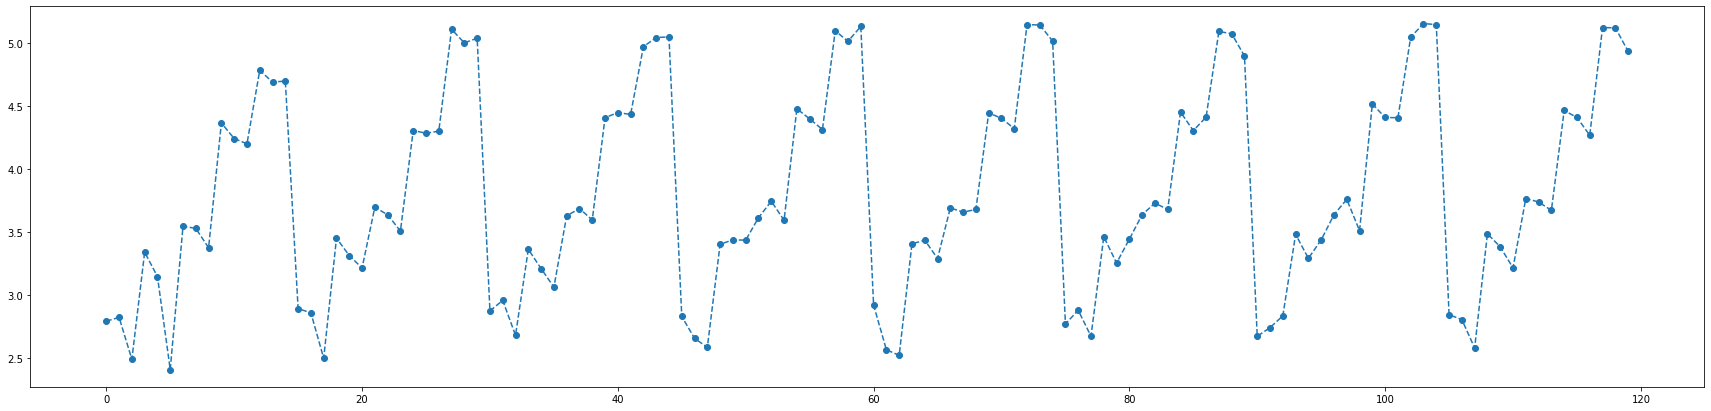

In [0]:
#plot all losses
plt.rc('figure', figsize=(30,7))
plt.plot(losses, linestyle='--', marker='o')